In [1]:
import pandas as pd
import numpy as np
import scipy
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
import xgboost as xgb

from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import roc_auc_score
import catboost
import matplotlib.pyplot as plt
import plotly
import seaborn as sns
from sklearn.linear_model import LinearRegression as lm

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
shops=pd.read_excel('shops.xlsx',index_col=0)

In [22]:
test_df=pd.read_csv('test.csv',index_col=0)

In [23]:
test_df

,shop_id,item_id
ID,,
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268
...,...,...
214195,45,18454
214196,45,16188
214197,45,15757


In [20]:
train_df=pd.read_csv('sales_train.csv')

In [13]:
items=pd.read_csv('items.csv')

In [22]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [4]:
item_categories=pd.read_csv('item_categories.csv')

<AxesSubplot:xlabel='date_block_num'>

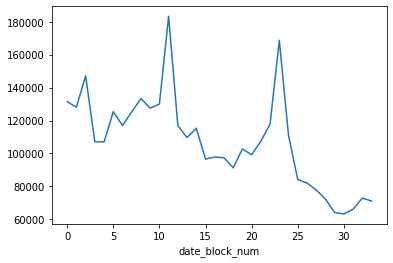

In [12]:
train_df['year']=train_df.index.year
train_df.groupby('date_block_num').item_cnt_day.sum().plot()

In [11]:
train_df.index=pd.DatetimeIndex(train_df.date,dayfirst=True)

In [13]:
train_df['ny']=train_df.index.month==12

In [14]:
train_df.ny=train_df.ny.map({False:0,True:1})

In [16]:
train_df.drop(['date'],axis=1,inplace=True)

KeyError: "['date'] not found in axis"

In [17]:
train_df_xgb=train_df.drop(['ny','year'],axis=1)

In [18]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [19]:
from sklearn.linear_model import RidgeCV, LinearRegression as lm

In [20]:
xgb1=xgb.XGBRegressor()

In [17]:
train_df_xgb=pd.DataFrame(train_df_xgb.groupby(['date_block_num','shop_id','item_id']).agg({'item_price':'mean',
                                                                                           'item_cnt_day':'sum'})).reset_index()

In [21]:
y=train_df_xgb.item_cnt_day

In [22]:
train_df_xgb.drop('item_cnt_day',axis=1,inplace=True)

In [23]:
scale=StandardScaler()

In [24]:
train_df_xgb.item_price=scale.fit_transform(np.array(train_df_xgb.item_price).reshape(-1,1))

In [25]:
train_df_xgb

,date_block_num,shop_id,item_id,item_price
date,,,,
2013-01-02,0,59,22154,0.062520
2013-01-03,0,25,2552,0.004710
2013-01-05,0,25,2552,0.004710
2013-01-06,0,25,2554,0.473001
2013-01-15,0,25,2555,0.120330
...,...,...,...,...
2015-10-10,33,25,7409,-0.342151
2015-10-09,33,25,7460,-0.342151
2015-10-14,33,25,7459,-0.313246


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [44]:
X_test,X_valid,y_test,y_valid=train_test_split(train_df_xgb,y)

In [ ]:
X_test,X_valid,y_test,y_valid=train_test_split(train_df_xgb,y)
fit=RidgeCV(scoring='neg_root_mean_squared_error')
fit.fit(X_test,y_test)
print(mean_squared_error(fit.predict(X_valid),y_valid,squared=False))

In [45]:
enc=OneHotEncoder()

In [29]:
a=enc.fit_transform(train_df_xgb[['shop_id','item_id']])

In [14]:
from scipy.sparse import hstack

In [31]:
train_df_xgb=hstack([train_df_xgb.drop(['shop_id','item_id'],axis=1),a])

In [32]:
train_df_xgb['shop_item']=train_df_xgb.shop_id*train_df_xgb.item_id

AttributeError: shop_id not found

In [33]:
train_df_xgb.drop('shop_item',axis=1,inplace=True)

AttributeError: drop not found

In [39]:
X_test

,date_block_num,shop_id,item_id,item_price
93774,1,28,12791,-0.381466
53593,0,51,3702,-0.198430
1017214,18,56,21716,-0.461706
1524084,31,22,10177,-0.252567
655029,11,31,5361,-0.381681
...,...,...,...,...
1001179,18,38,15120,-0.394356
509181,8,53,3897,-0.252567
1508632,30,51,10207,0.076152
1338950,25,55,7783,0.005230


In [60]:
xgb1=xgb.XGBRegressor(n_estimators=300,n_jobs=-1)
xgb1.fit(X_test,y_test)
print(mean_squared_error(xgb1.predict(X_valid),y_valid,squared=False))

6.307010679332373


In [64]:
fit1=lm()

In [65]:
fit1.fit(X_test,y_test)
print(mean_squared_error(fit1.predict(X_valid),y_valid,squared=False))

9.311448619432012


In [56]:
fit1.predict(X_valid)

array([2.37751078, 2.17581047, 2.3312994 , ..., 2.13635371, 2.58490857,
       2.25674562])

In [27]:
y_valid

NameError: name 'y_valid' is not defined

In [28]:
train_df_xgb['cat']=np.array(items.iloc[train_df_xgb.item_id,2])

In [29]:
X_test

NameError: name 'X_test' is not defined

In [69]:
rf=RandomForestRegressor(n_jobs=-1)

In [72]:
rf.fit(X_test,y_test)

RandomForestRegressor(n_jobs=-1)

In [73]:
mean_squared_error(rf.predict(X_valid),y_valid,squared=False)

5.140237569601646

In [77]:
train_df_xgb.cat.nunique()

84

In [78]:
22102+59+84

22245

In [33]:
X=pd.DataFrame(train_df.groupby(['date_block_num','shop_id','item_id']).agg({'item_price':'mean','item_cnt_day':'sum'
                                                                        })).reset_index()

In [34]:
X

,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,0,0,32,221.0,6.0
1,0,0,33,347.0,3.0
2,0,0,35,247.0,1.0
3,0,0,43,221.0,1.0
4,0,0,51,128.5,2.0
...,...,...,...,...,...
1609119,33,59,22087,119.0,6.0
1609120,33,59,22088,119.0,2.0
1609121,33,59,22091,179.0,1.0
1609122,33,59,22100,629.0,1.0


In [32]:
ridge=RidgeCV(scoring="neg_root_mean_squared_error")

In [51]:
fit=lm()

In [36]:
y=X.item_cnt_day

In [34]:
enc=OneHotEncoder()

In [54]:
a=enc.fit_transform(X[['shop_id','item_id']])
from scipy.sparse import hstack

In [112]:
from scipy.sparse import hstack
X=hstack([X,a])

In [27]:
from sklearn.preprocessing import StandardScaler

In [307]:
X

,date_block_num,shop_id,item_id,item_price,ny
0,0,0,32,221.0,0.0
1,0,0,33,347.0,0.0
2,0,0,35,247.0,0.0
3,0,0,43,221.0,0.0
4,0,0,51,128.5,0.0
...,...,...,...,...,...
1609119,33,59,22087,119.0,0.0
1609120,33,59,22088,119.0,0.0
1609121,33,59,22091,179.0,0.0
1609122,33,59,22100,629.0,0.0


In [ ]:
ridge.fit(X,y)

In [34]:
train_df_xgb

<1609124x21869 sparse matrix of type '<class 'numpy.float64'>'
	with 6373272 stored elements in COOrdinate format>

In [57]:
fit.fit(X,y)

LinearRegression()

In [63]:
fit.score(X,y)


0.0009731211479671042

In [64]:
mean_squared_error(fit.predict(X),y,squared=False)

8.645669395753979

In [ ]:
xgb1=xgb.Xg

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
rf=RandomForestRegressor(n_estimators=100,n_jobs=-1)

In [26]:
X.item_price=scale.fit_transform(np.array(X.item_price).reshape(-1,1))

NameError: name 'scale' is not defined

In [29]:
y

0          6.0
1          3.0
2          1.0
3          1.0
4          2.0
          ... 
1609119    6.0
1609120    2.0
1609121    1.0
1609122    1.0
1609123    1.0
Name: item_cnt_day, Length: 1609124, dtype: float64

In [313]:
mean_squared_error(rf.fit(X,y).predict(X),y,squared=False)

1.8809758842637698

In [312]:
cross_val_score(rf,X,y,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=5)

array([ -5.26906226,  -5.76970077,  -4.95072191,  -6.66718766,
       -10.49275933])

In [316]:
np.array([ -5.26906226,  -5.76970077,  -4.95072191,  -6.66718766,
       -10.49275933]).mean()

-6.629886386

In [320]:
X

,date_block_num,shop_id,item_id,item_price
0,0,0,32,221.0
1,0,0,33,347.0
2,0,0,35,247.0
3,0,0,43,221.0
4,0,0,51,128.5
...,...,...,...,...
1609119,33,59,22087,119.0
1609120,33,59,22088,119.0
1609121,33,59,22091,179.0
1609122,33,59,22100,629.0


In [37]:
X

,date_block_num,shop_id,item_id,item_price,ny
0,0,0,32,221.0,0.0
1,0,0,33,347.0,0.0
2,0,0,35,247.0,0.0
3,0,0,43,221.0,0.0
4,0,0,51,128.5,0.0
...,...,...,...,...,...
1609119,33,59,22087,119.0,0.0
1609120,33,59,22088,119.0,0.0
1609121,33,59,22091,179.0,0.0
1609122,33,59,22100,629.0,0.0


In [362]:
X.drop(['ny','year'],axis=1,inplace=True)

In [363]:
X

,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,0,0,32,221.0,6.0
1,0,0,33,347.0,3.0
2,0,0,35,247.0,1.0
3,0,0,43,221.0,1.0
4,0,0,51,128.5,2.0
...,...,...,...,...,...
1609119,33,59,22087,119.0,6.0
1609120,33,59,22088,119.0,2.0
1609121,33,59,22091,179.0,1.0
1609122,33,59,22100,629.0,1.0


In [12]:
y=X.item_cnt_day

In [43]:
X.drop('item_cnt_day',axis=1,inplace=True)

In [44]:
X['cat']=np.array(items.iloc[X.item_id,2])

In [45]:
rf=RandomForestRegressor(n_jobs=-1)

In [376]:
params={'n_estimators':[100,200,300],'max_depth':[3,5,7,9,10],'min_samples_split':[2,3,5,7],'min_samples_leaf':[2,3,5,7]}

In [387]:
search=RandomizedSearchCV(rf,params,cv=3,n_jobs=-1,scoring='neg_root_mean_squared_error')

In [46]:
scale=MinMaxScaler()

In [47]:
X.item_price=scale.fit_transform(np.array(X.item_price).reshape(-1,1))

In [48]:
X

,date_block_num,shop_id,item_id,item_price,ny,year,cat
3921,0,2,33,0.011596,0.0,2013.0,37
3926,0,2,482,0.076751,0.0,2013.0,73
3928,0,2,491,0.013945,0.0,2013.0,73
3939,0,2,839,0.076751,0.0,2013.0,73
3947,0,2,1007,0.010433,0.0,2013.0,67
...,...,...,...,...,...,...,...
1609119,33,59,22087,0.002756,0.0,2015.0,83
1609120,33,59,22088,0.002756,0.0,2015.0,83
1609121,33,59,22091,0.004152,0.0,2015.0,83
1609122,33,59,22100,0.014620,0.0,2015.0,42


In [35]:
X = X[X.item_id.isin (test_df.item_id)]
X = X[X.shop_id.isin (test_df.shop_id)]

In [382]:
test_df

,date_block_num,shop_id,item_id
ID,,,
0,34,5,5037
1,34,5,5320
2,34,5,5233
3,34,5,5232
4,34,5,5268
...,...,...,...
214195,34,45,18454
214196,34,45,16188
214197,34,45,15757


In [383]:
X

,date_block_num,shop_id,item_id,item_price,cat
3921,0,2,33,0.011596,37
3926,0,2,482,0.076751,73
3928,0,2,491,0.013945,73
3939,0,2,839,0.076751,73
3947,0,2,1007,0.010433,67
...,...,...,...,...,...
1609119,33,59,22087,0.002756,83
1609120,33,59,22088,0.002756,83
1609121,33,59,22091,0.004152,83
1609122,33,59,22100,0.014620,42


In [384]:
test_df

,date_block_num,shop_id,item_id
ID,,,
0,34,5,5037
1,34,5,5320
2,34,5,5233
3,34,5,5232
4,34,5,5268
...,...,...,...
214195,34,45,18454
214196,34,45,16188
214197,34,45,15757


In [388]:
search.fit(X,y)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 7, 9, 10],
                                        'min_samples_leaf': [2, 3, 5, 7],
                                        'min_samples_split': [2, 3, 5, 7],
                                        'n_estimators': [100, 200, 300]},
                   scoring='neg_root_mean_squared_error')

In [389]:
search.best_score_

-8.037159394263547

In [372]:
y

3921       1.0
3926       1.0
3928       1.0
3939       1.0
3947       3.0
          ... 
1609119    6.0
1609120    2.0
1609121    1.0
1609122    1.0
1609123    1.0
Name: item_cnt_day, Length: 600159, dtype: float64

In [390]:
search.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 7,
 'max_depth': 7}

In [50]:
test_df['cat']=np.array(items.iloc[test_df.item_id,2])

In [51]:
pr=pd.DataFrame(X.groupby(['date_block_num','shop_id','item_id','cat']).item_price.mean())

In [52]:
pr

item_price
date_block_num shop_id item_id cat            
0              2       33      37     0.011596
                       482     73     0.076751
                       491     73     0.013945
                       839     73     0.076751
                       1007    67     0.010433
...                                        ...
33             59      22087   83     0.002756
                       22088   83     0.002756
                       22091   83     0.004152
                       22100   42     0.014620
                       22102   42     0.029065

[600159 rows x 1 columns]

In [53]:
X_price=X.drop('item_price',axis=1)

In [59]:
X_price

,date_block_num,shop_id,item_id,ny,year,cat
3921,0,2,33,0.0,2013.0,37
3926,0,2,482,0.0,2013.0,73
3928,0,2,491,0.0,2013.0,73
3939,0,2,839,0.0,2013.0,73
3947,0,2,1007,0.0,2013.0,67
...,...,...,...,...,...,...
1609119,33,59,22087,0.0,2015.0,83
1609120,33,59,22088,0.0,2015.0,83
1609121,33,59,22091,0.0,2015.0,83
1609122,33,59,22100,0.0,2015.0,42


In [60]:
test_df

,shop_id,item_id,cat
ID,,,
0,5,5037,19
1,5,5320,55
2,5,5233,19
3,5,5232,23
4,5,5268,20
...,...,...,...
214195,45,18454,55
214196,45,16188,64
214197,45,15757,55


In [54]:
y_price=X.item_price

In [79]:
rf=RandomForestRegressor(n_estimators=150,n_jobs=-1,max_depth=15)

In [80]:
rf.fit(X_price,y_price)

RandomForestRegressor(max_depth=15, n_estimators=150, n_jobs=-1)

In [410]:
mean_squared_error(rf.predict(X_price),y_price,squared=False)

0.013028476877721204

In [416]:
cross_val_score(rf,X_price,y_price,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=5)

array([-0.00611006, -0.00680261, -0.00746929, -0.00906003, -0.0175419 ])

In [75]:
X_price

,date_block_num,shop_id,item_id,ny,cat
3921,0,2,33,0.0,37
3926,0,2,482,0.0,73
3928,0,2,491,0.0,73
3939,0,2,839,0.0,73
3947,0,2,1007,0.0,67
...,...,...,...,...,...
1609119,33,59,22087,0.0,83
1609120,33,59,22088,0.0,83
1609121,33,59,22091,0.0,83
1609122,33,59,22100,0.0,42


In [77]:
test_df=test_df[['date_block_num','shop_id','item_id','ny','cat']]

In [81]:
test_df['item_price']=rf.predict(test_df)

/var/folders/29/jvqd_3gx6plght08zb80m08w0000gn/T/ipykernel_9065/3346045781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['item_price']=rf.predict(test_df)


In [82]:
test_df

,date_block_num,shop_id,item_id,ny,cat,item_price
ID,,,,,,
0,34,5,5037,0,19,0.036971
1,34,5,5320,0,55,0.007769
2,34,5,5233,0,19,0.031864
3,34,5,5232,0,23,0.025269
4,34,5,5268,0,20,0.055660
...,...,...,...,...,...,...
214195,34,45,18454,0,55,0.005012
214196,34,45,16188,0,64,0.031200
214197,34,45,15757,0,55,0.007245


In [95]:
test_df=test_df[['date_block_num','shop_id','item_id','item_price','ny','cat']]

In [96]:
X

,date_block_num,shop_id,item_id,item_price,ny,cat
3921,0,2,33,0.011596,0.0,37
3926,0,2,482,0.076751,0.0,73
3928,0,2,491,0.013945,0.0,73
3939,0,2,839,0.076751,0.0,73
3947,0,2,1007,0.010433,0.0,67
...,...,...,...,...,...,...
1609119,33,59,22087,0.002756,0.0,83
1609120,33,59,22088,0.002756,0.0,83
1609121,33,59,22091,0.004152,0.0,83
1609122,33,59,22100,0.014620,0.0,42


In [98]:
test_df

,date_block_num,shop_id,item_id,item_price,ny,cat
ID,,,,,,
0,34,5,5037,0.036971,0,19
1,34,5,5320,0.007769,0,55
2,34,5,5233,0.031864,0,19
3,34,5,5232,0.025269,0,23
4,34,5,5268,0.055660,0,20
...,...,...,...,...,...,...
214195,34,45,18454,0.005012,0,55
214196,34,45,16188,0.031200,0,64
214197,34,45,15757,0.007245,0,55


In [101]:
xgb1=xgb.XGBRegressor(n_jobs=-1,n_estimators=400,max_depth=3)

In [102]:
xgb1.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=400, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [129]:
pred=rf.predict(test_df)

In [147]:
pred[pred>20]=20

In [106]:
X.to_csv('x_sales_predict.csv',index=False)

In [107]:
test_df.to_csv('test_sales_predict.csv')

In [148]:
pd.DataFrame({'ID':test_df.index,'item_cnt_month':pred}).to_csv('answ.csv',index=False)

In [127]:
rf=RandomForestRegressor(n_jobs=-1,n_estimators=100,max_depth=15)

In [128]:
rf.fit(X,y)

RandomForestRegressor(max_depth=15, n_jobs=-1)

In [113]:
X

,date_block_num,shop_id,item_id,item_price,ny,cat
3921,0,2,33,0.011596,0.0,37
3926,0,2,482,0.076751,0.0,73
3928,0,2,491,0.013945,0.0,73
3939,0,2,839,0.076751,0.0,73
3947,0,2,1007,0.010433,0.0,67
...,...,...,...,...,...,...
1609119,33,59,22087,0.002756,0.0,83
1609120,33,59,22088,0.002756,0.0,83
1609121,33,59,22091,0.004152,0.0,83
1609122,33,59,22100,0.014620,0.0,42


In [114]:
test_df

,date_block_num,shop_id,item_id,item_price,ny,cat
ID,,,,,,
0,34,5,5037,0.036971,0,19
1,34,5,5320,0.007769,0,55
2,34,5,5233,0.031864,0,19
3,34,5,5232,0.025269,0,23
4,34,5,5268,0.055660,0,20
...,...,...,...,...,...,...
214195,34,45,18454,0.005012,0,55
214196,34,45,16188,0.031200,0,64
214197,34,45,15757,0.007245,0,55


In [115]:
rf.feature_importances_

array([0.1128329 , 0.33634422, 0.0497926 , 0.44136914, 0.03103447,
       0.02862667])

In [126]:
pred

array([1.73741764, 1.29587403, 1.73741764, ..., 1.30753934, 1.30184307,
       1.35532823])

In [131]:
X.item_price.max()

1.0000000000000002

In [132]:
X

,date_block_num,shop_id,item_id,item_price,ny,cat
3921,0,2,33,0.011596,0.0,37
3926,0,2,482,0.076751,0.0,73
3928,0,2,491,0.013945,0.0,73
3939,0,2,839,0.076751,0.0,73
3947,0,2,1007,0.010433,0.0,67
...,...,...,...,...,...,...
1609119,33,59,22087,0.002756,0.0,83
1609120,33,59,22088,0.002756,0.0,83
1609121,33,59,22091,0.004152,0.0,83
1609122,33,59,22100,0.014620,0.0,42


In [133]:
test_df

,date_block_num,shop_id,item_id,item_price,ny,cat
ID,,,,,,
0,34,5,5037,0.036971,0,19
1,34,5,5320,0.007769,0,55
2,34,5,5233,0.031864,0,19
3,34,5,5232,0.025269,0,23
4,34,5,5268,0.055660,0,20
...,...,...,...,...,...,...
214195,34,45,18454,0.005012,0,55
214196,34,45,16188,0.031200,0,64
214197,34,45,15757,0.007245,0,55


In [142]:
xgb1=xgb.XGBRegressor(n_estimators=1200,n_jobs=-1)

In [149]:
X

,date_block_num,shop_id,item_id,item_price,ny,cat
3921,0,2,33,0.011596,0.0,37
3926,0,2,482,0.076751,0.0,73
3928,0,2,491,0.013945,0.0,73
3939,0,2,839,0.076751,0.0,73
3947,0,2,1007,0.010433,0.0,67
...,...,...,...,...,...,...
1609119,33,59,22087,0.002756,0.0,83
1609120,33,59,22088,0.002756,0.0,83
1609121,33,59,22091,0.004152,0.0,83
1609122,33,59,22100,0.014620,0.0,42


In [152]:
X

,date_block_num,shop_id,item_id,item_price,ny,cat
3921,0,2,33,0.011596,0.0,37
3926,0,2,482,0.076751,0.0,73
3928,0,2,491,0.013945,0.0,73
3939,0,2,839,0.076751,0.0,73
3947,0,2,1007,0.010433,0.0,67
...,...,...,...,...,...,...
1609119,33,59,22087,0.002756,0.0,83
1609120,33,59,22088,0.002756,0.0,83
1609121,33,59,22091,0.004152,0.0,83
1609122,33,59,22100,0.014620,0.0,42


In [154]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [155]:
shops

,shop_id
shop_name,
"!Якутск Орджоникидзе, 56 фран",0
"!Якутск ТЦ ""Центральный"" фран",1
"Адыгея ТЦ ""Мега""",2
"Балашиха ТРК ""Октябрь-Киномир""",3
"Волжский ТЦ ""Волга Молл""",4
"Вологда ТРЦ ""Мармелад""",5
"Воронеж (Плехановская, 13)",6
"Воронеж ТРЦ ""Максимир""",7
"Воронеж ТРЦ Сити-Парк ""Град""",8


In [26]:
def ret(x):
    return x.split()[0]

In [25]:
main_cat=item_categories.item_category_name.map(ret)

In [173]:
a

array(['PC', 'Аксессуары', 'Билеты (Цифра)', 'Доставка товара',
       'Игровые консоли', 'Игры', 'Игры Android', 'Игры MAC', 'Игры PC',
       'Карты оплаты (Кино, Музыка, Игры)', 'Карты оплаты', 'Кино',
       'Книги', 'Музыка', 'Подарки', 'Программы', 'Служебные',
       'Чистые носители (шпиль)', 'Чистые носители (штучные)',
       'Элементы питания'], dtype=object)

In [40]:
city=shops.index.map(ret)

In [28]:
city=city[1:]

In [181]:
shops

,shop_id
shop_name,
"!Якутск Орджоникидзе, 56 фран",0
"!Якутск ТЦ ""Центральный"" фран",1
"Адыгея ТЦ ""Мега""",2
"Балашиха ТРК ""Октябрь-Киномир""",3
"Волжский ТЦ ""Волга Молл""",4
"Вологда ТРЦ ""Мармелад""",5
"Воронеж (Плехановская, 13)",6
"Воронеж ТРЦ ""Максимир""",7
"Воронеж ТРЦ Сити-Парк ""Град""",8


In [29]:
city

Index(['!Якутск', 'Адыгея', 'Балашиха', 'Волжский', 'Вологда', 'Воронеж',
       'Воронеж', 'Воронеж', 'Выездная', 'Жуковский', 'Жуковский',
       'Интернет-магазин', 'Казань', 'Казань', 'Калуга', 'Коломна',
       'Красноярск', 'Красноярск', 'Курск', 'Москва', 'Москва', 'Москва',
       'Москва', 'Москва', 'Москва', 'Москва', 'Москва', 'Москва', 'Москва',
       'Москва', 'Москва', 'Москва', 'Мытищи', 'Н.Новгород', 'Н.Новгород',
       'Новосибирск', 'Новосибирск', 'Омск', 'РостовНаДону', 'РостовНаДону',
       'РостовНаДону', 'СПб', 'СПб', 'Самара', 'Самара', 'Сергиев', 'Сургут',
       'Томск', 'Тюмень', 'Тюмень', 'Тюмень', 'Уфа', 'Уфа', 'Химки',
       'Цифровой', 'Чехов', 'Якутск', 'Якутск', 'Ярославль'],
      dtype='object', name='shop_name')

In [30]:
main_cat

0                            PC
1                    Аксессуары
2                    Аксессуары
3                    Аксессуары
4                    Аксессуары
                ...            
79                    Служебные
80                    Служебные
81      Чистые носители (шпиль)
82    Чистые носители (штучные)
83             Элементы питания
Name: item_category_name, Length: 84, dtype: object

In [49]:
item_categories['main']=main_cat

In [200]:
from sklearn.preprocessing import LabelEncoder

In [283]:
enc=LabelEncoder()

In [284]:
test_df['main']=np.array(item_categories.iloc[test_df.cat,2])

In [198]:
X['main']=np.array(item_categories.iloc[X.cat,2])

In [285]:
X['main']=enc.fit_transform(X['main'])
test_df['main']=enc.fit_transform(test_df['main'])

In [203]:
X

,date_block_num,shop_id,item_id,item_price,ny,cat,main
3921,0,2,33,0.011596,0.0,37,7
3926,0,2,482,0.076751,0.0,73,11
3928,0,2,491,0.013945,0.0,73,11
3939,0,2,839,0.076751,0.0,73,11
3947,0,2,1007,0.010433,0.0,67,10
...,...,...,...,...,...,...,...
1609119,33,59,22087,0.002756,0.0,83,13
1609120,33,59,22088,0.002756,0.0,83,13
1609121,33,59,22091,0.004152,0.0,83,13
1609122,33,59,22100,0.014620,0.0,42,8


In [43]:
city=np.array(city)

In [44]:
len(city)

60

In [39]:
shops

,shop_id
shop_name,
"!Якутск Орджоникидзе, 56 фран",0
"!Якутск ТЦ ""Центральный"" фран",1
"Адыгея ТЦ ""Мега""",2
"Балашиха ТРК ""Октябрь-Киномир""",3
"Волжский ТЦ ""Волга Молл""",4
"Вологда ТРЦ ""Мармелад""",5
"Воронеж (Плехановская, 13)",6
"Воронеж ТРЦ ""Максимир""",7
"Воронеж ТРЦ Сити-Парк ""Град""",8


In [45]:
for i in range(len(np.array(city))):
    if city[i]=='!Якутск':
        city[i]='Якутск'

In [46]:
shops['city']=city

In [223]:
shops.iloc[test_df.shop_id,1]

shop_name
Вологда ТРЦ "Мармелад"    Вологда
Вологда ТРЦ "Мармелад"    Вологда
Вологда ТРЦ "Мармелад"    Вологда
Вологда ТРЦ "Мармелад"    Вологда
Вологда ТРЦ "Мармелад"    Вологда
                           ...   
Самара ТЦ "ПаркХаус"       Самара
Самара ТЦ "ПаркХаус"       Самара
Самара ТЦ "ПаркХаус"       Самара
Самара ТЦ "ПаркХаус"       Самара
Самара ТЦ "ПаркХаус"       Самара
Name: city, Length: 214200, dtype: object

In [280]:
test_df['city']=np.array(shops.iloc[test_df.shop_id,1])

In [225]:
X['city']=np.array(shops.iloc[X.shop_id,1])

In [286]:
X.city=enc.fit_transform(X.city)
test_df.city=enc.fit_transform(test_df.city)

In [239]:
test_df

,ID,date_block_num,shop_id,item_id,item_price,ny,cat,main,city
0,0,34,5,5037,0.036971,0,19,Игры,3
1,1,34,5,5320,0.007769,0,55,Музыка,3
2,2,34,5,5233,0.031864,0,19,Игры,3
3,3,34,5,5232,0.025269,0,23,Игры,3
4,4,34,5,5268,0.055660,0,20,Игры,3
...,...,...,...,...,...,...,...,...,...
214195,214195,34,45,18454,0.005012,0,55,Музыка,18
214196,214196,34,45,16188,0.031200,0,64,Подарки,18
214197,214197,34,45,15757,0.007245,0,55,Музыка,18
214198,214198,34,45,19648,0.005708,0,40,Кино,18


In [232]:
X

,date_block_num,shop_id,item_id,item_price,ny,cat,main,city
3921,0,2,33,0.011596,0.0,37,7,0
3926,0,2,482,0.076751,0.0,73,11,0
3928,0,2,491,0.013945,0.0,73,11,0
3939,0,2,839,0.076751,0.0,73,11,0
3947,0,2,1007,0.010433,0.0,67,10,0
...,...,...,...,...,...,...,...,...
1609119,33,59,22087,0.002756,0.0,83,13,27
1609120,33,59,22088,0.002756,0.0,83,13,27
1609121,33,59,22091,0.004152,0.0,83,13,27
1609122,33,59,22100,0.014620,0.0,42,8,27


In [279]:
test_df=pd.read_csv('test_sales_predict.csv')

In [245]:
test_df.index=test_df.ID
test_df.drop('ID',axis=1,inplace=True)

In [248]:
test_df.ny=test_df.ny.astype('float')

In [249]:
test_df

,date_block_num,shop_id,item_id,item_price,ny,cat,main,city
ID,,,,,,,,
0,34,5,5037,0.036971,0.0,19,4,3
1,34,5,5320,0.007769,0.0,55,11,3
2,34,5,5233,0.031864,0.0,19,4,3
3,34,5,5232,0.025269,0.0,23,4,3
4,34,5,5268,0.055660,0.0,20,4,3
...,...,...,...,...,...,...,...,...
214195,34,45,18454,0.005012,0.0,55,11,18
214196,34,45,16188,0.031200,0.0,64,12,18
214197,34,45,15757,0.007245,0.0,55,11,18


In [247]:
X

,date_block_num,shop_id,item_id,item_price,ny,cat,main,city
3921,0,2,33,0.011596,0.0,37,7,0
3926,0,2,482,0.076751,0.0,73,11,0
3928,0,2,491,0.013945,0.0,73,11,0
3939,0,2,839,0.076751,0.0,73,11,0
3947,0,2,1007,0.010433,0.0,67,10,0
...,...,...,...,...,...,...,...,...
1609119,33,59,22087,0.002756,0.0,83,13,27
1609120,33,59,22088,0.002756,0.0,83,13,27
1609121,33,59,22091,0.004152,0.0,83,13,27
1609122,33,59,22100,0.014620,0.0,42,8,27


In [252]:
rf=RandomForestRegressor(n_jobs=-1)

In [251]:
params={'n_estimators':[100,200,300]}

In [253]:
search=GridSearchCV(rf,params,n_jobs=-1,cv=3,scoring='neg_root_mean_squared_error')

In [254]:
search.fit(X,y)

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': [7, 10, 15],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_root_mean_squared_error')

In [257]:
pred=search.predict(test_df)

In [316]:
pred[pred>20]=20

In [317]:
pd.DataFrame({'ID':test_df.index,"item_cnt_month":pred}).to_csv('answ.csv',index=False)

In [262]:
rf=search.best_estimator_

In [263]:
rf.feature_importances_

array([0.14073171, 0.24006548, 0.06525611, 0.41502732, 0.02572192,
       0.01966463, 0.00706481, 0.08646803])

In [265]:
pred

array([1.95776633, 1.45369744, 3.07552199, ..., 1.48912107, 1.17999834,
       1.2024742 ])

In [266]:
rf

RandomForestRegressor(max_depth=15, n_jobs=-1)

In [267]:
X

,date_block_num,shop_id,item_id,item_price,ny,cat,main,city
3921,0,2,33,0.011596,0.0,37,7,0
3926,0,2,482,0.076751,0.0,73,11,0
3928,0,2,491,0.013945,0.0,73,11,0
3939,0,2,839,0.076751,0.0,73,11,0
3947,0,2,1007,0.010433,0.0,67,10,0
...,...,...,...,...,...,...,...,...
1609119,33,59,22087,0.002756,0.0,83,13,27
1609120,33,59,22088,0.002756,0.0,83,13,27
1609121,33,59,22091,0.004152,0.0,83,13,27
1609122,33,59,22100,0.014620,0.0,42,8,27


In [270]:
from sklearn.preprocessing import OneHotEncoder

In [289]:
enc=OneHotEncoder()

In [318]:
X_train=enc.fit_transform(X[['shop_id','item_id','cat']])

In [319]:
from scipy.sparse import hstack, csr_matrix

In [276]:
X_train=hstack([X_train,X[['date_block_num','item_price','ny']]])

In [277]:
X_train

<600159x4863 sparse matrix of type '<class 'numpy.float64'>'
	with 4241061 stored elements in COOrdinate format>

In [290]:
X_test=enc.fit_transform(test_df[['shop_id','item_id','cat','main','city']])

In [291]:
X_test=hstack([X_test,test_df[['date_block_num','item_price','ny']]])

In [320]:
full=pd.concat([X,test_df])

In [321]:
full.drop('ID',axis=1,inplace=True)

In [322]:
full_sp=enc.fit_transform(full[['shop_id','item_id','cat']])

In [323]:
full_sp=hstack([full_sp,full[['date_block_num','item_price','ny']]])

In [324]:
xgb1=xgb.XGBRegressor(n_jobs=-1)

In [358]:
params={'max_depth':[9,15],'n_estimators':[100,200,300]}

In [359]:
search=GridSearchCV(RandomForestRegressor(n_jobs=-1),params,cv=3,n_jobs=-1,scoring="neg_root_mean_squared_error")

In [ ]:
full_sp=csr_matrix(full_sp)

In [360]:
search.fit(X,y)

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': [9, 15], 'n_estimators': [100, 200, 300]},
             scoring='neg_root_mean_squared_error')

In [361]:
search.best_score_

-7.801534352045235

In [314]:
search.best_params_

{'max_depth': 5, 'n_estimators': 200}

In [362]:
pred=search.predict(X)

In [363]:
pred[pred>20]=20

In [364]:
pred

array([1.95235465, 3.09421537, 2.89698952, ..., 2.34742765, 1.74566613,
       2.59780938])

In [365]:
mean_squared_error(pred,y,squared=False)

10.593546369209534

In [345]:
search.best_estimator_.feature_importances_

array([0.00052492, 0.0022927 , 0.00038255, ..., 0.01223636, 0.00559189,
       0.01924177], dtype=float32)

In [368]:
from lightgbm import LGBMRegressor

In [397]:
fit1=LGBMRegressor(n_jobs=-1)

In [390]:
fit1.fit(X,y)

RandomForestRegressor(n_jobs=-1)

In [398]:
cross_val_score(fit1,X,y,n_jobs=-1,cv=5,scoring='neg_root_mean_squared_error').mean()

-7.857125414854496

In [391]:
mean_squared_error(fit1.predict(X),y,squared=False)

2.120101348392467

In [381]:
fit1.feature_importances_/30

array([21.23333333, 29.56666667, 13.3       , 20.46666667,  2.3       ,
       13.13333333])

In [382]:
X

,date_block_num,shop_id,item_id,item_price,ny,cat,main,city
3921,0,2,33,0.011596,0.0,37,7,0
3926,0,2,482,0.076751,0.0,73,11,0
3928,0,2,491,0.013945,0.0,73,11,0
3939,0,2,839,0.076751,0.0,73,11,0
3947,0,2,1007,0.010433,0.0,67,10,0
...,...,...,...,...,...,...,...,...
1609119,33,59,22087,0.002756,0.0,83,13,27
1609120,33,59,22088,0.002756,0.0,83,13,27
1609121,33,59,22091,0.004152,0.0,83,13,27
1609122,33,59,22100,0.014620,0.0,42,8,27


In [400]:
X.to_csv('x_b.csv')
test_df.to_csv('test_b.csv')

In [33]:
from catboost import CatBoostRegressor
import tensorflow as tf

In [7]:
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

False

In [37]:
X=pd.read_csv('x_b.csv')

In [39]:
X.drop('Unnamed: 0',axis=1,inplace=True)

In [40]:
X['target']=np.array(y)

In [14]:
test_df=pd.read_csv('test_b.csv')


In [15]:
test_df.index=test_df.ID

In [16]:
test_df.drop(['Unnamed: 0','ID'],axis=1,inplace=True)

In [17]:
test_df

,date_block_num,shop_id,item_id,item_price,ny,cat,city,main
ID,,,,,,,,
0,34,5,5037,0.036971,0,19,3,4
1,34,5,5320,0.007769,0,55,3,11
2,34,5,5233,0.031864,0,19,3,4
3,34,5,5232,0.025269,0,23,3,4
4,34,5,5268,0.055660,0,20,3,4
...,...,...,...,...,...,...,...,...
214195,34,45,18454,0.005012,0,55,18,11
214196,34,45,16188,0.031200,0,64,18,12
214197,34,45,15757,0.007245,0,55,18,11


In [18]:
X.drop('Unnamed: 0',axis=1,inplace=True)

In [19]:
X

,date_block_num,shop_id,item_id,item_price,ny,cat,main,city
0,0,2,33,0.011596,0.0,37,7,0
1,0,2,482,0.076751,0.0,73,11,0
2,0,2,491,0.013945,0.0,73,11,0
3,0,2,839,0.076751,0.0,73,11,0
4,0,2,1007,0.010433,0.0,67,10,0
...,...,...,...,...,...,...,...,...
600154,33,59,22087,0.002756,0.0,83,13,27
600155,33,59,22088,0.002756,0.0,83,13,27
600156,33,59,22091,0.004152,0.0,83,13,27
600157,33,59,22100,0.014620,0.0,42,8,27


In [21]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [22]:
item_categories

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [23]:
shops

,shop_id
shop_name,
"!Якутск Орджоникидзе, 56 фран",0
"!Якутск ТЦ ""Центральный"" фран",1
"Адыгея ТЦ ""Мега""",2
"Балашиха ТРК ""Октябрь-Киномир""",3
"Волжский ТЦ ""Волга Молл""",4
"Вологда ТРЦ ""Мармелад""",5
"Воронеж (Плехановская, 13)",6
"Воронеж ТРЦ ""Максимир""",7
"Воронеж ТРЦ Сити-Парк ""Град""",8


In [47]:
shops

,shop_id,city
shop_name,,
"!Якутск Орджоникидзе, 56 фран",0,Якутск
"!Якутск ТЦ ""Центральный"" фран",1,Якутск
"Адыгея ТЦ ""Мега""",2,Адыгея
"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха
"Волжский ТЦ ""Волга Молл""",4,Волжский
"Вологда ТРЦ ""Мармелад""",5,Вологда
"Воронеж (Плехановская, 13)",6,Воронеж
"Воронеж ТРЦ ""Максимир""",7,Воронеж
"Воронеж ТРЦ Сити-Парк ""Град""",8,Воронеж


In [50]:
item_categories

,item_category_name,item_category_id,main
0,PC - Гарнитуры/Наушники,0,PC
1,Аксессуары - PS2,1,Аксессуары
2,Аксессуары - PS3,2,Аксессуары
3,Аксессуары - PS4,3,Аксессуары
4,Аксессуары - PSP,4,Аксессуары
...,...,...,...
79,Служебные,79,Служебные
80,Служебные - Билеты,80,Служебные
81,Чистые носители (шпиль),81,Чистые носители (шпиль)
82,Чистые носители (штучные),82,Чистые носители (штучные)


In [21]:
X[['shop_id','item_id','cat','main','city']]=X[['shop_id','item_id','cat','main','city']].astype('object')

In [22]:
test_df[['shop_id','item_id','cat','main','city']]=test_df[['shop_id','item_id','cat','main','city']].astype('object')

In [75]:
np.array([-9.41706373, -6.33475313, -6.70031708, -7.08573876, -7.46431154]).mean()

-7.400436848

In [76]:
cat=CatBoostRegressor()

In [85]:
cat.fit(X.drop(['city','main'],axis=1),y)

Learning rate set to 0.12188
0:	learn: 10.7328083	total: 26.5ms	remaining: 26.4s
1:	learn: 10.2490695	total: 45.6ms	remaining: 22.7s
2:	learn: 9.8631231	total: 63.6ms	remaining: 21.1s
3:	learn: 9.5260845	total: 84ms	remaining: 20.9s
4:	learn: 9.2682910	total: 102ms	remaining: 20.3s
5:	learn: 9.0549382	total: 121ms	remaining: 20s
6:	learn: 8.8543090	total: 139ms	remaining: 19.7s
7:	learn: 8.7290906	total: 156ms	remaining: 19.3s
8:	learn: 8.6158290	total: 174ms	remaining: 19.1s
9:	learn: 8.5381781	total: 194ms	remaining: 19.2s
10:	learn: 8.4737304	total: 214ms	remaining: 19.3s
11:	learn: 8.3531167	total: 238ms	remaining: 19.6s
12:	learn: 8.2702041	total: 258ms	remaining: 19.6s
13:	learn: 8.1883343	total: 277ms	remaining: 19.5s
14:	learn: 8.1450940	total: 294ms	remaining: 19.3s
15:	learn: 8.1066077	total: 312ms	remaining: 19.2s
16:	learn: 8.0317634	total: 331ms	remaining: 19.2s
17:	learn: 7.9613040	total: 351ms	remaining: 19.1s
18:	learn: 7.9134034	total: 370ms	remaining: 19.1s
19:	learn:

161:	learn: 6.0881327	total: 3.4s	remaining: 17.6s
162:	learn: 6.0840443	total: 3.43s	remaining: 17.6s
163:	learn: 6.0804728	total: 3.45s	remaining: 17.6s
164:	learn: 6.0660003	total: 3.47s	remaining: 17.6s
165:	learn: 6.0629688	total: 3.49s	remaining: 17.5s
166:	learn: 6.0616985	total: 3.51s	remaining: 17.5s
167:	learn: 6.0503396	total: 3.53s	remaining: 17.5s
168:	learn: 6.0447410	total: 3.55s	remaining: 17.5s
169:	learn: 6.0435991	total: 3.57s	remaining: 17.4s
170:	learn: 6.0337035	total: 3.6s	remaining: 17.4s
171:	learn: 6.0291581	total: 3.62s	remaining: 17.4s
172:	learn: 6.0247698	total: 3.64s	remaining: 17.4s
173:	learn: 6.0211974	total: 3.66s	remaining: 17.4s
174:	learn: 6.0159492	total: 3.68s	remaining: 17.3s
175:	learn: 6.0127666	total: 3.7s	remaining: 17.3s
176:	learn: 6.0103409	total: 3.71s	remaining: 17.3s
177:	learn: 6.0037299	total: 3.73s	remaining: 17.2s
178:	learn: 5.9989870	total: 3.75s	remaining: 17.2s
179:	learn: 5.9974121	total: 3.77s	remaining: 17.2s
180:	learn: 5.9

324:	learn: 5.4440334	total: 6.86s	remaining: 14.2s
325:	learn: 5.4409006	total: 6.88s	remaining: 14.2s
326:	learn: 5.4396614	total: 6.89s	remaining: 14.2s
327:	learn: 5.4386998	total: 6.92s	remaining: 14.2s
328:	learn: 5.4371353	total: 6.94s	remaining: 14.1s
329:	learn: 5.4359397	total: 6.96s	remaining: 14.1s
330:	learn: 5.4320609	total: 6.97s	remaining: 14.1s
331:	learn: 5.4314003	total: 6.99s	remaining: 14.1s
332:	learn: 5.4281445	total: 7.01s	remaining: 14s
333:	learn: 5.4271504	total: 7.03s	remaining: 14s
334:	learn: 5.4186848	total: 7.04s	remaining: 14s
335:	learn: 5.4167941	total: 7.06s	remaining: 14s
336:	learn: 5.4161183	total: 7.09s	remaining: 13.9s
337:	learn: 5.4154566	total: 7.11s	remaining: 13.9s
338:	learn: 5.4139070	total: 7.13s	remaining: 13.9s
339:	learn: 5.4116009	total: 7.14s	remaining: 13.9s
340:	learn: 5.4108670	total: 7.16s	remaining: 13.8s
341:	learn: 5.4100898	total: 7.18s	remaining: 13.8s
342:	learn: 5.4089543	total: 7.21s	remaining: 13.8s
343:	learn: 5.407236

484:	learn: 5.1509843	total: 10s	remaining: 10.7s
485:	learn: 5.1502863	total: 10.1s	remaining: 10.6s
486:	learn: 5.1431816	total: 10.1s	remaining: 10.6s
487:	learn: 5.1422658	total: 10.1s	remaining: 10.6s
488:	learn: 5.1416056	total: 10.1s	remaining: 10.6s
489:	learn: 5.1405371	total: 10.1s	remaining: 10.5s
490:	learn: 5.1399036	total: 10.2s	remaining: 10.5s
491:	learn: 5.1382629	total: 10.2s	remaining: 10.5s
492:	learn: 5.1378838	total: 10.2s	remaining: 10.5s
493:	learn: 5.1369697	total: 10.2s	remaining: 10.5s
494:	learn: 5.1364251	total: 10.2s	remaining: 10.4s
495:	learn: 5.1355890	total: 10.3s	remaining: 10.4s
496:	learn: 5.1350672	total: 10.3s	remaining: 10.4s
497:	learn: 5.1345683	total: 10.3s	remaining: 10.4s
498:	learn: 5.1331165	total: 10.3s	remaining: 10.3s
499:	learn: 5.1324598	total: 10.3s	remaining: 10.3s
500:	learn: 5.1302474	total: 10.3s	remaining: 10.3s
501:	learn: 5.1296998	total: 10.4s	remaining: 10.3s
502:	learn: 5.1291310	total: 10.4s	remaining: 10.3s
503:	learn: 5.

652:	learn: 4.9429667	total: 13.4s	remaining: 7.13s
653:	learn: 4.9408120	total: 13.4s	remaining: 7.11s
654:	learn: 4.9401416	total: 13.5s	remaining: 7.09s
655:	learn: 4.9395700	total: 13.5s	remaining: 7.07s
656:	learn: 4.9386322	total: 13.5s	remaining: 7.05s
657:	learn: 4.9382043	total: 13.5s	remaining: 7.03s
658:	learn: 4.9370412	total: 13.5s	remaining: 7.01s
659:	learn: 4.9364724	total: 13.6s	remaining: 6.99s
660:	learn: 4.9357392	total: 13.6s	remaining: 6.96s
661:	learn: 4.9352584	total: 13.6s	remaining: 6.94s
662:	learn: 4.9334350	total: 13.6s	remaining: 6.92s
663:	learn: 4.9324824	total: 13.6s	remaining: 6.9s
664:	learn: 4.9317374	total: 13.7s	remaining: 6.88s
665:	learn: 4.9312214	total: 13.7s	remaining: 6.86s
666:	learn: 4.9306416	total: 13.7s	remaining: 6.84s
667:	learn: 4.9278551	total: 13.7s	remaining: 6.82s
668:	learn: 4.9276071	total: 13.7s	remaining: 6.8s
669:	learn: 4.9259818	total: 13.8s	remaining: 6.78s
670:	learn: 4.9249054	total: 13.8s	remaining: 6.75s
671:	learn: 4.

814:	learn: 4.7983940	total: 16.6s	remaining: 3.77s
815:	learn: 4.7977957	total: 16.6s	remaining: 3.75s
816:	learn: 4.7975986	total: 16.6s	remaining: 3.73s
817:	learn: 4.7964244	total: 16.7s	remaining: 3.71s
818:	learn: 4.7959374	total: 16.7s	remaining: 3.69s
819:	learn: 4.7953743	total: 16.7s	remaining: 3.67s
820:	learn: 4.7950526	total: 16.7s	remaining: 3.65s
821:	learn: 4.7946021	total: 16.7s	remaining: 3.63s
822:	learn: 4.7943605	total: 16.8s	remaining: 3.6s
823:	learn: 4.7938241	total: 16.8s	remaining: 3.58s
824:	learn: 4.7935216	total: 16.8s	remaining: 3.56s
825:	learn: 4.7931507	total: 16.8s	remaining: 3.54s
826:	learn: 4.7929115	total: 16.8s	remaining: 3.52s
827:	learn: 4.7926099	total: 16.9s	remaining: 3.5s
828:	learn: 4.7922840	total: 16.9s	remaining: 3.48s
829:	learn: 4.7920237	total: 16.9s	remaining: 3.46s
830:	learn: 4.7915171	total: 16.9s	remaining: 3.44s
831:	learn: 4.7914212	total: 16.9s	remaining: 3.42s
832:	learn: 4.7911634	total: 17s	remaining: 3.4s
833:	learn: 4.790

977:	learn: 4.6707871	total: 19.8s	remaining: 445ms
978:	learn: 4.6704121	total: 19.8s	remaining: 425ms
979:	learn: 4.6681918	total: 19.8s	remaining: 405ms
980:	learn: 4.6673235	total: 19.9s	remaining: 385ms
981:	learn: 4.6667171	total: 19.9s	remaining: 364ms
982:	learn: 4.6651085	total: 19.9s	remaining: 344ms
983:	learn: 4.6650097	total: 19.9s	remaining: 324ms
984:	learn: 4.6643440	total: 19.9s	remaining: 304ms
985:	learn: 4.6638927	total: 20s	remaining: 283ms
986:	learn: 4.6636740	total: 20s	remaining: 263ms
987:	learn: 4.6631914	total: 20s	remaining: 243ms
988:	learn: 4.6615029	total: 20s	remaining: 223ms
989:	learn: 4.6607871	total: 20s	remaining: 202ms
990:	learn: 4.6604594	total: 20.1s	remaining: 182ms
991:	learn: 4.6579866	total: 20.1s	remaining: 162ms
992:	learn: 4.6576811	total: 20.1s	remaining: 142ms
993:	learn: 4.6573124	total: 20.1s	remaining: 121ms
994:	learn: 4.6571825	total: 20.1s	remaining: 101ms
995:	learn: 4.6565894	total: 20.2s	remaining: 81ms
996:	learn: 4.6562066	t

In [86]:
pred=cat.predict(test_df)

In [134]:
pred[pred>20]=20

In [135]:
pred

array([2.70521017, 2.09687611, 1.83959783, ..., 0.51999858, 0.48285935,
       1.45097105])

In [136]:
pd.DataFrame({'ID':test_df.index,'item_cnt_month':pred}).to_csv('answ.csv',index=False)

In [34]:
params={'iterations':[100,200,300],
       'learning_rate':np.linspace(0.01,1,5),'depth':[4,6,8,5],
       'l2_leaf_reg':[1,3,5,7,9]}

In [221]:
cat=CatBoostRegressor(eval_metric='RMSE')

In [133]:
cat.predict(test_df.drop(['main','city'],axis=1))

array([2.69797271, 1.83358947, 2.43512993, ..., 0.83597607, 0.50660046,
       0.48844381])

In [119]:
cat=CatBoostRegressor(depth=8,learning_rate=0.7525,l2_leaf_reg=1,n_estimators=300)

In [137]:
cat.feature_importances_

array([10.33256699, 24.80412403,  9.23950366, 42.52270469,  1.1302772 ,
       11.97082343])

In [27]:
X['item_shop']=X.item_id.map(str)+'_'+X.shop_id.map(str)

In [28]:
test_df['item_shop']=test_df.item_id.map(str)+'_'+test_df.shop_id.map(str)

In [29]:
X

,date_block_num,shop_id,item_id,item_price,ny,cat,main,city,item_shop
0,0,2,33,0.011596,0.0,37,7,0,33_2
1,0,2,482,0.076751,0.0,73,11,0,482_2
2,0,2,491,0.013945,0.0,73,11,0,491_2
3,0,2,839,0.076751,0.0,73,11,0,839_2
4,0,2,1007,0.010433,0.0,67,10,0,1007_2
...,...,...,...,...,...,...,...,...,...
600154,33,59,22087,0.002756,0.0,83,13,27,22087_59
600155,33,59,22088,0.002756,0.0,83,13,27,22088_59
600156,33,59,22091,0.004152,0.0,83,13,27,22091_59
600157,33,59,22100,0.014620,0.0,42,8,27,22100_59


In [30]:
test_df

,date_block_num,shop_id,item_id,item_price,ny,cat,city,main,item_shop
ID,,,,,,,,,
0,34,5,5037,0.036971,0,19,3,4,5037_5
1,34,5,5320,0.007769,0,55,3,11,5320_5
2,34,5,5233,0.031864,0,19,3,4,5233_5
3,34,5,5232,0.025269,0,23,3,4,5232_5
4,34,5,5268,0.055660,0,20,3,4,5268_5
...,...,...,...,...,...,...,...,...,...
214195,34,45,18454,0.005012,0,55,18,11,18454_45
214196,34,45,16188,0.031200,0,64,18,12,16188_45
214197,34,45,15757,0.007245,0,55,18,11,15757_45


In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
enc=LabelEncoder()

In [41]:
test_df.item_shop=enc.fit_transform(test_df.item_shop)
X.item_shop=enc.transform(X.item_shop)

In [47]:
cat.randomized_search(params,X,y,cv=4,plot=True,n_iter=30)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 10.1459330	test: 11.9568434	best: 11.9568434 (0)	total: 18.3ms	remaining: 1.81s
1:	learn: 9.5154244	test: 11.4704786	best: 11.4704786 (1)	total: 35ms	remaining: 1.72s
2:	learn: 8.8184251	test: 11.1590953	best: 11.1590953 (2)	total: 52.2ms	remaining: 1.69s
3:	learn: 8.4922305	test: 10.9977044	best: 10.9977044 (3)	total: 69.3ms	remaining: 1.66s
4:	learn: 8.2871629	test: 10.8425386	best: 10.8425386 (4)	total: 86.1ms	remaining: 1.64s
5:	learn: 8.0122188	test: 10.7378646	best: 10.7378646 (5)	total: 103ms	remaining: 1.61s
6:	learn: 7.9079854	test: 10.6642033	best: 10.6642033 (6)	total: 118ms	remaining: 1.57s
7:	learn: 7.8350723	test: 10.6115114	best: 10.6115114 (7)	total: 136ms	remaining: 1.56s
8:	learn: 7.6449022	test: 10.5515962	best: 10.5515962 (8)	total: 154ms	remaining: 1.56s
9:	learn: 7.5923052	test: 10.5149246	best: 10.5149246 (9)	total: 171ms	remaining: 1.54s
10:	learn: 7.5618927	test: 10.5021554	best: 10.5021554 (10)	total: 187ms	remaining: 1.51s
11:	learn: 7.5380970	test:

0:	learn: 9.2778108	test: 11.3722816	best: 11.3722816 (0)	total: 20.5ms	remaining: 4.08s
1:	learn: 8.3175902	test: 10.8958773	best: 10.8958773 (1)	total: 39.7ms	remaining: 3.93s
2:	learn: 8.0117983	test: 10.6865623	best: 10.6865623 (2)	total: 56.3ms	remaining: 3.69s
3:	learn: 7.8201541	test: 10.6321292	best: 10.6321292 (3)	total: 75.2ms	remaining: 3.68s
4:	learn: 7.7830005	test: 10.6059270	best: 10.6059270 (4)	total: 92.9ms	remaining: 3.62s
5:	learn: 7.6821120	test: 10.5349034	best: 10.5349034 (5)	total: 109ms	remaining: 3.54s
6:	learn: 7.6047219	test: 10.4741082	best: 10.4741082 (6)	total: 126ms	remaining: 3.48s
7:	learn: 7.5809934	test: 10.4608756	best: 10.4608756 (7)	total: 143ms	remaining: 3.44s
8:	learn: 7.4993337	test: 10.3569308	best: 10.3569308 (8)	total: 161ms	remaining: 3.41s
9:	learn: 7.4613203	test: 10.3712578	best: 10.3569308 (8)	total: 177ms	remaining: 3.37s
10:	learn: 7.1302643	test: 10.2677996	best: 10.2677996 (10)	total: 196ms	remaining: 3.37s
11:	learn: 7.0950708	test

100:	learn: 5.5817251	test: 9.2057486	best: 9.2057486 (100)	total: 1.94s	remaining: 1.91s
101:	learn: 5.5745962	test: 9.2093013	best: 9.2057486 (100)	total: 1.97s	remaining: 1.89s
102:	learn: 5.5730853	test: 9.2090364	best: 9.2057486 (100)	total: 1.98s	remaining: 1.87s
103:	learn: 5.5700880	test: 9.2075967	best: 9.2057486 (100)	total: 2s	remaining: 1.85s
104:	learn: 5.5673407	test: 9.2051735	best: 9.2051735 (104)	total: 2.02s	remaining: 1.83s
105:	learn: 5.5651244	test: 9.2041057	best: 9.2041057 (105)	total: 2.04s	remaining: 1.81s
106:	learn: 5.5629029	test: 9.2029248	best: 9.2029248 (106)	total: 2.06s	remaining: 1.79s
107:	learn: 5.5488851	test: 9.1876558	best: 9.1876558 (107)	total: 2.08s	remaining: 1.77s
108:	learn: 5.5434003	test: 9.2216252	best: 9.1876558 (107)	total: 2.1s	remaining: 1.75s
109:	learn: 5.5367569	test: 9.2093463	best: 9.1876558 (107)	total: 2.12s	remaining: 1.73s
110:	learn: 5.5300430	test: 9.2099514	best: 9.1876558 (107)	total: 2.14s	remaining: 1.71s
111:	learn: 5.

0:	learn: 10.1632972	test: 11.9674388	best: 11.9674388 (0)	total: 19.5ms	remaining: 3.87s
1:	learn: 9.5474956	test: 11.4887317	best: 11.4887317 (1)	total: 36.8ms	remaining: 3.64s
2:	learn: 8.9400678	test: 11.2141423	best: 11.2141423 (2)	total: 52.5ms	remaining: 3.45s
3:	learn: 8.6592725	test: 10.9997080	best: 10.9997080 (3)	total: 68.1ms	remaining: 3.34s
4:	learn: 8.3254975	test: 10.8291142	best: 10.8291142 (4)	total: 85.7ms	remaining: 3.34s
5:	learn: 8.0984383	test: 10.7682307	best: 10.7682307 (5)	total: 102ms	remaining: 3.3s
6:	learn: 7.9790367	test: 10.6721086	best: 10.6721086 (6)	total: 120ms	remaining: 3.31s
7:	learn: 7.8835668	test: 10.6364186	best: 10.6364186 (7)	total: 137ms	remaining: 3.29s
8:	learn: 7.8123305	test: 10.5940259	best: 10.5940259 (8)	total: 153ms	remaining: 3.24s
9:	learn: 7.7615600	test: 10.5633867	best: 10.5633867 (9)	total: 169ms	remaining: 3.21s
10:	learn: 7.6878590	test: 10.4709807	best: 10.4709807 (10)	total: 186ms	remaining: 3.2s
11:	learn: 7.6396255	test:

97:	learn: 6.3017663	test: 9.6573539	best: 9.6554807 (94)	total: 1.71s	remaining: 1.77s
98:	learn: 6.2963652	test: 9.6524003	best: 9.6524003 (98)	total: 1.72s	remaining: 1.76s
99:	learn: 6.2952458	test: 9.6518115	best: 9.6518115 (99)	total: 1.74s	remaining: 1.74s
100:	learn: 6.2920170	test: 9.6393805	best: 9.6393805 (100)	total: 1.76s	remaining: 1.73s
101:	learn: 6.2874477	test: 9.6360477	best: 9.6360477 (101)	total: 1.78s	remaining: 1.71s
102:	learn: 6.2862785	test: 9.6353509	best: 9.6353509 (102)	total: 1.8s	remaining: 1.69s
103:	learn: 6.2549741	test: 9.6010705	best: 9.6010705 (103)	total: 1.81s	remaining: 1.68s
104:	learn: 6.2529477	test: 9.6004057	best: 9.6004057 (104)	total: 1.83s	remaining: 1.66s
105:	learn: 6.2514081	test: 9.5995704	best: 9.5995704 (105)	total: 1.85s	remaining: 1.64s
106:	learn: 6.2474972	test: 9.5952672	best: 9.5952672 (106)	total: 1.87s	remaining: 1.62s
107:	learn: 6.2419658	test: 9.5938706	best: 9.5938706 (107)	total: 1.88s	remaining: 1.6s
108:	learn: 6.2358

193:	learn: 5.7946338	test: 9.2444957	best: 9.2444957 (193)	total: 3.38s	remaining: 105ms
194:	learn: 5.7935765	test: 9.2440157	best: 9.2440157 (194)	total: 3.41s	remaining: 87.3ms
195:	learn: 5.7922408	test: 9.2434526	best: 9.2434526 (195)	total: 3.43s	remaining: 69.9ms
196:	learn: 5.7883239	test: 9.2427312	best: 9.2427312 (196)	total: 3.44s	remaining: 52.4ms
197:	learn: 5.7875089	test: 9.2424004	best: 9.2424004 (197)	total: 3.46s	remaining: 35ms
198:	learn: 5.7865398	test: 9.2417894	best: 9.2417894 (198)	total: 3.48s	remaining: 17.5ms
199:	learn: 5.7856268	test: 9.2417073	best: 9.2417073 (199)	total: 3.5s	remaining: 0us

bestTest = 9.241707311
bestIteration = 199

2:	loss: 9.2417073	best: 9.0004925 (1)	total: 9.45s	remaining: 1m 25s
0:	learn: 8.7075766	test: 11.0357170	best: 11.0357170 (0)	total: 15.8ms	remaining: 4.72s
1:	learn: 7.9871993	test: 10.7961744	best: 10.7961744 (1)	total: 32ms	remaining: 4.77s
2:	learn: 7.8071867	test: 10.5542963	best: 10.5542963 (2)	total: 49.3ms	remaini

89:	learn: 5.4783613	test: 9.2635312	best: 9.2635312 (89)	total: 1.55s	remaining: 3.62s
90:	learn: 5.4556210	test: 9.2538462	best: 9.2538462 (90)	total: 1.57s	remaining: 3.61s
91:	learn: 5.4540235	test: 9.2537565	best: 9.2537565 (91)	total: 1.59s	remaining: 3.59s
92:	learn: 5.4272626	test: 9.2166305	best: 9.2166305 (92)	total: 1.6s	remaining: 3.57s
93:	learn: 5.4196751	test: 9.2025859	best: 9.2025859 (93)	total: 1.62s	remaining: 3.55s
94:	learn: 5.4166833	test: 9.2016301	best: 9.2016301 (94)	total: 1.64s	remaining: 3.53s
95:	learn: 5.4155175	test: 9.2009680	best: 9.2009680 (95)	total: 1.65s	remaining: 3.51s
96:	learn: 5.4143482	test: 9.2002591	best: 9.2002591 (96)	total: 1.67s	remaining: 3.5s
97:	learn: 5.4127230	test: 9.1982348	best: 9.1982348 (97)	total: 1.69s	remaining: 3.48s
98:	learn: 5.4110606	test: 9.1963220	best: 9.1963220 (98)	total: 1.7s	remaining: 3.46s
99:	learn: 5.4092245	test: 9.1952885	best: 9.1952885 (99)	total: 1.72s	remaining: 3.44s
100:	learn: 5.4074872	test: 9.19467

185:	learn: 5.1206586	test: 8.9538138	best: 8.9511822 (176)	total: 3.23s	remaining: 1.98s
186:	learn: 5.1200498	test: 8.9534214	best: 8.9511822 (176)	total: 3.25s	remaining: 1.96s
187:	learn: 5.1190740	test: 8.9529376	best: 8.9511822 (176)	total: 3.27s	remaining: 1.95s
188:	learn: 5.1156338	test: 8.9496515	best: 8.9496515 (188)	total: 3.28s	remaining: 1.93s
189:	learn: 5.1025281	test: 8.9314631	best: 8.9314631 (189)	total: 3.3s	remaining: 1.91s
190:	learn: 5.1016898	test: 8.9313385	best: 8.9313385 (190)	total: 3.32s	remaining: 1.89s
191:	learn: 5.1004769	test: 8.9310113	best: 8.9310113 (191)	total: 3.33s	remaining: 1.88s
192:	learn: 5.0995240	test: 8.9309649	best: 8.9309649 (192)	total: 3.35s	remaining: 1.86s
193:	learn: 5.0973191	test: 8.9289735	best: 8.9289735 (193)	total: 3.37s	remaining: 1.84s
194:	learn: 5.0967309	test: 8.9286032	best: 8.9286032 (194)	total: 3.38s	remaining: 1.82s
195:	learn: 5.0955319	test: 8.9296009	best: 8.9286032 (194)	total: 3.4s	remaining: 1.8s
196:	learn: 5

280:	learn: 4.9325061	test: 8.9276829	best: 8.8966467 (258)	total: 4.9s	remaining: 331ms
281:	learn: 4.9319184	test: 8.9274849	best: 8.8966467 (258)	total: 4.92s	remaining: 314ms
282:	learn: 4.9303188	test: 8.9265487	best: 8.8966467 (258)	total: 4.94s	remaining: 297ms
283:	learn: 4.9297990	test: 8.9263629	best: 8.8966467 (258)	total: 4.96s	remaining: 279ms
284:	learn: 4.9276452	test: 8.9255834	best: 8.8966467 (258)	total: 4.97s	remaining: 262ms
285:	learn: 4.9206982	test: 8.9143026	best: 8.8966467 (258)	total: 4.99s	remaining: 244ms
286:	learn: 4.9177892	test: 8.9126104	best: 8.8966467 (258)	total: 5.01s	remaining: 227ms
287:	learn: 4.9168724	test: 8.9121960	best: 8.8966467 (258)	total: 5.02s	remaining: 209ms
288:	learn: 4.9161861	test: 8.9117694	best: 8.8966467 (258)	total: 5.04s	remaining: 192ms
289:	learn: 4.9158430	test: 8.9116340	best: 8.8966467 (258)	total: 5.06s	remaining: 174ms
290:	learn: 4.9137780	test: 8.9104378	best: 8.8966467 (258)	total: 5.08s	remaining: 157ms
291:	learn:

77:	learn: 5.4387007	test: 9.1025966	best: 9.0999590 (75)	total: 1.35s	remaining: 3.84s
78:	learn: 5.4353949	test: 9.1008297	best: 9.0999590 (75)	total: 1.37s	remaining: 3.83s
79:	learn: 5.4335050	test: 9.1001492	best: 9.0999590 (75)	total: 1.39s	remaining: 3.82s
80:	learn: 5.4275797	test: 9.0985621	best: 9.0985621 (80)	total: 1.41s	remaining: 3.81s
81:	learn: 5.4245411	test: 9.0956971	best: 9.0956971 (81)	total: 1.42s	remaining: 3.79s
82:	learn: 5.4191091	test: 9.0929997	best: 9.0929997 (82)	total: 1.44s	remaining: 3.77s
83:	learn: 5.4172425	test: 9.0919702	best: 9.0919702 (83)	total: 1.46s	remaining: 3.75s
84:	learn: 5.4156950	test: 9.0918588	best: 9.0918588 (84)	total: 1.48s	remaining: 3.73s
85:	learn: 5.4135381	test: 9.0877731	best: 9.0877731 (85)	total: 1.49s	remaining: 3.71s
86:	learn: 5.4105681	test: 9.0862019	best: 9.0862019 (86)	total: 1.51s	remaining: 3.69s
87:	learn: 5.4048590	test: 9.0836313	best: 9.0836313 (87)	total: 1.52s	remaining: 3.67s
88:	learn: 5.4026743	test: 9.081

173:	learn: 5.1242206	test: 9.0124609	best: 8.9916584 (168)	total: 3.03s	remaining: 2.19s
174:	learn: 5.1233524	test: 9.0121801	best: 8.9916584 (168)	total: 3.05s	remaining: 2.18s
175:	learn: 5.1225431	test: 9.0112300	best: 8.9916584 (168)	total: 3.07s	remaining: 2.16s
176:	learn: 5.1209200	test: 9.0028549	best: 8.9916584 (168)	total: 3.09s	remaining: 2.15s
177:	learn: 5.1197253	test: 9.0021320	best: 8.9916584 (168)	total: 3.1s	remaining: 2.13s
178:	learn: 5.1176720	test: 9.0105322	best: 8.9916584 (168)	total: 3.12s	remaining: 2.11s
179:	learn: 5.1165736	test: 9.0099467	best: 8.9916584 (168)	total: 3.14s	remaining: 2.09s
180:	learn: 5.1152592	test: 9.0087545	best: 8.9916584 (168)	total: 3.16s	remaining: 2.08s
181:	learn: 5.1140322	test: 9.0081243	best: 8.9916584 (168)	total: 3.17s	remaining: 2.06s
182:	learn: 5.1128049	test: 9.0073820	best: 8.9916584 (168)	total: 3.19s	remaining: 2.04s
183:	learn: 5.1106612	test: 9.0303447	best: 8.9916584 (168)	total: 3.21s	remaining: 2.02s
184:	learn:

269:	learn: 4.8850449	test: 8.8634391	best: 8.8497709 (268)	total: 4.72s	remaining: 524ms
270:	learn: 4.8845480	test: 8.8632576	best: 8.8497709 (268)	total: 4.74s	remaining: 507ms
271:	learn: 4.8831967	test: 8.8636691	best: 8.8497709 (268)	total: 4.75s	remaining: 489ms
272:	learn: 4.8801660	test: 8.8710754	best: 8.8497709 (268)	total: 4.77s	remaining: 472ms
273:	learn: 4.8798034	test: 8.8709790	best: 8.8497709 (268)	total: 4.79s	remaining: 454ms
274:	learn: 4.8792002	test: 8.8704325	best: 8.8497709 (268)	total: 4.8s	remaining: 437ms
275:	learn: 4.8782637	test: 8.8696852	best: 8.8497709 (268)	total: 4.82s	remaining: 419ms
276:	learn: 4.8771153	test: 8.8711254	best: 8.8497709 (268)	total: 4.84s	remaining: 402ms
277:	learn: 4.8760243	test: 8.8706387	best: 8.8497709 (268)	total: 4.86s	remaining: 384ms
278:	learn: 4.8753714	test: 8.8704040	best: 8.8497709 (268)	total: 4.88s	remaining: 367ms
279:	learn: 4.8748080	test: 8.8703351	best: 8.8497709 (268)	total: 4.89s	remaining: 349ms
280:	learn:

66:	learn: 5.6780882	test: 9.2893969	best: 9.2852581 (62)	total: 1.16s	remaining: 4.04s
67:	learn: 5.6679851	test: 9.2799480	best: 9.2799480 (67)	total: 1.18s	remaining: 4.03s
68:	learn: 5.6625359	test: 9.2751862	best: 9.2751862 (68)	total: 1.2s	remaining: 4.01s
69:	learn: 5.6603338	test: 9.2730648	best: 9.2730648 (69)	total: 1.22s	remaining: 3.99s
70:	learn: 5.6559201	test: 9.2726006	best: 9.2726006 (70)	total: 1.23s	remaining: 3.97s
71:	learn: 5.6248012	test: 9.2678587	best: 9.2678587 (71)	total: 1.25s	remaining: 3.96s
72:	learn: 5.6095742	test: 9.2297315	best: 9.2297315 (72)	total: 1.27s	remaining: 3.94s
73:	learn: 5.6072473	test: 9.2280210	best: 9.2280210 (73)	total: 1.28s	remaining: 3.92s
74:	learn: 5.6036686	test: 9.2278235	best: 9.2278235 (74)	total: 1.3s	remaining: 3.9s
75:	learn: 5.5590137	test: 9.1901514	best: 9.1901514 (75)	total: 1.32s	remaining: 3.88s
76:	learn: 5.5559845	test: 9.1879910	best: 9.1879910 (76)	total: 1.33s	remaining: 3.86s
77:	learn: 5.5518531	test: 9.187410

162:	learn: 5.2000444	test: 8.9651423	best: 8.9287169 (120)	total: 2.83s	remaining: 2.38s
163:	learn: 5.1890455	test: 8.9354156	best: 8.9287169 (120)	total: 2.85s	remaining: 2.37s
164:	learn: 5.1873880	test: 8.9100561	best: 8.9100561 (164)	total: 2.87s	remaining: 2.35s
165:	learn: 5.1845630	test: 8.9118457	best: 8.9100561 (164)	total: 2.89s	remaining: 2.33s
166:	learn: 5.1838517	test: 8.9115056	best: 8.9100561 (164)	total: 2.9s	remaining: 2.31s
167:	learn: 5.1826326	test: 8.9109838	best: 8.9100561 (164)	total: 2.92s	remaining: 2.3s
168:	learn: 5.1775384	test: 8.9049422	best: 8.9049422 (168)	total: 2.94s	remaining: 2.28s
169:	learn: 5.1739494	test: 8.9021679	best: 8.9021679 (169)	total: 2.96s	remaining: 2.26s
170:	learn: 5.1717356	test: 8.9006641	best: 8.9006641 (170)	total: 2.98s	remaining: 2.24s
171:	learn: 5.1703935	test: 8.9004693	best: 8.9004693 (171)	total: 2.99s	remaining: 2.23s
172:	learn: 5.1698141	test: 8.9021169	best: 8.9004693 (171)	total: 3.01s	remaining: 2.21s
173:	learn: 

258:	learn: 4.9948871	test: 8.7944922	best: 8.7903590 (250)	total: 4.51s	remaining: 715ms
259:	learn: 4.9942156	test: 8.7934213	best: 8.7903590 (250)	total: 4.53s	remaining: 698ms
260:	learn: 4.9938836	test: 8.7934224	best: 8.7903590 (250)	total: 4.55s	remaining: 680ms
261:	learn: 4.9931300	test: 8.7931687	best: 8.7903590 (250)	total: 4.58s	remaining: 664ms
262:	learn: 4.9926192	test: 8.7904348	best: 8.7903590 (250)	total: 4.59s	remaining: 646ms
263:	learn: 4.9820025	test: 8.7853863	best: 8.7853863 (263)	total: 4.61s	remaining: 629ms
264:	learn: 4.9815088	test: 8.7849656	best: 8.7849656 (264)	total: 4.63s	remaining: 611ms
265:	learn: 4.9801770	test: 8.7868584	best: 8.7849656 (264)	total: 4.65s	remaining: 594ms
266:	learn: 4.9797593	test: 8.7868097	best: 8.7849656 (264)	total: 4.66s	remaining: 577ms
267:	learn: 4.9771448	test: 8.7862459	best: 8.7849656 (264)	total: 4.68s	remaining: 559ms
268:	learn: 4.9737772	test: 8.7772860	best: 8.7772860 (268)	total: 4.7s	remaining: 542ms
269:	learn:

52:	learn: 5.2006093	test: 9.0402080	best: 9.0395914 (51)	total: 1.12s	remaining: 995ms
53:	learn: 5.1952998	test: 9.0324292	best: 9.0324292 (53)	total: 1.15s	remaining: 976ms
54:	learn: 5.1864990	test: 9.0242986	best: 9.0242986 (54)	total: 1.17s	remaining: 959ms
55:	learn: 5.1814994	test: 9.0223752	best: 9.0223752 (55)	total: 1.2s	remaining: 941ms
56:	learn: 5.1774587	test: 9.0218984	best: 9.0218984 (56)	total: 1.22s	remaining: 920ms
57:	learn: 5.1681201	test: 9.0232921	best: 9.0218984 (56)	total: 1.24s	remaining: 898ms
58:	learn: 5.1597497	test: 8.9997286	best: 8.9997286 (58)	total: 1.26s	remaining: 875ms
59:	learn: 5.1555157	test: 8.9949246	best: 8.9949246 (59)	total: 1.28s	remaining: 853ms
60:	learn: 5.1476265	test: 8.9914289	best: 8.9914289 (60)	total: 1.3s	remaining: 831ms
61:	learn: 5.1262828	test: 8.9734977	best: 8.9734977 (61)	total: 1.32s	remaining: 809ms
62:	learn: 5.1143165	test: 8.9683099	best: 8.9683099 (62)	total: 1.34s	remaining: 790ms
63:	learn: 5.1092223	test: 8.96503

45:	learn: 6.0729128	test: 9.5603219	best: 9.5603219 (45)	total: 1.11s	remaining: 1.3s
46:	learn: 6.0657466	test: 9.5454881	best: 9.5454881 (46)	total: 1.13s	remaining: 1.27s
47:	learn: 6.0603740	test: 9.5413666	best: 9.5413666 (47)	total: 1.15s	remaining: 1.25s
48:	learn: 6.0501312	test: 9.5352380	best: 9.5352380 (48)	total: 1.17s	remaining: 1.22s
49:	learn: 6.0408233	test: 9.5330454	best: 9.5330454 (49)	total: 1.19s	remaining: 1.19s
50:	learn: 6.0261242	test: 9.5245143	best: 9.5245143 (50)	total: 1.21s	remaining: 1.17s
51:	learn: 6.0160543	test: 9.5244354	best: 9.5244354 (51)	total: 1.24s	remaining: 1.14s
52:	learn: 6.0051126	test: 9.5193485	best: 9.5193485 (52)	total: 1.26s	remaining: 1.12s
53:	learn: 6.0021687	test: 9.5176969	best: 9.5176969 (53)	total: 1.28s	remaining: 1.09s
54:	learn: 5.9926316	test: 9.5107437	best: 9.5107437 (54)	total: 1.3s	remaining: 1.06s
55:	learn: 5.9882038	test: 9.5079405	best: 9.5079405 (55)	total: 1.32s	remaining: 1.04s
56:	learn: 5.9772845	test: 9.50220

44:	learn: 5.2499596	test: 8.9619323	best: 8.9513942 (43)	total: 961ms	remaining: 1.18s
45:	learn: 5.2381014	test: 8.9288467	best: 8.9288467 (45)	total: 984ms	remaining: 1.16s
46:	learn: 5.2234208	test: 8.9292462	best: 8.9288467 (45)	total: 1s	remaining: 1.13s
47:	learn: 5.2204721	test: 8.9209638	best: 8.9209638 (47)	total: 1.02s	remaining: 1.11s
48:	learn: 5.1924015	test: 8.8671379	best: 8.8671379 (48)	total: 1.04s	remaining: 1.09s
49:	learn: 5.1853857	test: 8.8631511	best: 8.8631511 (49)	total: 1.06s	remaining: 1.06s
50:	learn: 5.1690852	test: 8.7868692	best: 8.7868692 (50)	total: 1.08s	remaining: 1.04s
51:	learn: 5.1589125	test: 8.7550371	best: 8.7550371 (51)	total: 1.1s	remaining: 1.02s
52:	learn: 5.1571881	test: 8.7529836	best: 8.7529836 (52)	total: 1.12s	remaining: 998ms
53:	learn: 5.1436714	test: 8.7546040	best: 8.7529836 (52)	total: 1.15s	remaining: 976ms
54:	learn: 5.1364432	test: 8.7540239	best: 8.7529836 (52)	total: 1.17s	remaining: 956ms
55:	learn: 5.1314437	test: 8.7514896

45:	learn: 5.1856749	test: 9.0201617	best: 9.0201617 (45)	total: 979ms	remaining: 1.15s
46:	learn: 5.1735911	test: 9.0172359	best: 9.0172359 (46)	total: 1s	remaining: 1.13s
47:	learn: 5.1489911	test: 9.0162305	best: 9.0162305 (47)	total: 1.03s	remaining: 1.11s
48:	learn: 5.1164454	test: 9.0197843	best: 9.0162305 (47)	total: 1.05s	remaining: 1.09s
49:	learn: 5.1065332	test: 9.0093679	best: 9.0093679 (49)	total: 1.07s	remaining: 1.07s
50:	learn: 5.1011896	test: 9.0075461	best: 9.0075461 (50)	total: 1.09s	remaining: 1.04s
51:	learn: 5.0946487	test: 8.9949374	best: 8.9949374 (51)	total: 1.11s	remaining: 1.02s
52:	learn: 5.0880691	test: 8.9877318	best: 8.9877318 (52)	total: 1.13s	remaining: 1s
53:	learn: 5.0703115	test: 8.9531776	best: 8.9531776 (53)	total: 1.15s	remaining: 980ms
54:	learn: 5.0646018	test: 8.9567502	best: 8.9531776 (53)	total: 1.17s	remaining: 957ms
55:	learn: 5.0562897	test: 8.9533636	best: 8.9531776 (53)	total: 1.19s	remaining: 935ms
56:	learn: 5.0385542	test: 8.9406033	b

45:	learn: 5.9299713	test: 9.4552666	best: 9.4552666 (45)	total: 957ms	remaining: 3.2s
46:	learn: 5.9177050	test: 9.4467038	best: 9.4467038 (46)	total: 980ms	remaining: 3.19s
47:	learn: 5.8929932	test: 9.4189541	best: 9.4189541 (47)	total: 1s	remaining: 3.17s
48:	learn: 5.8729496	test: 9.4186971	best: 9.4186971 (48)	total: 1.02s	remaining: 3.15s
49:	learn: 5.8603285	test: 9.4112144	best: 9.4112144 (49)	total: 1.04s	remaining: 3.13s
50:	learn: 5.8553019	test: 9.4080836	best: 9.4080836 (50)	total: 1.06s	remaining: 3.11s
51:	learn: 5.8418246	test: 9.3973169	best: 9.3973169 (51)	total: 1.08s	remaining: 3.09s
52:	learn: 5.8327987	test: 9.3823680	best: 9.3823680 (52)	total: 1.11s	remaining: 3.07s
53:	learn: 5.8232208	test: 9.3642665	best: 9.3642665 (53)	total: 1.13s	remaining: 3.05s
54:	learn: 5.8147824	test: 9.3606310	best: 9.3606310 (54)	total: 1.15s	remaining: 3.03s
55:	learn: 5.8021614	test: 9.3374941	best: 9.3374941 (55)	total: 1.17s	remaining: 3.01s
56:	learn: 5.7883272	test: 9.3397323

142:	learn: 5.1015216	test: 8.9314591	best: 8.9314591 (142)	total: 3.11s	remaining: 1.24s
143:	learn: 5.0983893	test: 8.9223217	best: 8.9223217 (143)	total: 3.14s	remaining: 1.22s
144:	learn: 5.0960877	test: 8.9223273	best: 8.9223217 (143)	total: 3.16s	remaining: 1.2s
145:	learn: 5.0948746	test: 8.9214772	best: 8.9214772 (145)	total: 3.19s	remaining: 1.18s
146:	learn: 5.0931968	test: 8.9208897	best: 8.9208897 (146)	total: 3.21s	remaining: 1.16s
147:	learn: 5.0915945	test: 8.9199393	best: 8.9199393 (147)	total: 3.24s	remaining: 1.14s
148:	learn: 5.0738266	test: 8.9038107	best: 8.9038107 (148)	total: 3.26s	remaining: 1.12s
149:	learn: 5.0604261	test: 8.9026670	best: 8.9026670 (149)	total: 3.29s	remaining: 1.09s
150:	learn: 5.0552730	test: 8.9024481	best: 8.9024481 (150)	total: 3.31s	remaining: 1.07s
151:	learn: 5.0527397	test: 8.9012250	best: 8.9012250 (151)	total: 3.33s	remaining: 1.05s
152:	learn: 5.0507710	test: 8.9005855	best: 8.9005855 (152)	total: 3.35s	remaining: 1.03s
153:	learn:

33:	learn: 5.6920348	test: 9.4380964	best: 9.4380964 (33)	total: 791ms	remaining: 3.86s
34:	learn: 5.6869067	test: 9.4383539	best: 9.4380964 (33)	total: 814ms	remaining: 3.84s
35:	learn: 5.5990055	test: 9.3538213	best: 9.3538213 (35)	total: 841ms	remaining: 3.83s
36:	learn: 5.5943034	test: 9.3518349	best: 9.3518349 (36)	total: 866ms	remaining: 3.81s
37:	learn: 5.5887594	test: 9.3481067	best: 9.3481067 (37)	total: 890ms	remaining: 3.79s
38:	learn: 5.5685791	test: 9.3328276	best: 9.3328276 (38)	total: 912ms	remaining: 3.76s
39:	learn: 5.5548227	test: 9.3147452	best: 9.3147452 (39)	total: 934ms	remaining: 3.74s
40:	learn: 5.5230367	test: 9.3112781	best: 9.3112781 (40)	total: 956ms	remaining: 3.71s
41:	learn: 5.4928942	test: 9.3096377	best: 9.3096377 (41)	total: 980ms	remaining: 3.69s
42:	learn: 5.4855527	test: 9.3083686	best: 9.3083686 (42)	total: 1s	remaining: 3.66s
43:	learn: 5.4780148	test: 9.3058796	best: 9.3058796 (43)	total: 1.03s	remaining: 3.65s
44:	learn: 5.4633674	test: 9.291253

127:	learn: 4.8469547	test: 8.8255843	best: 8.8255843 (127)	total: 2.92s	remaining: 1.64s
128:	learn: 4.8399227	test: 8.8228622	best: 8.8228622 (128)	total: 2.94s	remaining: 1.62s
129:	learn: 4.8359331	test: 8.8225173	best: 8.8225173 (129)	total: 2.96s	remaining: 1.6s
130:	learn: 4.8347066	test: 8.8207487	best: 8.8207487 (130)	total: 2.98s	remaining: 1.57s
131:	learn: 4.8293102	test: 8.8205264	best: 8.8205264 (131)	total: 3.01s	remaining: 1.55s
132:	learn: 4.8159257	test: 8.7997894	best: 8.7997894 (132)	total: 3.03s	remaining: 1.52s
133:	learn: 4.8138512	test: 8.7932163	best: 8.7932163 (133)	total: 3.05s	remaining: 1.5s
134:	learn: 4.8113121	test: 8.7819452	best: 8.7819452 (134)	total: 3.07s	remaining: 1.48s
135:	learn: 4.8092729	test: 8.7808966	best: 8.7808966 (135)	total: 3.09s	remaining: 1.45s
136:	learn: 4.7965978	test: 8.7869700	best: 8.7808966 (135)	total: 3.11s	remaining: 1.43s
137:	learn: 4.7929382	test: 8.7889762	best: 8.7808966 (135)	total: 3.14s	remaining: 1.41s
138:	learn: 

27:	learn: 5.6862309	test: 9.2230680	best: 9.2216545 (26)	total: 579ms	remaining: 3.55s
28:	learn: 5.6646004	test: 9.1854249	best: 9.1854249 (28)	total: 602ms	remaining: 3.55s
29:	learn: 5.6404278	test: 9.1973976	best: 9.1854249 (28)	total: 624ms	remaining: 3.53s
30:	learn: 5.6345899	test: 9.1936790	best: 9.1854249 (28)	total: 644ms	remaining: 3.51s
31:	learn: 5.6267770	test: 9.1851151	best: 9.1851151 (31)	total: 664ms	remaining: 3.49s
32:	learn: 5.6113636	test: 9.1808217	best: 9.1808217 (32)	total: 685ms	remaining: 3.47s
33:	learn: 5.5967079	test: 9.1955899	best: 9.1808217 (32)	total: 706ms	remaining: 3.45s
34:	learn: 5.5724963	test: 9.1741580	best: 9.1741580 (34)	total: 727ms	remaining: 3.43s
35:	learn: 5.4849646	test: 9.0969015	best: 9.0969015 (35)	total: 747ms	remaining: 3.4s
36:	learn: 5.4704756	test: 9.0837297	best: 9.0837297 (36)	total: 765ms	remaining: 3.37s
37:	learn: 5.4565116	test: 9.0804122	best: 9.0804122 (37)	total: 787ms	remaining: 3.36s
38:	learn: 5.4409535	test: 9.0664

127:	learn: 4.7593495	test: 8.6634888	best: 8.6527701 (114)	total: 2.73s	remaining: 1.53s
128:	learn: 4.7491028	test: 8.6566334	best: 8.6527701 (114)	total: 2.75s	remaining: 1.51s
129:	learn: 4.7451662	test: 8.6542121	best: 8.6527701 (114)	total: 2.77s	remaining: 1.49s
130:	learn: 4.7310676	test: 8.6585433	best: 8.6527701 (114)	total: 2.79s	remaining: 1.47s
131:	learn: 4.7167416	test: 8.6624206	best: 8.6527701 (114)	total: 2.81s	remaining: 1.45s
132:	learn: 4.7148819	test: 8.6618031	best: 8.6527701 (114)	total: 2.83s	remaining: 1.43s
133:	learn: 4.7093860	test: 8.6624523	best: 8.6527701 (114)	total: 2.86s	remaining: 1.41s
134:	learn: 4.7079565	test: 8.6612017	best: 8.6527701 (114)	total: 2.88s	remaining: 1.39s
135:	learn: 4.7048530	test: 8.6615180	best: 8.6527701 (114)	total: 2.9s	remaining: 1.36s
136:	learn: 4.7026867	test: 8.6585654	best: 8.6527701 (114)	total: 2.92s	remaining: 1.34s
137:	learn: 4.7004407	test: 8.6573865	best: 8.6527701 (114)	total: 2.94s	remaining: 1.32s
138:	learn:

21:	learn: 6.2141510	test: 9.7704459	best: 9.7704459 (21)	total: 497ms	remaining: 6.28s
22:	learn: 6.1844518	test: 9.7239143	best: 9.7239143 (22)	total: 523ms	remaining: 6.3s
23:	learn: 6.1553553	test: 9.7102522	best: 9.7102522 (23)	total: 549ms	remaining: 6.31s
24:	learn: 6.1159613	test: 9.7295177	best: 9.7102522 (23)	total: 575ms	remaining: 6.32s
25:	learn: 6.1003419	test: 9.7258176	best: 9.7102522 (23)	total: 600ms	remaining: 6.33s
26:	learn: 6.0780082	test: 9.7122321	best: 9.7102522 (23)	total: 627ms	remaining: 6.34s
27:	learn: 6.0645674	test: 9.6892841	best: 9.6892841 (27)	total: 653ms	remaining: 6.34s
28:	learn: 5.8516685	test: 9.5485872	best: 9.5485872 (28)	total: 681ms	remaining: 6.37s
29:	learn: 5.8426535	test: 9.5436549	best: 9.5436549 (29)	total: 708ms	remaining: 6.37s
30:	learn: 5.8352442	test: 9.5388464	best: 9.5388464 (30)	total: 734ms	remaining: 6.37s
31:	learn: 5.8261556	test: 9.5313578	best: 9.5313578 (31)	total: 762ms	remaining: 6.38s
32:	learn: 5.7290113	test: 9.4319

122:	learn: 4.6839698	test: 8.7673774	best: 8.7673774 (122)	total: 2.9s	remaining: 4.17s
123:	learn: 4.6763773	test: 8.7575871	best: 8.7575871 (123)	total: 2.92s	remaining: 4.15s
124:	learn: 4.6719562	test: 8.7558752	best: 8.7558752 (124)	total: 2.94s	remaining: 4.12s
125:	learn: 4.6686581	test: 8.7554143	best: 8.7554143 (125)	total: 2.96s	remaining: 4.09s
126:	learn: 4.6675806	test: 8.7548480	best: 8.7548480 (126)	total: 2.99s	remaining: 4.07s
127:	learn: 4.6642561	test: 8.7528904	best: 8.7528904 (127)	total: 3.01s	remaining: 4.04s
128:	learn: 4.6600020	test: 8.7524468	best: 8.7524468 (128)	total: 3.03s	remaining: 4.02s
129:	learn: 4.6573312	test: 8.7489426	best: 8.7489426 (129)	total: 3.06s	remaining: 4s
130:	learn: 4.6532226	test: 8.7382091	best: 8.7382091 (130)	total: 3.08s	remaining: 3.98s
131:	learn: 4.6515718	test: 8.7376496	best: 8.7376496 (131)	total: 3.11s	remaining: 3.96s
132:	learn: 4.6502198	test: 8.7372364	best: 8.7372364 (132)	total: 3.14s	remaining: 3.94s
133:	learn: 4.

220:	learn: 4.3694694	test: 8.6196026	best: 8.6148073 (219)	total: 4.98s	remaining: 1.78s
221:	learn: 4.3648084	test: 8.6187687	best: 8.6148073 (219)	total: 5.01s	remaining: 1.76s
222:	learn: 4.3632136	test: 8.6170779	best: 8.6148073 (219)	total: 5.03s	remaining: 1.74s
223:	learn: 4.3626428	test: 8.6168463	best: 8.6148073 (219)	total: 5.05s	remaining: 1.71s
224:	learn: 4.3611621	test: 8.6264490	best: 8.6148073 (219)	total: 5.07s	remaining: 1.69s
225:	learn: 4.3603405	test: 8.6249044	best: 8.6148073 (219)	total: 5.09s	remaining: 1.67s
226:	learn: 4.3595649	test: 8.6243865	best: 8.6148073 (219)	total: 5.11s	remaining: 1.64s
227:	learn: 4.3585542	test: 8.6239380	best: 8.6148073 (219)	total: 5.13s	remaining: 1.62s
228:	learn: 4.3563076	test: 8.6237704	best: 8.6148073 (219)	total: 5.15s	remaining: 1.6s
229:	learn: 4.3549548	test: 8.6176766	best: 8.6148073 (219)	total: 5.17s	remaining: 1.57s
230:	learn: 4.3542838	test: 8.6169084	best: 8.6148073 (219)	total: 5.2s	remaining: 1.55s
231:	learn: 

19:	learn: 5.8633234	test: 9.4430192	best: 9.4410395 (18)	total: 403ms	remaining: 5.64s
20:	learn: 5.8300958	test: 9.4347188	best: 9.4347188 (20)	total: 425ms	remaining: 5.64s
21:	learn: 5.8103160	test: 9.4234959	best: 9.4234959 (21)	total: 444ms	remaining: 5.61s
22:	learn: 5.8008650	test: 9.4158507	best: 9.4158507 (22)	total: 465ms	remaining: 5.6s
23:	learn: 5.7828037	test: 9.3910154	best: 9.3910154 (23)	total: 485ms	remaining: 5.58s
24:	learn: 5.7738899	test: 9.3832865	best: 9.3832865 (24)	total: 504ms	remaining: 5.54s
25:	learn: 5.7608285	test: 9.3752568	best: 9.3752568 (25)	total: 523ms	remaining: 5.51s
26:	learn: 5.7328553	test: 9.3465138	best: 9.3465138 (26)	total: 543ms	remaining: 5.49s
27:	learn: 5.6526760	test: 9.3182368	best: 9.3182368 (27)	total: 562ms	remaining: 5.46s
28:	learn: 5.5626650	test: 9.2665340	best: 9.2665340 (28)	total: 583ms	remaining: 5.45s
29:	learn: 5.5347895	test: 9.2485947	best: 9.2485947 (29)	total: 603ms	remaining: 5.42s
30:	learn: 5.5205808	test: 9.2484

118:	learn: 4.6363799	test: 8.7551179	best: 8.7551179 (118)	total: 2.52s	remaining: 3.84s
119:	learn: 4.6339045	test: 8.7531614	best: 8.7531614 (119)	total: 2.55s	remaining: 3.83s
120:	learn: 4.6323173	test: 8.7524622	best: 8.7524622 (120)	total: 2.58s	remaining: 3.81s
121:	learn: 4.6255128	test: 8.7520943	best: 8.7520943 (121)	total: 2.6s	remaining: 3.79s
122:	learn: 4.6229680	test: 8.7517209	best: 8.7517209 (122)	total: 2.63s	remaining: 3.78s
123:	learn: 4.6179765	test: 8.7539461	best: 8.7517209 (122)	total: 2.65s	remaining: 3.77s
124:	learn: 4.6147814	test: 8.7521411	best: 8.7517209 (122)	total: 2.68s	remaining: 3.76s
125:	learn: 4.6061881	test: 8.7540122	best: 8.7517209 (122)	total: 2.71s	remaining: 3.74s
126:	learn: 4.5978949	test: 8.7574771	best: 8.7517209 (122)	total: 2.73s	remaining: 3.72s
127:	learn: 4.5964195	test: 8.7529815	best: 8.7517209 (122)	total: 2.76s	remaining: 3.71s
128:	learn: 4.5941552	test: 8.7522889	best: 8.7517209 (122)	total: 2.79s	remaining: 3.69s
129:	learn:

212:	learn: 4.3290058	test: 8.6340748	best: 8.6340748 (212)	total: 4.63s	remaining: 1.89s
213:	learn: 4.3221451	test: 8.6363922	best: 8.6340748 (212)	total: 4.66s	remaining: 1.87s
214:	learn: 4.3195046	test: 8.6348738	best: 8.6340748 (212)	total: 4.68s	remaining: 1.85s
215:	learn: 4.3180328	test: 8.6367063	best: 8.6340748 (212)	total: 4.7s	remaining: 1.83s
216:	learn: 4.3154195	test: 8.6354778	best: 8.6340748 (212)	total: 4.72s	remaining: 1.8s
217:	learn: 4.3135049	test: 8.6359648	best: 8.6340748 (212)	total: 4.74s	remaining: 1.78s
218:	learn: 4.3114508	test: 8.6298755	best: 8.6298755 (218)	total: 4.76s	remaining: 1.76s
219:	learn: 4.3106880	test: 8.6299838	best: 8.6298755 (218)	total: 4.78s	remaining: 1.74s
220:	learn: 4.3100777	test: 8.6300687	best: 8.6298755 (218)	total: 4.8s	remaining: 1.71s
221:	learn: 4.3083960	test: 8.6270943	best: 8.6270943 (221)	total: 4.82s	remaining: 1.69s
222:	learn: 4.3071863	test: 8.6272465	best: 8.6270943 (221)	total: 4.84s	remaining: 1.67s
223:	learn: 4

4:	learn: 11.0181122	test: 12.6019496	best: 12.6019496 (4)	total: 134ms	remaining: 2.54s
5:	learn: 10.9673038	test: 12.5680007	best: 12.5680007 (5)	total: 166ms	remaining: 2.6s
6:	learn: 10.9136764	test: 12.5310103	best: 12.5310103 (6)	total: 197ms	remaining: 2.61s
7:	learn: 10.8642621	test: 12.4981139	best: 12.4981139 (7)	total: 228ms	remaining: 2.62s
8:	learn: 10.8167546	test: 12.4635476	best: 12.4635476 (8)	total: 254ms	remaining: 2.57s
9:	learn: 10.7653442	test: 12.4290083	best: 12.4290083 (9)	total: 286ms	remaining: 2.57s
10:	learn: 10.7144395	test: 12.3955377	best: 12.3955377 (10)	total: 314ms	remaining: 2.54s
11:	learn: 10.6678961	test: 12.3635217	best: 12.3635217 (11)	total: 346ms	remaining: 2.54s
12:	learn: 10.6180561	test: 12.3296504	best: 12.3296504 (12)	total: 377ms	remaining: 2.52s
13:	learn: 10.5728046	test: 12.2999386	best: 12.2999386 (13)	total: 410ms	remaining: 2.52s
14:	learn: 10.5274501	test: 12.2689198	best: 12.2689198 (14)	total: 436ms	remaining: 2.47s
15:	learn: 1

0:	learn: 8.7428276	test: 11.1376920	best: 11.1376920 (0)	total: 29.1ms	remaining: 2.88s
1:	learn: 7.6193350	test: 10.5130160	best: 10.5130160 (1)	total: 54.6ms	remaining: 2.68s
2:	learn: 7.1941906	test: 10.3562788	best: 10.3562788 (2)	total: 77.6ms	remaining: 2.51s
3:	learn: 6.9740380	test: 10.2923188	best: 10.2923188 (3)	total: 102ms	remaining: 2.45s
4:	learn: 6.7869077	test: 10.1701146	best: 10.1701146 (4)	total: 126ms	remaining: 2.38s
5:	learn: 6.5729867	test: 10.0406325	best: 10.0406325 (5)	total: 150ms	remaining: 2.35s
6:	learn: 6.4854758	test: 9.9780119	best: 9.9780119 (6)	total: 173ms	remaining: 2.29s
7:	learn: 6.4070880	test: 9.9266548	best: 9.9266548 (7)	total: 196ms	remaining: 2.25s
8:	learn: 6.3406611	test: 9.9055269	best: 9.9055269 (8)	total: 219ms	remaining: 2.22s
9:	learn: 6.2114166	test: 9.7589907	best: 9.7589907 (9)	total: 246ms	remaining: 2.21s
10:	learn: 6.1332478	test: 9.7174574	best: 9.7174574 (10)	total: 277ms	remaining: 2.24s
11:	learn: 6.0768962	test: 9.6689061	

0:	learn: 9.9409920	test: 11.8751832	best: 11.8751832 (0)	total: 28.8ms	remaining: 2.85s
1:	learn: 9.0244906	test: 11.2757481	best: 11.2757481 (1)	total: 53.6ms	remaining: 2.63s
2:	learn: 8.4419949	test: 10.9354865	best: 10.9354865 (2)	total: 77.9ms	remaining: 2.52s
3:	learn: 7.9839597	test: 10.6807462	best: 10.6807462 (3)	total: 102ms	remaining: 2.44s
4:	learn: 7.6669256	test: 10.5306872	best: 10.5306872 (4)	total: 126ms	remaining: 2.4s
5:	learn: 7.4550578	test: 10.4624405	best: 10.4624405 (5)	total: 150ms	remaining: 2.35s
6:	learn: 7.2912567	test: 10.3919048	best: 10.3919048 (6)	total: 174ms	remaining: 2.31s
7:	learn: 7.1910467	test: 10.3479184	best: 10.3479184 (7)	total: 197ms	remaining: 2.26s
8:	learn: 7.0595516	test: 10.2117774	best: 10.2117774 (8)	total: 220ms	remaining: 2.22s
9:	learn: 6.9988410	test: 10.1917735	best: 10.1917735 (9)	total: 244ms	remaining: 2.2s
10:	learn: 6.9515954	test: 10.1776510	best: 10.1776510 (10)	total: 275ms	remaining: 2.22s
11:	learn: 6.8787819	test: 10

97:	learn: 5.2435548	test: 9.1586134	best: 9.1586134 (97)	total: 2.65s	remaining: 54ms
98:	learn: 5.2398943	test: 9.1563601	best: 9.1563601 (98)	total: 2.68s	remaining: 27ms
99:	learn: 5.2347677	test: 9.1545933	best: 9.1545933 (99)	total: 2.71s	remaining: 0us

bestTest = 9.154593257
bestIteration = 99

17:	loss: 9.1545933	best: 8.5530380 (14)	total: 1m 9s	remaining: 46.2s
0:	learn: 7.5003230	test: 10.5120255	best: 10.5120255 (0)	total: 30ms	remaining: 2.97s
1:	learn: 6.8586935	test: 10.2251156	best: 10.2251156 (1)	total: 57.4ms	remaining: 2.81s
2:	learn: 6.5551031	test: 9.9421297	best: 9.9421297 (2)	total: 88ms	remaining: 2.85s
3:	learn: 6.3563654	test: 9.7767830	best: 9.7767830 (3)	total: 116ms	remaining: 2.78s
4:	learn: 6.2189821	test: 9.6836315	best: 9.6836315 (4)	total: 144ms	remaining: 2.73s
5:	learn: 6.1517109	test: 9.6400483	best: 9.6400483 (5)	total: 177ms	remaining: 2.77s
6:	learn: 6.0895367	test: 9.5221610	best: 9.5221610 (6)	total: 207ms	remaining: 2.75s
7:	learn: 6.0406308	

94:	learn: 4.2546556	test: 8.5787753	best: 8.5787753 (94)	total: 2.75s	remaining: 145ms
95:	learn: 4.2505370	test: 8.5801608	best: 8.5787753 (94)	total: 2.78s	remaining: 116ms
96:	learn: 4.2429164	test: 8.5805188	best: 8.5787753 (94)	total: 2.81s	remaining: 86.8ms
97:	learn: 4.2260022	test: 8.5639510	best: 8.5639510 (97)	total: 2.83s	remaining: 57.9ms
98:	learn: 4.2100339	test: 8.5639743	best: 8.5639510 (97)	total: 2.86s	remaining: 28.9ms
99:	learn: 4.2043987	test: 8.5603642	best: 8.5603642 (99)	total: 2.88s	remaining: 0us

bestTest = 8.56036418
bestIteration = 99

18:	loss: 8.5603642	best: 8.5530380 (14)	total: 1m 12s	remaining: 41.8s
0:	learn: 9.8868369	test: 11.8429963	best: 11.8429963 (0)	total: 28.9ms	remaining: 5.76s
1:	learn: 8.9979357	test: 11.2568550	best: 11.2568550 (1)	total: 54.9ms	remaining: 5.44s
2:	learn: 8.3478687	test: 10.8756256	best: 10.8756256 (2)	total: 86.5ms	remaining: 5.68s
3:	learn: 7.9041557	test: 10.6565904	best: 10.6565904 (3)	total: 117ms	remaining: 5.71s
4

90:	learn: 5.0685732	test: 8.9983206	best: 8.9983206 (90)	total: 2.46s	remaining: 2.95s
91:	learn: 5.0613471	test: 8.9811736	best: 8.9811736 (91)	total: 2.49s	remaining: 2.92s
92:	learn: 5.0483364	test: 8.9796005	best: 8.9796005 (92)	total: 2.51s	remaining: 2.89s
93:	learn: 5.0388845	test: 8.9857267	best: 8.9796005 (92)	total: 2.53s	remaining: 2.86s
94:	learn: 5.0331967	test: 8.9822761	best: 8.9796005 (92)	total: 2.56s	remaining: 2.82s
95:	learn: 5.0296922	test: 8.9833405	best: 8.9796005 (92)	total: 2.58s	remaining: 2.79s
96:	learn: 5.0223865	test: 8.9784581	best: 8.9784581 (96)	total: 2.61s	remaining: 2.77s
97:	learn: 5.0189386	test: 8.9767340	best: 8.9767340 (97)	total: 2.63s	remaining: 2.74s
98:	learn: 5.0150508	test: 8.9764232	best: 8.9764232 (98)	total: 2.65s	remaining: 2.71s
99:	learn: 5.0104245	test: 8.9743369	best: 8.9743369 (99)	total: 2.68s	remaining: 2.68s
100:	learn: 5.0063133	test: 8.9710548	best: 8.9710548 (100)	total: 2.71s	remaining: 2.66s
101:	learn: 4.9919054	test: 8.

189:	learn: 4.5371048	test: 8.7493698	best: 8.7493698 (189)	total: 5.13s	remaining: 270ms
190:	learn: 4.5350107	test: 8.7467147	best: 8.7467147 (190)	total: 5.16s	remaining: 243ms
191:	learn: 4.5310473	test: 8.7447812	best: 8.7447812 (191)	total: 5.19s	remaining: 216ms
192:	learn: 4.5286294	test: 8.7445724	best: 8.7445724 (192)	total: 5.21s	remaining: 189ms
193:	learn: 4.5250633	test: 8.7425286	best: 8.7425286 (193)	total: 5.24s	remaining: 162ms
194:	learn: 4.5205460	test: 8.7393831	best: 8.7393831 (194)	total: 5.26s	remaining: 135ms
195:	learn: 4.5180160	test: 8.7383775	best: 8.7383775 (195)	total: 5.28s	remaining: 108ms
196:	learn: 4.5132166	test: 8.7367582	best: 8.7367582 (196)	total: 5.3s	remaining: 80.8ms
197:	learn: 4.5119344	test: 8.7367500	best: 8.7367500 (197)	total: 5.33s	remaining: 53.8ms
198:	learn: 4.5082555	test: 8.7350115	best: 8.7350115 (198)	total: 5.35s	remaining: 26.9ms
199:	learn: 4.5044412	test: 8.7344828	best: 8.7344828 (199)	total: 5.38s	remaining: 0us

bestTest 

85:	learn: 8.5665626	test: 11.0007715	best: 11.0007715 (85)	total: 2.17s	remaining: 2.87s
86:	learn: 8.5474427	test: 10.9894148	best: 10.9894148 (86)	total: 2.2s	remaining: 2.85s
87:	learn: 8.5277756	test: 10.9782159	best: 10.9782159 (87)	total: 2.22s	remaining: 2.83s
88:	learn: 8.5084170	test: 10.9672420	best: 10.9672420 (88)	total: 2.25s	remaining: 2.8s
89:	learn: 8.4904646	test: 10.9574418	best: 10.9574418 (89)	total: 2.27s	remaining: 2.77s
90:	learn: 8.4743151	test: 10.9475881	best: 10.9475881 (90)	total: 2.29s	remaining: 2.75s
91:	learn: 8.4567675	test: 10.9379892	best: 10.9379892 (91)	total: 2.32s	remaining: 2.72s
92:	learn: 8.4403428	test: 10.9283761	best: 10.9283761 (92)	total: 2.34s	remaining: 2.69s
93:	learn: 8.4220468	test: 10.9179545	best: 10.9179545 (93)	total: 2.36s	remaining: 2.67s
94:	learn: 8.4040011	test: 10.9078873	best: 10.9078873 (94)	total: 2.39s	remaining: 2.65s
95:	learn: 8.3875945	test: 10.8985100	best: 10.8985100 (95)	total: 2.42s	remaining: 2.62s
96:	learn: 8

180:	learn: 7.4803281	test: 10.4391222	best: 10.4391222 (180)	total: 4.78s	remaining: 502ms
181:	learn: 7.4732481	test: 10.4353097	best: 10.4353097 (181)	total: 4.81s	remaining: 476ms
182:	learn: 7.4664807	test: 10.4326483	best: 10.4326483 (182)	total: 4.84s	remaining: 450ms
183:	learn: 7.4600238	test: 10.4294778	best: 10.4294778 (183)	total: 4.87s	remaining: 424ms
184:	learn: 7.4535326	test: 10.4271007	best: 10.4271007 (184)	total: 4.9s	remaining: 397ms
185:	learn: 7.4469624	test: 10.4245571	best: 10.4245571 (185)	total: 4.93s	remaining: 371ms
186:	learn: 7.4404235	test: 10.4219518	best: 10.4219518 (186)	total: 4.95s	remaining: 344ms
187:	learn: 7.4331102	test: 10.4180836	best: 10.4180836 (187)	total: 4.98s	remaining: 318ms
188:	learn: 7.4279831	test: 10.4153920	best: 10.4153920 (188)	total: 5s	remaining: 291ms
189:	learn: 7.4213618	test: 10.4118639	best: 10.4118639 (189)	total: 5.03s	remaining: 265ms
190:	learn: 7.4164022	test: 10.4094318	best: 10.4094318 (190)	total: 5.06s	remaining

71:	learn: 4.9735936	test: 8.9247971	best: 8.9247971 (71)	total: 1.89s	remaining: 5.97s
72:	learn: 4.9689241	test: 8.9231666	best: 8.9231666 (72)	total: 1.92s	remaining: 5.96s
73:	learn: 4.9664256	test: 8.9244319	best: 8.9231666 (72)	total: 1.94s	remaining: 5.93s
74:	learn: 4.9598025	test: 8.9219860	best: 8.9219860 (74)	total: 1.97s	remaining: 5.9s
75:	learn: 4.9531068	test: 8.9183564	best: 8.9183564 (75)	total: 1.99s	remaining: 5.87s
76:	learn: 4.9416648	test: 8.9094108	best: 8.9094108 (76)	total: 2.02s	remaining: 5.84s
77:	learn: 4.9363718	test: 8.9071816	best: 8.9071816 (77)	total: 2.04s	remaining: 5.82s
78:	learn: 4.9208040	test: 8.9020725	best: 8.9020725 (78)	total: 2.07s	remaining: 5.79s
79:	learn: 4.9070620	test: 8.8872031	best: 8.8872031 (79)	total: 2.1s	remaining: 5.76s
80:	learn: 4.9034754	test: 8.8830065	best: 8.8830065 (80)	total: 2.13s	remaining: 5.75s
81:	learn: 4.8860681	test: 8.8761342	best: 8.8761342 (81)	total: 2.15s	remaining: 5.72s
82:	learn: 4.8682046	test: 8.86585

168:	learn: 4.2734386	test: 8.5275718	best: 8.5275718 (168)	total: 4.34s	remaining: 3.36s
169:	learn: 4.2681843	test: 8.5248615	best: 8.5248615 (169)	total: 4.37s	remaining: 3.34s
170:	learn: 4.2655488	test: 8.5247960	best: 8.5247960 (170)	total: 4.39s	remaining: 3.31s
171:	learn: 4.2617421	test: 8.5254755	best: 8.5247960 (170)	total: 4.42s	remaining: 3.29s
172:	learn: 4.2594622	test: 8.5243043	best: 8.5243043 (172)	total: 4.44s	remaining: 3.26s
173:	learn: 4.2537487	test: 8.5411523	best: 8.5243043 (172)	total: 4.46s	remaining: 3.23s
174:	learn: 4.2472415	test: 8.5403455	best: 8.5243043 (172)	total: 4.49s	remaining: 3.21s
175:	learn: 4.2457277	test: 8.5396569	best: 8.5243043 (172)	total: 4.51s	remaining: 3.18s
176:	learn: 4.2431831	test: 8.5388030	best: 8.5243043 (172)	total: 4.54s	remaining: 3.15s
177:	learn: 4.2409956	test: 8.5373897	best: 8.5243043 (172)	total: 4.56s	remaining: 3.13s
178:	learn: 4.2328003	test: 8.5368536	best: 8.5243043 (172)	total: 4.59s	remaining: 3.1s
179:	learn:

266:	learn: 3.8939334	test: 8.4729609	best: 8.4729609 (266)	total: 6.77s	remaining: 837ms
267:	learn: 3.8930047	test: 8.4726154	best: 8.4726154 (267)	total: 6.8s	remaining: 811ms
268:	learn: 3.8882251	test: 8.4725509	best: 8.4725509 (268)	total: 6.82s	remaining: 786ms
269:	learn: 3.8858525	test: 8.4714485	best: 8.4714485 (269)	total: 6.84s	remaining: 760ms
270:	learn: 3.8827983	test: 8.4693855	best: 8.4693855 (270)	total: 6.87s	remaining: 735ms
271:	learn: 3.8800414	test: 8.4681158	best: 8.4681158 (271)	total: 6.89s	remaining: 709ms
272:	learn: 3.8790754	test: 8.4678584	best: 8.4678584 (272)	total: 6.91s	remaining: 684ms
273:	learn: 3.8760410	test: 8.4675035	best: 8.4675035 (273)	total: 6.94s	remaining: 659ms
274:	learn: 3.8740214	test: 8.4667005	best: 8.4667005 (274)	total: 6.96s	remaining: 633ms
275:	learn: 3.8716820	test: 8.4617425	best: 8.4617425 (275)	total: 6.99s	remaining: 608ms
276:	learn: 3.8708206	test: 8.4613901	best: 8.4613901 (276)	total: 7.02s	remaining: 583ms
277:	learn:

64:	learn: 4.3321004	test: 8.7300852	best: 8.7154127 (52)	total: 1.6s	remaining: 5.8s
65:	learn: 4.3282396	test: 8.7287239	best: 8.7154127 (52)	total: 1.63s	remaining: 5.79s
66:	learn: 4.3213822	test: 8.7262235	best: 8.7154127 (52)	total: 1.66s	remaining: 5.77s
67:	learn: 4.3181356	test: 8.7244760	best: 8.7154127 (52)	total: 1.68s	remaining: 5.74s
68:	learn: 4.3153775	test: 8.7269978	best: 8.7154127 (52)	total: 1.71s	remaining: 5.71s
69:	learn: 4.3095536	test: 8.7259396	best: 8.7154127 (52)	total: 1.73s	remaining: 5.69s
70:	learn: 4.2935644	test: 8.7142203	best: 8.7142203 (70)	total: 1.76s	remaining: 5.66s
71:	learn: 4.2607775	test: 8.7016530	best: 8.7016530 (71)	total: 1.78s	remaining: 5.63s
72:	learn: 4.2555358	test: 8.7053984	best: 8.7016530 (71)	total: 1.8s	remaining: 5.6s
73:	learn: 4.2481280	test: 8.7038259	best: 8.7016530 (71)	total: 1.83s	remaining: 5.58s
74:	learn: 4.2439236	test: 8.7062922	best: 8.7016530 (71)	total: 1.85s	remaining: 5.57s
75:	learn: 4.2385782	test: 8.7038262

163:	learn: 3.5390904	test: 8.6025731	best: 8.5993393 (160)	total: 4.17s	remaining: 3.46s
164:	learn: 3.5370246	test: 8.6021879	best: 8.5993393 (160)	total: 4.2s	remaining: 3.44s
165:	learn: 3.5320287	test: 8.5883496	best: 8.5883496 (165)	total: 4.23s	remaining: 3.41s
166:	learn: 3.5272610	test: 8.5862144	best: 8.5862144 (166)	total: 4.26s	remaining: 3.39s
167:	learn: 3.5255777	test: 8.5861118	best: 8.5861118 (167)	total: 4.29s	remaining: 3.37s
168:	learn: 3.5195664	test: 8.5902868	best: 8.5861118 (167)	total: 4.33s	remaining: 3.35s
169:	learn: 3.5171857	test: 8.5896107	best: 8.5861118 (167)	total: 4.36s	remaining: 3.33s
170:	learn: 3.5157375	test: 8.5892766	best: 8.5861118 (167)	total: 4.39s	remaining: 3.31s
171:	learn: 3.5105411	test: 8.5888011	best: 8.5861118 (167)	total: 4.42s	remaining: 3.29s
172:	learn: 3.5078926	test: 8.5886585	best: 8.5861118 (167)	total: 4.44s	remaining: 3.26s
173:	learn: 3.5066897	test: 8.5902191	best: 8.5861118 (167)	total: 4.47s	remaining: 3.23s
174:	learn:

256:	learn: 3.2219047	test: 8.5014478	best: 8.4968147 (254)	total: 6.82s	remaining: 1.14s
257:	learn: 3.2204324	test: 8.4998835	best: 8.4968147 (254)	total: 6.85s	remaining: 1.11s
258:	learn: 3.2193946	test: 8.4996242	best: 8.4968147 (254)	total: 6.87s	remaining: 1.09s
259:	learn: 3.2171897	test: 8.5002999	best: 8.4968147 (254)	total: 6.89s	remaining: 1.06s
260:	learn: 3.2165440	test: 8.5000418	best: 8.4968147 (254)	total: 6.92s	remaining: 1.03s
261:	learn: 3.2158205	test: 8.5002218	best: 8.4968147 (254)	total: 6.94s	remaining: 1.01s
262:	learn: 3.2139480	test: 8.4998637	best: 8.4968147 (254)	total: 6.97s	remaining: 981ms
263:	learn: 3.2112240	test: 8.4986862	best: 8.4968147 (254)	total: 6.99s	remaining: 954ms
264:	learn: 3.2096332	test: 8.4985202	best: 8.4968147 (254)	total: 7.02s	remaining: 927ms
265:	learn: 3.2085017	test: 8.4980643	best: 8.4968147 (254)	total: 7.05s	remaining: 902ms
266:	learn: 3.2074161	test: 8.4981191	best: 8.4968147 (254)	total: 7.08s	remaining: 875ms
267:	learn

55:	learn: 4.9705822	test: 8.9851836	best: 8.9814707 (54)	total: 1.43s	remaining: 6.21s
56:	learn: 4.9645985	test: 8.9824051	best: 8.9814707 (54)	total: 1.45s	remaining: 6.2s
57:	learn: 4.9515178	test: 8.9704649	best: 8.9704649 (57)	total: 1.48s	remaining: 6.17s
58:	learn: 4.9415310	test: 8.9582386	best: 8.9582386 (58)	total: 1.5s	remaining: 6.13s
59:	learn: 4.9363106	test: 8.9510988	best: 8.9510988 (59)	total: 1.52s	remaining: 6.1s
60:	learn: 4.9272983	test: 8.9502387	best: 8.9502387 (60)	total: 1.55s	remaining: 6.07s
61:	learn: 4.9212249	test: 8.9472761	best: 8.9472761 (61)	total: 1.57s	remaining: 6.04s
62:	learn: 4.9172372	test: 8.9450982	best: 8.9450982 (62)	total: 1.6s	remaining: 6.01s
63:	learn: 4.9056320	test: 8.9402547	best: 8.9402547 (63)	total: 1.62s	remaining: 5.98s
64:	learn: 4.8885202	test: 8.9120819	best: 8.9120819 (64)	total: 1.65s	remaining: 5.96s
65:	learn: 4.8703101	test: 8.9024788	best: 8.9024788 (65)	total: 1.68s	remaining: 5.94s
66:	learn: 4.8632415	test: 8.8949662

149:	learn: 4.3240610	test: 8.6280829	best: 8.6263874 (147)	total: 4.07s	remaining: 4.07s
150:	learn: 4.3195626	test: 8.6157215	best: 8.6157215 (150)	total: 4.1s	remaining: 4.05s
151:	learn: 4.3175484	test: 8.6135213	best: 8.6135213 (151)	total: 4.13s	remaining: 4.03s
152:	learn: 4.3136707	test: 8.6115244	best: 8.6115244 (152)	total: 4.16s	remaining: 4s
153:	learn: 4.3111464	test: 8.6065475	best: 8.6065475 (153)	total: 4.19s	remaining: 3.97s
154:	learn: 4.2744960	test: 8.5742923	best: 8.5742923 (154)	total: 4.22s	remaining: 3.95s
155:	learn: 4.2706345	test: 8.5748331	best: 8.5742923 (154)	total: 4.25s	remaining: 3.92s
156:	learn: 4.2663426	test: 8.5699816	best: 8.5699816 (156)	total: 4.27s	remaining: 3.89s
157:	learn: 4.2617510	test: 8.5682996	best: 8.5682996 (157)	total: 4.3s	remaining: 3.86s
158:	learn: 4.2569924	test: 8.5680909	best: 8.5680909 (158)	total: 4.33s	remaining: 3.84s
159:	learn: 4.2538490	test: 8.5672398	best: 8.5672398 (159)	total: 4.37s	remaining: 3.82s
160:	learn: 4.2

243:	learn: 3.9600379	test: 8.4669964	best: 8.4602784 (238)	total: 6.72s	remaining: 1.54s
244:	learn: 3.9565261	test: 8.4645061	best: 8.4602784 (238)	total: 6.75s	remaining: 1.51s
245:	learn: 3.9545152	test: 8.4587790	best: 8.4587790 (245)	total: 6.78s	remaining: 1.49s
246:	learn: 3.9497961	test: 8.4576070	best: 8.4576070 (246)	total: 6.8s	remaining: 1.46s
247:	learn: 3.9482582	test: 8.4575151	best: 8.4575151 (247)	total: 6.83s	remaining: 1.43s
248:	learn: 3.9431529	test: 8.4600516	best: 8.4575151 (247)	total: 6.85s	remaining: 1.4s
249:	learn: 3.9403540	test: 8.4586794	best: 8.4575151 (247)	total: 6.88s	remaining: 1.38s
250:	learn: 3.9387790	test: 8.4542910	best: 8.4542910 (250)	total: 6.9s	remaining: 1.35s
251:	learn: 3.9365640	test: 8.4522673	best: 8.4522673 (251)	total: 6.93s	remaining: 1.32s
252:	learn: 3.9292815	test: 8.4477798	best: 8.4477798 (252)	total: 6.97s	remaining: 1.29s
253:	learn: 3.9284826	test: 8.4467321	best: 8.4467321 (253)	total: 7s	remaining: 1.27s
254:	learn: 3.92

43:	learn: 5.7737810	test: 9.3358574	best: 9.3358574 (43)	total: 876ms	remaining: 1.11s
44:	learn: 5.7674273	test: 9.3326333	best: 9.3326333 (44)	total: 900ms	remaining: 1.1s
45:	learn: 5.7624892	test: 9.3294899	best: 9.3294899 (45)	total: 926ms	remaining: 1.09s
46:	learn: 5.7376402	test: 9.3309331	best: 9.3294899 (45)	total: 947ms	remaining: 1.07s
47:	learn: 5.7350177	test: 9.3295152	best: 9.3294899 (45)	total: 968ms	remaining: 1.05s
48:	learn: 5.7179299	test: 9.3067375	best: 9.3067375 (48)	total: 988ms	remaining: 1.03s
49:	learn: 5.6552195	test: 9.2240796	best: 9.2240796 (49)	total: 1.01s	remaining: 1.01s
50:	learn: 5.6349469	test: 9.1930794	best: 9.1930794 (50)	total: 1.02s	remaining: 983ms
51:	learn: 5.6212050	test: 9.1772933	best: 9.1772933 (51)	total: 1.04s	remaining: 965ms
52:	learn: 5.6133723	test: 9.1708100	best: 9.1708100 (52)	total: 1.07s	remaining: 948ms
53:	learn: 5.5934328	test: 9.1617882	best: 9.1617882 (53)	total: 1.09s	remaining: 928ms
54:	learn: 5.5672635	test: 9.1522

41:	learn: 5.5708698	test: 9.1629354	best: 9.1582011 (38)	total: 861ms	remaining: 1.19s
42:	learn: 5.5639438	test: 9.1601848	best: 9.1582011 (38)	total: 882ms	remaining: 1.17s
43:	learn: 5.5556955	test: 9.1553565	best: 9.1553565 (43)	total: 905ms	remaining: 1.15s
44:	learn: 5.5520208	test: 9.1530588	best: 9.1530588 (44)	total: 924ms	remaining: 1.13s
45:	learn: 5.5462151	test: 9.1498136	best: 9.1498136 (45)	total: 941ms	remaining: 1.1s
46:	learn: 5.5331266	test: 9.1183071	best: 9.1183071 (46)	total: 958ms	remaining: 1.08s
47:	learn: 5.5185215	test: 9.1093799	best: 9.1093799 (47)	total: 976ms	remaining: 1.06s
48:	learn: 5.4796746	test: 9.1229555	best: 9.1093799 (47)	total: 994ms	remaining: 1.03s
49:	learn: 5.4609259	test: 9.1194302	best: 9.1093799 (47)	total: 1.01s	remaining: 1.01s
50:	learn: 5.4577258	test: 9.1168823	best: 9.1093799 (47)	total: 1.03s	remaining: 988ms
51:	learn: 5.4524469	test: 9.1155850	best: 9.1093799 (47)	total: 1.04s	remaining: 965ms
52:	learn: 5.4484463	test: 9.1146

41:	learn: 5.4362412	test: 9.3274347	best: 9.3274347 (41)	total: 923ms	remaining: 3.47s
42:	learn: 5.4279554	test: 9.3173215	best: 9.3173215 (42)	total: 947ms	remaining: 3.46s
43:	learn: 5.4207614	test: 9.3147543	best: 9.3147543 (43)	total: 970ms	remaining: 3.44s
44:	learn: 5.4051567	test: 9.3137674	best: 9.3137674 (44)	total: 990ms	remaining: 3.41s
45:	learn: 5.3990216	test: 9.3118736	best: 9.3118736 (45)	total: 1.01s	remaining: 3.38s
46:	learn: 5.3620888	test: 9.2825082	best: 9.2825082 (46)	total: 1.03s	remaining: 3.35s
47:	learn: 5.3548441	test: 9.2750841	best: 9.2750841 (47)	total: 1.05s	remaining: 3.33s
48:	learn: 5.3358876	test: 9.2824781	best: 9.2750841 (47)	total: 1.07s	remaining: 3.3s
49:	learn: 5.2874037	test: 9.2107510	best: 9.2107510 (49)	total: 1.09s	remaining: 3.29s
50:	learn: 5.2832415	test: 9.2075137	best: 9.2075137 (50)	total: 1.11s	remaining: 3.26s
51:	learn: 5.2731574	test: 9.2017868	best: 9.2017868 (51)	total: 1.14s	remaining: 3.24s
52:	learn: 5.2657737	test: 9.1980

137:	learn: 4.7481985	test: 8.9360591	best: 8.9350593 (136)	total: 2.81s	remaining: 1.26s
138:	learn: 4.7443886	test: 8.9371784	best: 8.9350593 (136)	total: 2.83s	remaining: 1.24s
139:	learn: 4.7423510	test: 8.9367490	best: 8.9350593 (136)	total: 2.85s	remaining: 1.22s
140:	learn: 4.7375190	test: 8.9313626	best: 8.9313626 (140)	total: 2.87s	remaining: 1.2s
141:	learn: 4.7282080	test: 8.9197026	best: 8.9197026 (141)	total: 2.89s	remaining: 1.18s
142:	learn: 4.7274535	test: 8.9193810	best: 8.9193810 (142)	total: 2.91s	remaining: 1.16s
143:	learn: 4.7266801	test: 8.9185426	best: 8.9185426 (143)	total: 2.92s	remaining: 1.14s
144:	learn: 4.7244384	test: 8.9172478	best: 8.9172478 (144)	total: 2.94s	remaining: 1.12s
145:	learn: 4.7135944	test: 8.9229036	best: 8.9172478 (144)	total: 2.96s	remaining: 1.09s
146:	learn: 4.7047392	test: 8.9201891	best: 8.9172478 (144)	total: 2.98s	remaining: 1.07s
147:	learn: 4.7005322	test: 8.9175238	best: 8.9172478 (144)	total: 3s	remaining: 1.05s
148:	learn: 4.

39:	learn: 5.7756029	test: 9.3936055	best: 9.3936055 (39)	total: 741ms	remaining: 4.82s
40:	learn: 5.7721277	test: 9.3920291	best: 9.3920291 (40)	total: 763ms	remaining: 4.82s
41:	learn: 5.7682558	test: 9.3901453	best: 9.3901453 (41)	total: 781ms	remaining: 4.8s
42:	learn: 5.7477639	test: 9.3876153	best: 9.3876153 (42)	total: 799ms	remaining: 4.78s
43:	learn: 5.6646966	test: 9.3088663	best: 9.3088663 (43)	total: 817ms	remaining: 4.75s
44:	learn: 5.6519143	test: 9.2811358	best: 9.2811358 (44)	total: 835ms	remaining: 4.73s
45:	learn: 5.6147742	test: 9.2652432	best: 9.2652432 (45)	total: 854ms	remaining: 4.71s
46:	learn: 5.6025402	test: 9.2243854	best: 9.2243854 (46)	total: 870ms	remaining: 4.68s
47:	learn: 5.5794372	test: 9.1909623	best: 9.1909623 (47)	total: 886ms	remaining: 4.65s
48:	learn: 5.5551108	test: 9.1726227	best: 9.1726227 (48)	total: 906ms	remaining: 4.64s
49:	learn: 5.5517060	test: 9.1698608	best: 9.1698608 (49)	total: 924ms	remaining: 4.62s
50:	learn: 5.5445796	test: 9.1673

139:	learn: 4.9305971	test: 8.7174686	best: 8.7174686 (139)	total: 2.62s	remaining: 2.99s
140:	learn: 4.9260390	test: 8.6810068	best: 8.6810068 (140)	total: 2.64s	remaining: 2.98s
141:	learn: 4.9222265	test: 8.6695826	best: 8.6695826 (141)	total: 2.66s	remaining: 2.96s
142:	learn: 4.9205077	test: 8.6677536	best: 8.6677536 (142)	total: 2.68s	remaining: 2.94s
143:	learn: 4.9195567	test: 8.6673498	best: 8.6673498 (143)	total: 2.69s	remaining: 2.92s
144:	learn: 4.8910213	test: 8.6967510	best: 8.6673498 (143)	total: 2.71s	remaining: 2.9s
145:	learn: 4.8816032	test: 8.7008664	best: 8.6673498 (143)	total: 2.73s	remaining: 2.88s
146:	learn: 4.8735762	test: 8.7007626	best: 8.6673498 (143)	total: 2.75s	remaining: 2.86s
147:	learn: 4.8676473	test: 8.7028347	best: 8.6673498 (143)	total: 2.77s	remaining: 2.84s
148:	learn: 4.8652371	test: 8.6997041	best: 8.6673498 (143)	total: 2.78s	remaining: 2.82s
149:	learn: 4.8527209	test: 8.7744628	best: 8.6673498 (143)	total: 2.8s	remaining: 2.8s
150:	learn: 4

239:	learn: 4.5600186	test: 8.6766658	best: 8.6642313 (234)	total: 4.5s	remaining: 1.12s
240:	learn: 4.5584945	test: 8.6764210	best: 8.6642313 (234)	total: 4.52s	remaining: 1.11s
241:	learn: 4.5574395	test: 8.6759753	best: 8.6642313 (234)	total: 4.54s	remaining: 1.09s
242:	learn: 4.5540205	test: 8.6782854	best: 8.6642313 (234)	total: 4.56s	remaining: 1.07s
243:	learn: 4.5533148	test: 8.6777443	best: 8.6642313 (234)	total: 4.58s	remaining: 1.05s
244:	learn: 4.5498729	test: 8.6742013	best: 8.6642313 (234)	total: 4.6s	remaining: 1.03s
245:	learn: 4.5492069	test: 8.6743045	best: 8.6642313 (234)	total: 4.62s	remaining: 1.01s
246:	learn: 4.5438270	test: 8.6746701	best: 8.6642313 (234)	total: 4.63s	remaining: 994ms
247:	learn: 4.5413485	test: 8.6696090	best: 8.6642313 (234)	total: 4.65s	remaining: 975ms
248:	learn: 4.5398634	test: 8.6681056	best: 8.6642313 (234)	total: 4.67s	remaining: 956ms
249:	learn: 4.5383380	test: 8.6680189	best: 8.6642313 (234)	total: 4.68s	remaining: 937ms
250:	learn: 

38:	learn: 6.5779456	test: 9.7544759	best: 9.7544759 (38)	total: 726ms	remaining: 4.86s
39:	learn: 6.5540786	test: 9.7445755	best: 9.7445755 (39)	total: 751ms	remaining: 4.88s
40:	learn: 6.5469530	test: 9.7404887	best: 9.7404887 (40)	total: 774ms	remaining: 4.89s
41:	learn: 6.5356824	test: 9.7325166	best: 9.7325166 (41)	total: 793ms	remaining: 4.87s
42:	learn: 6.5287386	test: 9.7304552	best: 9.7304552 (42)	total: 812ms	remaining: 4.85s
43:	learn: 6.5205861	test: 9.7298314	best: 9.7298314 (43)	total: 829ms	remaining: 4.82s
44:	learn: 6.5119072	test: 9.7199040	best: 9.7199040 (44)	total: 847ms	remaining: 4.8s
45:	learn: 6.5016560	test: 9.7022175	best: 9.7022175 (45)	total: 865ms	remaining: 4.77s
46:	learn: 6.4926488	test: 9.6973091	best: 9.6973091 (46)	total: 883ms	remaining: 4.75s
47:	learn: 6.4834234	test: 9.6908347	best: 9.6908347 (47)	total: 902ms	remaining: 4.74s
48:	learn: 6.4200367	test: 9.6443153	best: 9.6443153 (48)	total: 921ms	remaining: 4.72s
49:	learn: 6.4069849	test: 9.6302

137:	learn: 5.6223431	test: 9.1445504	best: 9.1445504 (137)	total: 2.6s	remaining: 3.06s
138:	learn: 5.6095270	test: 9.1524123	best: 9.1445504 (137)	total: 2.63s	remaining: 3.04s
139:	learn: 5.6061997	test: 9.1413908	best: 9.1413908 (139)	total: 2.64s	remaining: 3.02s
140:	learn: 5.5944530	test: 9.1388702	best: 9.1388702 (140)	total: 2.66s	remaining: 3s
141:	learn: 5.5916842	test: 9.1365816	best: 9.1365816 (141)	total: 2.68s	remaining: 2.98s
142:	learn: 5.5898442	test: 9.1356918	best: 9.1356918 (142)	total: 2.7s	remaining: 2.96s
143:	learn: 5.5870071	test: 9.1340080	best: 9.1340080 (143)	total: 2.72s	remaining: 2.94s
144:	learn: 5.5853573	test: 9.1336734	best: 9.1336734 (144)	total: 2.73s	remaining: 2.92s
145:	learn: 5.5816482	test: 9.1305158	best: 9.1305158 (145)	total: 2.75s	remaining: 2.9s
146:	learn: 5.5805063	test: 9.1299342	best: 9.1299342 (146)	total: 2.77s	remaining: 2.88s
147:	learn: 5.5783758	test: 9.1199140	best: 9.1199140 (147)	total: 2.79s	remaining: 2.87s
148:	learn: 5.57

236:	learn: 5.2141888	test: 8.8582430	best: 8.8582430 (236)	total: 4.72s	remaining: 1.25s
237:	learn: 5.2130460	test: 8.8579491	best: 8.8579491 (237)	total: 4.75s	remaining: 1.24s
238:	learn: 5.2112865	test: 8.8577706	best: 8.8577706 (238)	total: 4.77s	remaining: 1.22s
239:	learn: 5.2102496	test: 8.8504379	best: 8.8504379 (239)	total: 4.79s	remaining: 1.2s
240:	learn: 5.2091679	test: 8.8499811	best: 8.8499811 (240)	total: 4.81s	remaining: 1.18s
241:	learn: 5.2083138	test: 8.8493328	best: 8.8493328 (241)	total: 4.83s	remaining: 1.16s
242:	learn: 5.2075644	test: 8.8489403	best: 8.8489403 (242)	total: 4.85s	remaining: 1.14s
243:	learn: 5.2063389	test: 8.8479315	best: 8.8479315 (243)	total: 4.87s	remaining: 1.12s
244:	learn: 5.2048572	test: 8.8468799	best: 8.8468799 (244)	total: 4.89s	remaining: 1.1s
245:	learn: 5.2023010	test: 8.8461184	best: 8.8461184 (245)	total: 4.91s	remaining: 1.08s
246:	learn: 5.2011699	test: 8.8457327	best: 8.8457327 (246)	total: 4.93s	remaining: 1.06s
247:	learn: 

30:	learn: 5.8768567	test: 9.2391313	best: 9.2285810 (29)	total: 595ms	remaining: 5.16s
31:	learn: 5.8549747	test: 9.1898453	best: 9.1898453 (31)	total: 616ms	remaining: 5.16s
32:	learn: 5.8402079	test: 9.1660775	best: 9.1660775 (32)	total: 639ms	remaining: 5.17s
33:	learn: 5.8351696	test: 9.1625264	best: 9.1625264 (33)	total: 663ms	remaining: 5.18s
34:	learn: 5.8195211	test: 9.1513600	best: 9.1513600 (34)	total: 682ms	remaining: 5.16s
35:	learn: 5.8138949	test: 9.1505396	best: 9.1505396 (35)	total: 700ms	remaining: 5.13s
36:	learn: 5.8068950	test: 9.1694544	best: 9.1505396 (35)	total: 718ms	remaining: 5.1s
37:	learn: 5.7786397	test: 9.1489202	best: 9.1489202 (37)	total: 735ms	remaining: 5.07s
38:	learn: 5.7536375	test: 9.1161525	best: 9.1161525 (38)	total: 752ms	remaining: 5.03s
39:	learn: 5.7471782	test: 9.1147487	best: 9.1147487 (39)	total: 768ms	remaining: 4.99s
40:	learn: 5.7442727	test: 9.1134592	best: 9.1134592 (40)	total: 784ms	remaining: 4.95s
41:	learn: 5.7402278	test: 9.1122

131:	learn: 4.9619034	test: 8.7079106	best: 8.7076696 (124)	total: 2.5s	remaining: 3.17s
132:	learn: 4.9161955	test: 8.6506616	best: 8.6506616 (132)	total: 2.52s	remaining: 3.16s
133:	learn: 4.9126216	test: 8.6464934	best: 8.6464934 (133)	total: 2.53s	remaining: 3.14s
134:	learn: 4.9043376	test: 8.6413772	best: 8.6413772 (134)	total: 2.55s	remaining: 3.12s
135:	learn: 4.8962650	test: 8.6413806	best: 8.6413772 (134)	total: 2.57s	remaining: 3.1s
136:	learn: 4.8951142	test: 8.6406919	best: 8.6406919 (136)	total: 2.59s	remaining: 3.08s
137:	learn: 4.8916544	test: 8.6374804	best: 8.6374804 (137)	total: 2.61s	remaining: 3.06s
138:	learn: 4.8754249	test: 8.6271935	best: 8.6271935 (138)	total: 2.62s	remaining: 3.04s
139:	learn: 4.8736318	test: 8.6269720	best: 8.6269720 (139)	total: 2.64s	remaining: 3.02s
140:	learn: 4.8720885	test: 8.6260923	best: 8.6260923 (140)	total: 2.66s	remaining: 3s
141:	learn: 4.8660954	test: 8.6260005	best: 8.6260005 (141)	total: 2.68s	remaining: 2.98s
142:	learn: 4.8

231:	learn: 4.6274378	test: 8.5456425	best: 8.5456425 (231)	total: 4.37s	remaining: 1.28s
232:	learn: 4.6265588	test: 8.5449844	best: 8.5449844 (232)	total: 4.39s	remaining: 1.26s
233:	learn: 4.6254924	test: 8.5447688	best: 8.5447688 (233)	total: 4.41s	remaining: 1.24s
234:	learn: 4.6231450	test: 8.5441802	best: 8.5441802 (234)	total: 4.43s	remaining: 1.23s
235:	learn: 4.6212143	test: 8.5432381	best: 8.5432381 (235)	total: 4.45s	remaining: 1.21s
236:	learn: 4.6149827	test: 8.5420009	best: 8.5420009 (236)	total: 4.47s	remaining: 1.19s
237:	learn: 4.6135928	test: 8.5416931	best: 8.5416931 (237)	total: 4.49s	remaining: 1.17s
238:	learn: 4.6127351	test: 8.5415782	best: 8.5415782 (238)	total: 4.5s	remaining: 1.15s
239:	learn: 4.6111975	test: 8.5409449	best: 8.5409449 (239)	total: 4.52s	remaining: 1.13s
240:	learn: 4.6103217	test: 8.5407706	best: 8.5407706 (240)	total: 4.54s	remaining: 1.11s
241:	learn: 4.6095696	test: 8.5404807	best: 8.5404807 (241)	total: 4.56s	remaining: 1.09s
242:	learn:

44:	learn: 5.6151211	test: 6.6384325	best: 6.6384325 (44)
45:	learn: 5.6028473	test: 6.6362889	best: 6.6362889 (45)
46:	learn: 5.5567659	test: 6.6054131	best: 6.6054131 (46)
47:	learn: 5.5280940	test: 6.6010298	best: 6.6010298 (47)
48:	learn: 5.5131716	test: 6.5954298	best: 6.5954298 (48)
49:	learn: 5.4869189	test: 6.5733293	best: 6.5733293 (49)
50:	learn: 5.4671599	test: 6.5829473	best: 6.5733293 (49)
51:	learn: 5.4498558	test: 6.5765692	best: 6.5733293 (49)
52:	learn: 5.4286772	test: 6.5641287	best: 6.5641287 (52)
53:	learn: 5.4067207	test: 6.5507006	best: 6.5507006 (53)
54:	learn: 5.3856032	test: 6.5490352	best: 6.5490352 (54)
55:	learn: 5.3563129	test: 6.5470658	best: 6.5470658 (55)
56:	learn: 5.3401683	test: 6.5534341	best: 6.5470658 (55)
57:	learn: 5.3245893	test: 6.5523215	best: 6.5470658 (55)
58:	learn: 5.3059111	test: 6.5509972	best: 6.5470658 (55)
59:	learn: 5.2812991	test: 6.5427924	best: 6.5427924 (59)
60:	learn: 5.2696214	test: 6.5543431	best: 6.5427924 (59)
61:	learn: 5.2

192:	learn: 4.2265960	test: 6.2347725	best: 6.2339315 (190)
193:	learn: 4.2222877	test: 6.2313422	best: 6.2313422 (193)
194:	learn: 4.2183048	test: 6.2299467	best: 6.2299467 (194)
195:	learn: 4.2157399	test: 6.2279360	best: 6.2279360 (195)
196:	learn: 4.2110973	test: 6.2280574	best: 6.2279360 (195)
197:	learn: 4.2075916	test: 6.2285814	best: 6.2279360 (195)
198:	learn: 4.2032093	test: 6.2276242	best: 6.2276242 (198)
199:	learn: 4.2002683	test: 6.2265716	best: 6.2265716 (199)
200:	learn: 4.1945137	test: 6.2312661	best: 6.2265716 (199)
201:	learn: 4.1902283	test: 6.2315526	best: 6.2265716 (199)
202:	learn: 4.1870487	test: 6.2301424	best: 6.2265716 (199)
203:	learn: 4.1824921	test: 6.2274693	best: 6.2265716 (199)
204:	learn: 4.1779711	test: 6.2267122	best: 6.2265716 (199)
205:	learn: 4.1752725	test: 6.2271929	best: 6.2265716 (199)
206:	learn: 4.1697824	test: 6.2219351	best: 6.2219351 (206)
207:	learn: 4.1670502	test: 6.2203230	best: 6.2203230 (207)
208:	learn: 4.1586749	test: 6.2180257	be

{'params': {'depth': 8,
  'l2_leaf_reg': 7,
  'iterations': 300,
  'learning_rate': 0.505},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [58]:
cross_val_score(cat,X.drop(['main','city','item_shop'],axis=1),y,cv=5,n_jobs=-1,scoring='neg_root_mean_squared_error')

534:	learn: 5.6016447	total: 32.1s	remaining: 27.9s
535:	learn: 5.6013819	total: 32.1s	remaining: 27.8s
536:	learn: 5.6010041	total: 32.2s	remaining: 27.8s
537:	learn: 5.6004135	total: 32.3s	remaining: 27.7s
538:	learn: 5.5936505	total: 32.4s	remaining: 27.7s
539:	learn: 5.5926032	total: 32.4s	remaining: 27.6s
540:	learn: 5.5914404	total: 32.5s	remaining: 27.6s
541:	learn: 5.5898995	total: 32.5s	remaining: 27.5s
542:	learn: 5.5893719	total: 32.6s	remaining: 27.5s
543:	learn: 5.5885284	total: 32.7s	remaining: 27.4s
544:	learn: 5.5881718	total: 32.8s	remaining: 27.4s
545:	learn: 5.5877449	total: 32.8s	remaining: 27.3s
546:	learn: 5.5745930	total: 32.9s	remaining: 27.3s
547:	learn: 5.5736586	total: 33s	remaining: 27.2s
548:	learn: 5.5726007	total: 33.1s	remaining: 27.2s
549:	learn: 5.5722273	total: 33.1s	remaining: 27.1s
550:	learn: 5.5713094	total: 33.2s	remaining: 27.1s
551:	learn: 5.5704258	total: 33.3s	remaining: 27s
552:	learn: 5.5690951	total: 33.4s	remaining: 27s
553:	learn: 5.5685

551:	learn: 5.5337391	total: 32.9s	remaining: 26.7s
552:	learn: 5.5329431	total: 32.9s	remaining: 26.6s
553:	learn: 5.5322642	total: 33s	remaining: 26.6s
554:	learn: 5.5311630	total: 33.1s	remaining: 26.5s
555:	learn: 5.5304060	total: 33.2s	remaining: 26.5s
556:	learn: 5.5276855	total: 33.2s	remaining: 26.4s
557:	learn: 5.5245460	total: 33.3s	remaining: 26.4s
558:	learn: 5.5215408	total: 33.4s	remaining: 26.3s
559:	learn: 5.5199162	total: 33.4s	remaining: 26.3s
560:	learn: 5.5194613	total: 33.5s	remaining: 26.2s
561:	learn: 5.5188515	total: 33.6s	remaining: 26.2s
562:	learn: 5.5183495	total: 33.6s	remaining: 26.1s
563:	learn: 5.5168178	total: 33.7s	remaining: 26.1s
564:	learn: 5.5159934	total: 33.8s	remaining: 26s
565:	learn: 5.5152238	total: 33.9s	remaining: 26s
566:	learn: 5.5146225	total: 33.9s	remaining: 25.9s
567:	learn: 5.5138808	total: 34s	remaining: 25.9s
568:	learn: 5.5041156	total: 34.1s	remaining: 25.8s
569:	learn: 5.5026177	total: 34.2s	remaining: 25.8s
570:	learn: 5.501601

585:	learn: 5.1855234	total: 36.9s	remaining: 26.1s
586:	learn: 5.1835222	total: 37s	remaining: 26s
587:	learn: 5.1832224	total: 37.1s	remaining: 26s
588:	learn: 5.1824903	total: 37.1s	remaining: 25.9s
589:	learn: 5.1817877	total: 37.2s	remaining: 25.8s
590:	learn: 5.1808437	total: 37.3s	remaining: 25.8s
591:	learn: 5.1805490	total: 37.3s	remaining: 25.7s
592:	learn: 5.1799836	total: 37.4s	remaining: 25.7s
593:	learn: 5.1787079	total: 37.5s	remaining: 25.6s
594:	learn: 5.1782535	total: 37.5s	remaining: 25.5s
595:	learn: 5.1763471	total: 37.6s	remaining: 25.5s
596:	learn: 5.1748929	total: 37.7s	remaining: 25.4s
597:	learn: 5.1741812	total: 37.7s	remaining: 25.4s
598:	learn: 5.1738277	total: 37.8s	remaining: 25.3s
599:	learn: 5.1722758	total: 37.9s	remaining: 25.3s
600:	learn: 5.1713075	total: 37.9s	remaining: 25.2s
601:	learn: 5.1706708	total: 38s	remaining: 25.1s
602:	learn: 5.1683412	total: 38.1s	remaining: 25.1s
603:	learn: 5.1673899	total: 38.1s	remaining: 25s
604:	learn: 5.1669753	

585:	learn: 4.8787310	total: 37.5s	remaining: 26.5s
586:	learn: 4.8749026	total: 37.5s	remaining: 26.4s
587:	learn: 4.8718944	total: 37.6s	remaining: 26.3s
588:	learn: 4.8709465	total: 37.7s	remaining: 26.3s
589:	learn: 4.8698888	total: 37.7s	remaining: 26.2s
590:	learn: 4.8689929	total: 37.8s	remaining: 26.2s
591:	learn: 4.8670494	total: 37.9s	remaining: 26.1s
592:	learn: 4.8660280	total: 38s	remaining: 26.1s
593:	learn: 4.8653262	total: 38s	remaining: 26s
594:	learn: 4.8624517	total: 38.1s	remaining: 25.9s
595:	learn: 4.8619283	total: 38.2s	remaining: 25.9s
596:	learn: 4.8603845	total: 38.2s	remaining: 25.8s
597:	learn: 4.8596576	total: 38.3s	remaining: 25.7s
598:	learn: 4.8569659	total: 38.4s	remaining: 25.7s
599:	learn: 4.8538181	total: 38.4s	remaining: 25.6s
600:	learn: 4.8521030	total: 38.5s	remaining: 25.6s
601:	learn: 4.8507930	total: 38.6s	remaining: 25.5s
602:	learn: 4.8489526	total: 38.6s	remaining: 25.4s
603:	learn: 4.8478571	total: 38.7s	remaining: 25.4s
604:	learn: 4.8451

602:	learn: 5.4615263	total: 37.1s	remaining: 24.4s
603:	learn: 5.4592453	total: 37.2s	remaining: 24.4s
604:	learn: 5.4583297	total: 37.2s	remaining: 24.3s
605:	learn: 5.4568758	total: 37.3s	remaining: 24.3s
606:	learn: 5.4559144	total: 37.4s	remaining: 24.2s
607:	learn: 5.4556583	total: 37.5s	remaining: 24.2s
608:	learn: 5.4549413	total: 37.5s	remaining: 24.1s
609:	learn: 5.4542496	total: 37.6s	remaining: 24s
610:	learn: 5.4538431	total: 37.7s	remaining: 24s
611:	learn: 5.4535476	total: 37.7s	remaining: 23.9s
612:	learn: 5.4529776	total: 37.8s	remaining: 23.9s
613:	learn: 5.4496277	total: 37.9s	remaining: 23.8s
614:	learn: 5.4487593	total: 37.9s	remaining: 23.8s
615:	learn: 5.4482845	total: 38s	remaining: 23.7s
616:	learn: 5.4477693	total: 38.1s	remaining: 23.6s
617:	learn: 5.4475813	total: 38.1s	remaining: 23.6s
618:	learn: 5.4471480	total: 38.2s	remaining: 23.5s
619:	learn: 5.4464354	total: 38.2s	remaining: 23.4s
620:	learn: 5.4456198	total: 38.3s	remaining: 23.4s
621:	learn: 5.4448

850:	learn: 5.2803986	total: 52.4s	remaining: 9.17s
851:	learn: 5.2790448	total: 52.4s	remaining: 9.11s
852:	learn: 5.2784688	total: 52.5s	remaining: 9.05s
853:	learn: 5.2779031	total: 52.5s	remaining: 8.98s
854:	learn: 5.2777398	total: 52.6s	remaining: 8.92s
855:	learn: 5.2773242	total: 52.7s	remaining: 8.86s
856:	learn: 5.2741421	total: 52.7s	remaining: 8.8s
857:	learn: 5.2728834	total: 52.8s	remaining: 8.74s
858:	learn: 5.2723436	total: 52.9s	remaining: 8.68s
859:	learn: 5.2719800	total: 52.9s	remaining: 8.62s
860:	learn: 5.2710145	total: 53s	remaining: 8.55s
861:	learn: 5.2702583	total: 53.1s	remaining: 8.49s
862:	learn: 5.2698340	total: 53.1s	remaining: 8.43s
863:	learn: 5.2693210	total: 53.2s	remaining: 8.37s
864:	learn: 5.2690380	total: 53.3s	remaining: 8.31s
865:	learn: 5.2674800	total: 53.3s	remaining: 8.25s
866:	learn: 5.2673340	total: 53.4s	remaining: 8.19s
867:	learn: 5.2670409	total: 53.4s	remaining: 8.13s
868:	learn: 5.2664482	total: 53.5s	remaining: 8.06s
869:	learn: 5.2

867:	learn: 5.2149480	total: 52.8s	remaining: 8.02s
868:	learn: 5.2147162	total: 52.8s	remaining: 7.96s
869:	learn: 5.2144991	total: 52.9s	remaining: 7.9s
870:	learn: 5.2138260	total: 52.9s	remaining: 7.84s
871:	learn: 5.2135636	total: 53s	remaining: 7.78s
872:	learn: 5.2080162	total: 53.1s	remaining: 7.72s
873:	learn: 5.2058932	total: 53.1s	remaining: 7.66s
874:	learn: 5.2057897	total: 53.2s	remaining: 7.6s
875:	learn: 5.2050898	total: 53.3s	remaining: 7.54s
876:	learn: 5.2047249	total: 53.3s	remaining: 7.48s
877:	learn: 5.2043411	total: 53.4s	remaining: 7.42s
878:	learn: 5.2034647	total: 53.5s	remaining: 7.36s
879:	learn: 5.2031456	total: 53.5s	remaining: 7.3s
880:	learn: 5.2028472	total: 53.6s	remaining: 7.24s
881:	learn: 5.2025672	total: 53.6s	remaining: 7.18s
882:	learn: 5.2019916	total: 53.7s	remaining: 7.12s
883:	learn: 5.2016030	total: 53.8s	remaining: 7.05s
884:	learn: 5.2008763	total: 53.8s	remaining: 6.99s
885:	learn: 5.2002742	total: 53.9s	remaining: 6.93s
886:	learn: 5.197

901:	learn: 4.8885075	total: 58.2s	remaining: 6.33s
902:	learn: 4.8882796	total: 58.3s	remaining: 6.26s
903:	learn: 4.8881217	total: 58.4s	remaining: 6.2s
904:	learn: 4.8855053	total: 58.5s	remaining: 6.14s
905:	learn: 4.8846300	total: 58.5s	remaining: 6.07s
906:	learn: 4.8844857	total: 58.6s	remaining: 6.01s
907:	learn: 4.8840920	total: 58.7s	remaining: 5.94s
908:	learn: 4.8838152	total: 58.7s	remaining: 5.88s
909:	learn: 4.8801768	total: 58.8s	remaining: 5.82s
910:	learn: 4.8787407	total: 58.9s	remaining: 5.75s
911:	learn: 4.8783386	total: 58.9s	remaining: 5.69s
912:	learn: 4.8781278	total: 59s	remaining: 5.62s
913:	learn: 4.8776056	total: 59.1s	remaining: 5.56s
914:	learn: 4.8769362	total: 59.1s	remaining: 5.49s
915:	learn: 4.8766904	total: 59.2s	remaining: 5.43s
916:	learn: 4.8762904	total: 59.3s	remaining: 5.37s
917:	learn: 4.8751381	total: 59.3s	remaining: 5.3s
918:	learn: 4.8747011	total: 59.4s	remaining: 5.24s
919:	learn: 4.8741999	total: 59.5s	remaining: 5.17s
920:	learn: 4.87

901:	learn: 4.5319434	total: 59.3s	remaining: 6.44s
902:	learn: 4.5315240	total: 59.3s	remaining: 6.37s
903:	learn: 4.5307975	total: 59.4s	remaining: 6.31s
904:	learn: 4.5302646	total: 59.5s	remaining: 6.24s
905:	learn: 4.5294701	total: 59.5s	remaining: 6.18s
906:	learn: 4.5282677	total: 59.6s	remaining: 6.11s
907:	learn: 4.5277276	total: 59.7s	remaining: 6.05s
908:	learn: 4.5272378	total: 59.8s	remaining: 5.98s
909:	learn: 4.5269911	total: 59.8s	remaining: 5.92s
910:	learn: 4.5265419	total: 59.9s	remaining: 5.85s
911:	learn: 4.5261144	total: 60s	remaining: 5.79s
912:	learn: 4.5255054	total: 1m	remaining: 5.72s
913:	learn: 4.5249190	total: 1m	remaining: 5.66s
914:	learn: 4.5244547	total: 1m	remaining: 5.59s
915:	learn: 4.5240289	total: 1m	remaining: 5.53s
916:	learn: 4.5237958	total: 1m	remaining: 5.46s
917:	learn: 4.5235308	total: 1m	remaining: 5.39s
918:	learn: 4.5230100	total: 1m	remaining: 5.33s
919:	learn: 4.5224690	total: 1m	remaining: 5.26s
920:	learn: 4.5217995	total: 1m	remain

918:	learn: 5.1831453	total: 56.8s	remaining: 5.01s
919:	learn: 5.1829386	total: 56.9s	remaining: 4.95s
920:	learn: 5.1824598	total: 57s	remaining: 4.88s
921:	learn: 5.1816311	total: 57s	remaining: 4.82s
922:	learn: 5.1808946	total: 57.1s	remaining: 4.76s
923:	learn: 5.1807615	total: 57.1s	remaining: 4.7s
924:	learn: 5.1794116	total: 57.2s	remaining: 4.64s
925:	learn: 5.1791355	total: 57.3s	remaining: 4.58s
926:	learn: 5.1766875	total: 57.3s	remaining: 4.51s
927:	learn: 5.1743534	total: 57.4s	remaining: 4.45s
928:	learn: 5.1738433	total: 57.4s	remaining: 4.39s
929:	learn: 5.1735113	total: 57.5s	remaining: 4.33s
930:	learn: 5.1733619	total: 57.6s	remaining: 4.27s
931:	learn: 5.1722407	total: 57.6s	remaining: 4.2s
932:	learn: 5.1717963	total: 57.7s	remaining: 4.14s
933:	learn: 5.1716407	total: 57.7s	remaining: 4.08s
934:	learn: 5.1711261	total: 57.8s	remaining: 4.02s
935:	learn: 5.1595289	total: 57.9s	remaining: 3.96s
936:	learn: 5.1589166	total: 57.9s	remaining: 3.89s
937:	learn: 5.1574

168:	learn: 6.1756293	total: 9.37s	remaining: 46.1s
169:	learn: 6.1710094	total: 9.43s	remaining: 46s
170:	learn: 6.1579420	total: 9.48s	remaining: 46s
171:	learn: 6.1548063	total: 9.54s	remaining: 45.9s
172:	learn: 6.1316258	total: 9.6s	remaining: 45.9s
173:	learn: 6.1298446	total: 9.64s	remaining: 45.8s
174:	learn: 6.1281067	total: 9.71s	remaining: 45.8s
175:	learn: 6.1168804	total: 9.76s	remaining: 45.7s
176:	learn: 6.0952144	total: 9.82s	remaining: 45.6s
177:	learn: 6.0883381	total: 9.87s	remaining: 45.6s
178:	learn: 6.0866380	total: 9.94s	remaining: 45.6s
179:	learn: 6.0851969	total: 9.99s	remaining: 45.5s
180:	learn: 6.0827899	total: 10s	remaining: 45.4s
181:	learn: 6.0734377	total: 10.1s	remaining: 45.4s
182:	learn: 6.0682222	total: 10.2s	remaining: 45.4s
183:	learn: 6.0581277	total: 10.2s	remaining: 45.3s
184:	learn: 6.0550917	total: 10.3s	remaining: 45.3s
185:	learn: 6.0466630	total: 10.3s	remaining: 45.2s
186:	learn: 6.0367224	total: 10.4s	remaining: 45.1s
187:	learn: 6.02448

185:	learn: 5.9854411	total: 10.1s	remaining: 44.3s
186:	learn: 5.9720731	total: 10.2s	remaining: 44.3s
187:	learn: 5.9553271	total: 10.2s	remaining: 44.3s
188:	learn: 5.9348341	total: 10.3s	remaining: 44.2s
189:	learn: 5.9332890	total: 10.4s	remaining: 44.1s
190:	learn: 5.9296920	total: 10.4s	remaining: 44s
191:	learn: 5.9280832	total: 10.5s	remaining: 44s
192:	learn: 5.9265309	total: 10.5s	remaining: 43.9s
193:	learn: 5.9229262	total: 10.6s	remaining: 43.9s
194:	learn: 5.9211177	total: 10.6s	remaining: 43.8s
195:	learn: 5.9097679	total: 10.7s	remaining: 43.8s
196:	learn: 5.9086988	total: 10.7s	remaining: 43.8s
197:	learn: 5.9061931	total: 10.8s	remaining: 43.7s
198:	learn: 5.9044643	total: 10.8s	remaining: 43.6s
199:	learn: 5.9027268	total: 10.9s	remaining: 43.5s
200:	learn: 5.9012273	total: 10.9s	remaining: 43.5s
201:	learn: 5.8992800	total: 11s	remaining: 43.4s
202:	learn: 5.8880468	total: 11s	remaining: 43.4s
203:	learn: 5.8867938	total: 11.1s	remaining: 43.3s
204:	learn: 5.886119

219:	learn: 5.4619830	total: 12.1s	remaining: 42.9s
220:	learn: 5.4553680	total: 12.2s	remaining: 42.9s
221:	learn: 5.4537523	total: 12.2s	remaining: 42.8s
222:	learn: 5.4420909	total: 12.3s	remaining: 42.8s
223:	learn: 5.4241440	total: 12.3s	remaining: 42.8s
224:	learn: 5.4230658	total: 12.4s	remaining: 42.7s
225:	learn: 5.4061333	total: 12.5s	remaining: 42.7s
226:	learn: 5.4040324	total: 12.5s	remaining: 42.6s
227:	learn: 5.4014310	total: 12.6s	remaining: 42.6s
228:	learn: 5.3899889	total: 12.6s	remaining: 42.5s
229:	learn: 5.3829545	total: 12.7s	remaining: 42.5s
230:	learn: 5.3789488	total: 12.7s	remaining: 42.4s
231:	learn: 5.3719876	total: 12.8s	remaining: 42.3s
232:	learn: 5.3705187	total: 12.8s	remaining: 42.3s
233:	learn: 5.3699105	total: 12.9s	remaining: 42.2s
234:	learn: 5.3683321	total: 13s	remaining: 42.2s
235:	learn: 5.3626133	total: 13s	remaining: 42.1s
236:	learn: 5.3617467	total: 13.1s	remaining: 42.1s
237:	learn: 5.3560949	total: 13.1s	remaining: 42.1s
238:	learn: 5.35

219:	learn: 6.0599585	total: 12.3s	remaining: 43.7s
220:	learn: 6.0583328	total: 12.4s	remaining: 43.6s
221:	learn: 6.0565770	total: 12.4s	remaining: 43.5s
222:	learn: 6.0511292	total: 12.5s	remaining: 43.5s
223:	learn: 6.0502643	total: 12.5s	remaining: 43.4s
224:	learn: 6.0464561	total: 12.6s	remaining: 43.3s
225:	learn: 6.0438945	total: 12.6s	remaining: 43.3s
226:	learn: 6.0376625	total: 12.7s	remaining: 43.2s
227:	learn: 6.0313892	total: 12.7s	remaining: 43.1s
228:	learn: 6.0303657	total: 12.8s	remaining: 43.1s
229:	learn: 6.0264405	total: 12.9s	remaining: 43.1s
230:	learn: 6.0257491	total: 12.9s	remaining: 43s
231:	learn: 6.0175638	total: 13s	remaining: 42.9s
232:	learn: 6.0149558	total: 13s	remaining: 42.9s
233:	learn: 6.0082371	total: 13.1s	remaining: 42.8s
234:	learn: 6.0048905	total: 13.2s	remaining: 42.8s
235:	learn: 5.9924702	total: 13.2s	remaining: 42.8s
236:	learn: 5.9892393	total: 13.3s	remaining: 42.7s
237:	learn: 5.9854917	total: 13.3s	remaining: 42.7s
238:	learn: 5.9835

237:	learn: 5.6922278	total: 13.1s	remaining: 41.9s
238:	learn: 5.6909841	total: 13.1s	remaining: 41.8s
239:	learn: 5.6889889	total: 13.2s	remaining: 41.7s
240:	learn: 5.6855941	total: 13.2s	remaining: 41.7s
241:	learn: 5.6726587	total: 13.3s	remaining: 41.7s
242:	learn: 5.6704666	total: 13.4s	remaining: 41.7s
243:	learn: 5.6669015	total: 13.5s	remaining: 41.7s
244:	learn: 5.6653148	total: 13.5s	remaining: 41.6s
245:	learn: 5.6622853	total: 13.6s	remaining: 41.6s
246:	learn: 5.6516306	total: 13.6s	remaining: 41.5s
247:	learn: 5.6507043	total: 13.7s	remaining: 41.5s
248:	learn: 5.6499544	total: 13.7s	remaining: 41.5s
249:	learn: 5.6479998	total: 13.8s	remaining: 41.4s
250:	learn: 5.6460319	total: 13.9s	remaining: 41.4s
251:	learn: 5.6394353	total: 13.9s	remaining: 41.4s
252:	learn: 5.6287441	total: 14s	remaining: 41.3s
253:	learn: 5.6192687	total: 14s	remaining: 41.2s
254:	learn: 5.6097103	total: 14.1s	remaining: 41.1s
255:	learn: 5.6091348	total: 14.1s	remaining: 41.1s
256:	learn: 5.60

484:	learn: 5.1904122	total: 27.1s	remaining: 28.8s
485:	learn: 5.1899760	total: 27.2s	remaining: 28.8s
486:	learn: 5.1854359	total: 27.3s	remaining: 28.7s
487:	learn: 5.1845170	total: 27.3s	remaining: 28.7s
488:	learn: 5.1837083	total: 27.4s	remaining: 28.6s
489:	learn: 5.1815596	total: 27.4s	remaining: 28.6s
490:	learn: 5.1813209	total: 27.5s	remaining: 28.5s
491:	learn: 5.1806099	total: 27.6s	remaining: 28.5s
492:	learn: 5.1779977	total: 27.6s	remaining: 28.4s
493:	learn: 5.1776314	total: 27.7s	remaining: 28.4s
494:	learn: 5.1771742	total: 27.7s	remaining: 28.3s
495:	learn: 5.1769597	total: 27.8s	remaining: 28.2s
496:	learn: 5.1747936	total: 27.9s	remaining: 28.2s
497:	learn: 5.1733230	total: 27.9s	remaining: 28.1s
498:	learn: 5.1720107	total: 28s	remaining: 28.1s
499:	learn: 5.1710710	total: 28s	remaining: 28s
500:	learn: 5.1663968	total: 28.1s	remaining: 28s
501:	learn: 5.1657051	total: 28.2s	remaining: 27.9s
502:	learn: 5.1606960	total: 28.2s	remaining: 27.9s
503:	learn: 5.160172

array([-9.52553714, -6.38716679, -6.73046859, -7.05903621, -7.39545568])

In [52]:
cat=CatBoostRegressor()

In [59]:
X_sp=X.drop(['main','city','item_shop'],axis=1)

In [61]:
from scipy.sparse import hstack, csr_matrix

In [62]:
from sklearn.preprocessing import OneHotEncoder

In [64]:
enc=OneHotEncoder()

817:	learn: 4.8180354	total: 46.4s	remaining: 10.3s
818:	learn: 4.8165559	total: 46.5s	remaining: 10.3s
819:	learn: 4.8163834	total: 46.5s	remaining: 10.2s
820:	learn: 4.8151279	total: 46.6s	remaining: 10.2s
821:	learn: 4.8138349	total: 46.7s	remaining: 10.1s
822:	learn: 4.8129242	total: 46.7s	remaining: 10.1s
823:	learn: 4.8116706	total: 46.8s	remaining: 10s
824:	learn: 4.8105142	total: 46.9s	remaining: 9.94s
825:	learn: 4.8035433	total: 46.9s	remaining: 9.88s
826:	learn: 4.8007638	total: 47s	remaining: 9.82s
827:	learn: 4.8004479	total: 47s	remaining: 9.77s
828:	learn: 4.7999120	total: 47.1s	remaining: 9.71s
829:	learn: 4.7975873	total: 47.2s	remaining: 9.66s
830:	learn: 4.7972200	total: 47.2s	remaining: 9.6s
831:	learn: 4.7955050	total: 47.3s	remaining: 9.55s
832:	learn: 4.7951760	total: 47.3s	remaining: 9.49s
833:	learn: 4.7941799	total: 47.4s	remaining: 9.43s
834:	learn: 4.7931277	total: 47.5s	remaining: 9.38s
835:	learn: 4.7921297	total: 47.5s	remaining: 9.32s
836:	learn: 4.78920

535:	learn: 4.5828835	total: 30.1s	remaining: 26s
536:	learn: 4.5818485	total: 30.1s	remaining: 26s
537:	learn: 4.5816064	total: 30.2s	remaining: 25.9s
538:	learn: 4.5811827	total: 30.3s	remaining: 25.9s
539:	learn: 4.5805072	total: 30.3s	remaining: 25.8s
540:	learn: 4.5801120	total: 30.4s	remaining: 25.8s
541:	learn: 4.5786934	total: 30.4s	remaining: 25.7s
542:	learn: 4.5730739	total: 30.5s	remaining: 25.7s
543:	learn: 4.5696677	total: 30.5s	remaining: 25.6s
544:	learn: 4.5684552	total: 30.6s	remaining: 25.5s
545:	learn: 4.5677315	total: 30.6s	remaining: 25.5s
546:	learn: 4.5635962	total: 30.7s	remaining: 25.4s
547:	learn: 4.5622051	total: 30.7s	remaining: 25.4s
548:	learn: 4.5612407	total: 30.8s	remaining: 25.3s
549:	learn: 4.5608514	total: 30.9s	remaining: 25.3s
550:	learn: 4.5598387	total: 30.9s	remaining: 25.2s
551:	learn: 4.5588700	total: 31s	remaining: 25.1s
552:	learn: 4.5578269	total: 31.1s	remaining: 25.1s
553:	learn: 4.5540642	total: 31.1s	remaining: 25s
554:	learn: 4.553124

800:	learn: 4.7941276	total: 46.1s	remaining: 11.5s
801:	learn: 4.7924421	total: 46.2s	remaining: 11.4s
802:	learn: 4.7921081	total: 46.2s	remaining: 11.3s
803:	learn: 4.7911750	total: 46.3s	remaining: 11.3s
804:	learn: 4.7897106	total: 46.3s	remaining: 11.2s
805:	learn: 4.7895643	total: 46.4s	remaining: 11.2s
806:	learn: 4.7864644	total: 46.5s	remaining: 11.1s
807:	learn: 4.7860327	total: 46.6s	remaining: 11.1s
808:	learn: 4.7858543	total: 46.6s	remaining: 11s
809:	learn: 4.7855692	total: 46.7s	remaining: 10.9s
810:	learn: 4.7848644	total: 46.7s	remaining: 10.9s
811:	learn: 4.7845286	total: 46.8s	remaining: 10.8s
812:	learn: 4.7840419	total: 46.8s	remaining: 10.8s
813:	learn: 4.7836363	total: 46.9s	remaining: 10.7s
814:	learn: 4.7834362	total: 47s	remaining: 10.7s
815:	learn: 4.7831685	total: 47s	remaining: 10.6s
816:	learn: 4.7810660	total: 47.1s	remaining: 10.6s
817:	learn: 4.7805357	total: 47.2s	remaining: 10.5s
818:	learn: 4.7796804	total: 47.2s	remaining: 10.4s
819:	learn: 4.7791

535:	learn: 5.3324963	total: 30.7s	remaining: 26.6s
536:	learn: 5.3299566	total: 30.8s	remaining: 26.5s
537:	learn: 5.3283312	total: 30.9s	remaining: 26.5s
538:	learn: 5.3263592	total: 30.9s	remaining: 26.4s
539:	learn: 5.3251847	total: 31s	remaining: 26.4s
540:	learn: 5.3230182	total: 31s	remaining: 26.3s
541:	learn: 5.3138050	total: 31.1s	remaining: 26.3s
542:	learn: 5.3110813	total: 31.1s	remaining: 26.2s
543:	learn: 5.3099481	total: 31.2s	remaining: 26.1s
544:	learn: 5.3076938	total: 31.2s	remaining: 26.1s
545:	learn: 5.3000617	total: 31.3s	remaining: 26s
546:	learn: 5.2994005	total: 31.4s	remaining: 26s
547:	learn: 5.2961163	total: 31.4s	remaining: 25.9s
548:	learn: 5.2949747	total: 31.5s	remaining: 25.9s
549:	learn: 5.2927414	total: 31.5s	remaining: 25.8s
550:	learn: 5.2903488	total: 31.6s	remaining: 25.8s
551:	learn: 5.2894583	total: 31.7s	remaining: 25.7s
552:	learn: 5.2888636	total: 31.7s	remaining: 25.6s
553:	learn: 5.2882495	total: 31.8s	remaining: 25.6s
554:	learn: 5.286757

In [223]:
full_df=pd.concat([X,test_df])

In [225]:
full_df.drop(['city','main'],axis=1,inplace=True)

In [139]:
full_df.cat=full_df.cat.astype('int')

In [226]:
full_df

,date_block_num,shop_id,item_id,item_price,ny,cat,item_shop
0,0,2,33,0.011596,0.0,37,145117
1,0,2,482,0.076751,0.0,73,161875
2,0,2,491,0.013945,0.0,73,163429
3,0,2,839,0.076751,0.0,73,198667
4,0,2,1007,0.010433,0.0,67,847
...,...,...,...,...,...,...,...
214195,34,45,18454,0.005012,0.0,55,95954
214196,34,45,16188,0.031200,0.0,64,76382
214197,34,45,15757,0.007245,0.0,55,68024
214198,34,45,19648,0.005708,0.0,40,106958


In [227]:
full_df_sp=enc.fit_transform(full_df[['shop_id','item_id','cat']])

In [228]:
full_df.drop(['shop_id','item_id','cat'],axis=1,inplace=True)

In [229]:
full_df=hstack([full_df,full_df_sp])

In [230]:
full_df

<814359x5208 sparse matrix of type '<class 'numpy.float64'>'
	with 4926100 stored elements in COOrdinate format>

In [144]:
xgb1=xgb.XGBRegressor(n_estimators=100,n_jobs=-1)

In [26]:
rf=RandomForestRegressor(n_jobs=-1)

In [145]:
full_df=csr_matrix(full_df)

In [157]:
from lightgbm import LGBMRegressor

In [160]:
lm=LGBMRegressor(max_depth=5,n_jobs=-1)

In [159]:
lm?

In [193]:
lm.fit(X.drop('item_cnt',axis=1),y)

LGBMRegressor(max_depth=5)

In [ ]:
pred=search.predict(full_df[X.shape[0]:])

In [ ]:
pred[pred>20]=20

In [ ]:
def save(pred):
    pd.DataFrame({'ID':test_df.index,"item_cnt_month":pred}).to_csv('answ.csv',index=False)

In [ ]:
save(pred)

In [168]:
import seaborn as sns
sns.set()

<AxesSubplot:xlabel='main'>

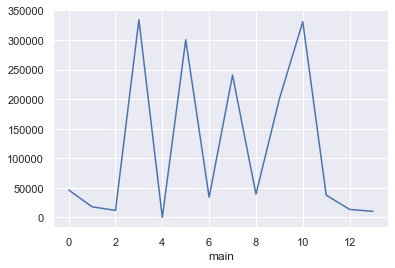

In [188]:
X.groupby('main').item_cnt.sum().plot()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [176]:
X.dtypes

date_block_num      int64
shop_id            object
item_id            object
item_price        float64
ny                float64
cat                object
main               object
city               object
item_shop           int64
item_cnt          float64
dtype: object

In [184]:
X['item_cnt']=np.array(y)

In [189]:
X[['shop_id', 'item_id', 'cat', 'main', 'city']]=X[['shop_id', 'item_id', 'cat', 'main', 'city']].astype('int')

In [191]:
test_df[['shop_id', 'item_id', 'cat', 'main', 'city']]=test_df[['shop_id', 'item_id', 'cat', 'main', 'city']].astype('int')

In [198]:
lm.feature_importances_

array([405, 660, 237, 631,  48, 449,   3,   0, 183], dtype=int32)

In [202]:
X.city=X.city==12

In [204]:
X.drop(['main','city'],axis=1,inplace=True)

In [206]:
X.drop('item_cnt',axis=1,inplace=True)

In [210]:
xgb1.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [216]:
cat=CatBoostRegressor()

In [222]:
cat.randomized_search(params,X,y,cv=5,n_iter=40,plot=True,search_by_train_test_split=True,train_size=0.7)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 10.2237489	test: 11.1730647	best: 11.1730647 (0)	total: 21.2ms	remaining: 2.1s
1:	learn: 9.3020062	test: 10.5744253	best: 10.5744253 (1)	total: 41ms	remaining: 2.01s
2:	learn: 8.8936818	test: 10.2883446	best: 10.2883446 (2)	total: 59.1ms	remaining: 1.91s
3:	learn: 8.6189977	test: 10.0803535	best: 10.0803535 (3)	total: 77.4ms	remaining: 1.86s
4:	learn: 8.2986868	test: 9.9292416	best: 9.9292416 (4)	total: 94.1ms	remaining: 1.79s
5:	learn: 8.1747049	test: 9.8576738	best: 9.8576738 (5)	total: 110ms	remaining: 1.73s
6:	learn: 8.0799783	test: 9.7950309	best: 9.7950309 (6)	total: 124ms	remaining: 1.65s
7:	learn: 7.9590159	test: 9.7497582	best: 9.7497582 (7)	total: 139ms	remaining: 1.59s
8:	learn: 7.7008329	test: 9.6694290	best: 9.6694290 (8)	total: 154ms	remaining: 1.55s
9:	learn: 7.6433499	test: 9.6342983	best: 9.6342983 (9)	total: 168ms	remaining: 1.51s
10:	learn: 7.5025172	test: 9.5877347	best: 9.5877347 (10)	total: 182ms	remaining: 1.48s
11:	learn: 7.4808188	test: 9.5750806	best

3:	learn: 11.2008688	test: 11.9215457	best: 11.9215457 (3)	total: 65.2ms	remaining: 1.56s
4:	learn: 11.1487116	test: 11.8838418	best: 11.8838418 (4)	total: 83.2ms	remaining: 1.58s
5:	learn: 11.1022577	test: 11.8476708	best: 11.8476708 (5)	total: 103ms	remaining: 1.61s
6:	learn: 11.0515041	test: 11.8111551	best: 11.8111551 (6)	total: 118ms	remaining: 1.57s
7:	learn: 11.0077048	test: 11.7769807	best: 11.7769807 (7)	total: 134ms	remaining: 1.54s
8:	learn: 10.9645793	test: 11.7434133	best: 11.7434133 (8)	total: 149ms	remaining: 1.51s
9:	learn: 10.9158069	test: 11.7085865	best: 11.7085865 (9)	total: 166ms	remaining: 1.49s
10:	learn: 10.8677420	test: 11.6743395	best: 11.6743395 (10)	total: 182ms	remaining: 1.47s
11:	learn: 10.8203444	test: 11.6406334	best: 11.6406334 (11)	total: 196ms	remaining: 1.44s
12:	learn: 10.7736366	test: 11.6074897	best: 11.6074897 (12)	total: 214ms	remaining: 1.43s
13:	learn: 10.7276408	test: 11.5749304	best: 11.5749304 (13)	total: 235ms	remaining: 1.44s
14:	learn: 

2:	learn: 8.9382385	test: 10.2908724	best: 10.2908724 (2)	total: 56.2ms	remaining: 1.81s
3:	learn: 8.6771549	test: 10.1095514	best: 10.1095514 (3)	total: 75.4ms	remaining: 1.81s
4:	learn: 8.4768311	test: 9.9768733	best: 9.9768733 (4)	total: 94.3ms	remaining: 1.79s
5:	learn: 8.2061321	test: 9.8526025	best: 9.8526025 (5)	total: 111ms	remaining: 1.74s
6:	learn: 8.0326079	test: 9.7812223	best: 9.7812223 (6)	total: 127ms	remaining: 1.69s
7:	learn: 7.9484973	test: 9.7391441	best: 9.7391441 (7)	total: 144ms	remaining: 1.66s
8:	learn: 7.9009351	test: 9.7144793	best: 9.7144793 (8)	total: 160ms	remaining: 1.61s
9:	learn: 7.6977273	test: 9.6556783	best: 9.6556783 (9)	total: 175ms	remaining: 1.57s
10:	learn: 7.6465879	test: 9.6224457	best: 9.6224457 (10)	total: 190ms	remaining: 1.54s
11:	learn: 7.6259487	test: 9.6098854	best: 9.6098854 (11)	total: 205ms	remaining: 1.51s
12:	learn: 7.5670428	test: 9.5358269	best: 9.5358269 (12)	total: 220ms	remaining: 1.47s
13:	learn: 7.5219351	test: 9.5081804	best

0:	learn: 9.3292494	test: 10.5481204	best: 10.5481204 (0)	total: 20.1ms	remaining: 3.99s
1:	learn: 8.3602021	test: 10.0056226	best: 10.0056226 (1)	total: 39.2ms	remaining: 3.88s
2:	learn: 8.0452527	test: 9.8107910	best: 9.8107910 (2)	total: 57.6ms	remaining: 3.78s
3:	learn: 7.8305388	test: 9.7139764	best: 9.7139764 (3)	total: 74ms	remaining: 3.62s
4:	learn: 7.7358421	test: 9.6578516	best: 9.6578516 (4)	total: 92.1ms	remaining: 3.59s
5:	learn: 7.6777044	test: 9.6260298	best: 9.6260298 (5)	total: 109ms	remaining: 3.53s
6:	learn: 7.6515391	test: 9.6061873	best: 9.6061873 (6)	total: 127ms	remaining: 3.51s
7:	learn: 7.5932656	test: 9.5318862	best: 9.5318862 (7)	total: 147ms	remaining: 3.53s
8:	learn: 7.5242953	test: 9.4872875	best: 9.4872875 (8)	total: 164ms	remaining: 3.48s
9:	learn: 7.4826785	test: 9.4347751	best: 9.4347751 (9)	total: 184ms	remaining: 3.49s
10:	learn: 7.4479330	test: 9.4068025	best: 9.4068025 (10)	total: 201ms	remaining: 3.46s
11:	learn: 7.4089705	test: 9.3935901	best: 9.

100:	learn: 5.6369188	test: 8.2964494	best: 8.2964494 (100)	total: 1.72s	remaining: 1.68s
101:	learn: 5.6352386	test: 8.2954425	best: 8.2954425 (101)	total: 1.74s	remaining: 1.67s
102:	learn: 5.6177772	test: 8.2893078	best: 8.2893078 (102)	total: 1.75s	remaining: 1.65s
103:	learn: 5.6072348	test: 8.2788791	best: 8.2788791 (103)	total: 1.77s	remaining: 1.63s
104:	learn: 5.5741593	test: 8.2809606	best: 8.2788791 (103)	total: 1.78s	remaining: 1.61s
105:	learn: 5.5655239	test: 8.2542583	best: 8.2542583 (105)	total: 1.8s	remaining: 1.59s
106:	learn: 5.5555815	test: 8.2538520	best: 8.2538520 (106)	total: 1.81s	remaining: 1.57s
107:	learn: 5.5372730	test: 8.2491174	best: 8.2491174 (107)	total: 1.82s	remaining: 1.55s
108:	learn: 5.5328861	test: 8.2375056	best: 8.2375056 (108)	total: 1.84s	remaining: 1.54s
109:	learn: 5.5303128	test: 8.2358592	best: 8.2358592 (109)	total: 1.86s	remaining: 1.52s
110:	learn: 5.5263167	test: 8.2336865	best: 8.2336865 (110)	total: 1.87s	remaining: 1.5s
111:	learn: 

198:	learn: 5.2192928	test: 8.0112954	best: 8.0112954 (198)	total: 3.43s	remaining: 17.2ms
199:	learn: 5.2170915	test: 8.0102918	best: 8.0102918 (199)	total: 3.45s	remaining: 0us

bestTest = 8.010291832
bestIteration = 199

3:	loss: 8.0102918	best: 8.0102918 (3)	total: 8.87s	remaining: 1m 19s
0:	learn: 10.2441988	test: 11.1865617	best: 11.1865617 (0)	total: 16ms	remaining: 3.19s
1:	learn: 9.3407320	test: 10.5958918	best: 10.5958918 (1)	total: 30.5ms	remaining: 3.02s
2:	learn: 8.9382385	test: 10.2908724	best: 10.2908724 (2)	total: 44.2ms	remaining: 2.9s
3:	learn: 8.6771549	test: 10.1095514	best: 10.1095514 (3)	total: 57.8ms	remaining: 2.83s
4:	learn: 8.4768311	test: 9.9768733	best: 9.9768733 (4)	total: 71.5ms	remaining: 2.79s
5:	learn: 8.2061321	test: 9.8526025	best: 9.8526025 (5)	total: 85.9ms	remaining: 2.78s
6:	learn: 8.0326079	test: 9.7812223	best: 9.7812223 (6)	total: 100ms	remaining: 2.76s
7:	learn: 7.9484973	test: 9.7391441	best: 9.7391441 (7)	total: 115ms	remaining: 2.75s
8:	lea

92:	learn: 6.3599542	test: 8.7043729	best: 8.7043729 (92)	total: 1.44s	remaining: 1.66s
93:	learn: 6.3581898	test: 8.7033711	best: 8.7033711 (93)	total: 1.46s	remaining: 1.65s
94:	learn: 6.3552008	test: 8.7018170	best: 8.7018170 (94)	total: 1.48s	remaining: 1.63s
95:	learn: 6.3534520	test: 8.7005847	best: 8.7005847 (95)	total: 1.49s	remaining: 1.62s
96:	learn: 6.3512144	test: 8.6994218	best: 8.6994218 (96)	total: 1.51s	remaining: 1.6s
97:	learn: 6.3488785	test: 8.6967396	best: 8.6967396 (97)	total: 1.52s	remaining: 1.59s
98:	learn: 6.3441749	test: 8.6941837	best: 8.6941837 (98)	total: 1.54s	remaining: 1.57s
99:	learn: 6.3343766	test: 8.6910126	best: 8.6910126 (99)	total: 1.55s	remaining: 1.55s
100:	learn: 6.3279601	test: 8.6809221	best: 8.6809221 (100)	total: 1.57s	remaining: 1.54s
101:	learn: 6.3266738	test: 8.6798060	best: 8.6798060 (101)	total: 1.58s	remaining: 1.52s
102:	learn: 6.3257360	test: 8.6791802	best: 8.6791802 (102)	total: 1.6s	remaining: 1.5s
103:	learn: 6.2901644	test: 8

185:	learn: 5.7749070	test: 8.3400957	best: 8.3390928 (184)	total: 2.9s	remaining: 218ms
186:	learn: 5.7695409	test: 8.3357132	best: 8.3357132 (186)	total: 2.92s	remaining: 203ms
187:	learn: 5.7682904	test: 8.3357816	best: 8.3357132 (186)	total: 2.94s	remaining: 188ms
188:	learn: 5.7669756	test: 8.3350931	best: 8.3350931 (188)	total: 2.96s	remaining: 172ms
189:	learn: 5.7655861	test: 8.3339749	best: 8.3339749 (189)	total: 2.97s	remaining: 156ms
190:	learn: 5.7650995	test: 8.3334933	best: 8.3334933 (190)	total: 2.99s	remaining: 141ms
191:	learn: 5.7638640	test: 8.3333113	best: 8.3333113 (191)	total: 3.03s	remaining: 126ms
192:	learn: 5.7614348	test: 8.3311519	best: 8.3311519 (192)	total: 3.04s	remaining: 110ms
193:	learn: 5.7603765	test: 8.3294183	best: 8.3294183 (193)	total: 3.06s	remaining: 94.6ms
194:	learn: 5.7586490	test: 8.3284565	best: 8.3284565 (194)	total: 3.08s	remaining: 79ms
195:	learn: 5.7562841	test: 8.3238872	best: 8.3238872 (195)	total: 3.1s	remaining: 63.2ms
196:	learn:

83:	learn: 5.5752617	test: 8.3688795	best: 8.3688795 (83)	total: 1.43s	remaining: 3.67s
84:	learn: 5.5603967	test: 8.3302702	best: 8.3302702 (84)	total: 1.44s	remaining: 3.65s
85:	learn: 5.5514269	test: 8.3053412	best: 8.3053412 (85)	total: 1.46s	remaining: 3.63s
86:	learn: 5.5498852	test: 8.3044153	best: 8.3044153 (86)	total: 1.47s	remaining: 3.61s
87:	learn: 5.5370185	test: 8.2866294	best: 8.2866294 (87)	total: 1.49s	remaining: 3.59s
88:	learn: 5.4734890	test: 8.3029618	best: 8.2866294 (87)	total: 1.5s	remaining: 3.57s
89:	learn: 5.4617287	test: 8.2861652	best: 8.2861652 (89)	total: 1.52s	remaining: 3.54s
90:	learn: 5.4584216	test: 8.2858462	best: 8.2858462 (90)	total: 1.53s	remaining: 3.52s
91:	learn: 5.4557924	test: 8.2879366	best: 8.2858462 (90)	total: 1.55s	remaining: 3.5s
92:	learn: 5.4486856	test: 8.2827266	best: 8.2827266 (92)	total: 1.56s	remaining: 3.48s
93:	learn: 5.4395451	test: 8.2634941	best: 8.2634941 (93)	total: 1.58s	remaining: 3.46s
94:	learn: 5.4377892	test: 8.26245

181:	learn: 5.1493965	test: 8.1200576	best: 8.1200576 (181)	total: 2.92s	remaining: 1.9s
182:	learn: 5.1427432	test: 8.1154765	best: 8.1154765 (182)	total: 2.94s	remaining: 1.88s
183:	learn: 5.1385647	test: 8.1082146	best: 8.1082146 (183)	total: 2.96s	remaining: 1.86s
184:	learn: 5.1364248	test: 8.1060231	best: 8.1060231 (184)	total: 2.97s	remaining: 1.85s
185:	learn: 5.1259578	test: 8.0949027	best: 8.0949027 (185)	total: 2.99s	remaining: 1.83s
186:	learn: 5.1237669	test: 8.0983223	best: 8.0949027 (185)	total: 3s	remaining: 1.81s
187:	learn: 5.1220715	test: 8.0975756	best: 8.0949027 (185)	total: 3.02s	remaining: 1.8s
188:	learn: 5.1208432	test: 8.0970354	best: 8.0949027 (185)	total: 3.03s	remaining: 1.78s
189:	learn: 5.1194657	test: 8.0900942	best: 8.0900942 (189)	total: 3.05s	remaining: 1.76s
190:	learn: 5.1175886	test: 8.0894711	best: 8.0894711 (190)	total: 3.06s	remaining: 1.75s
191:	learn: 5.1162835	test: 8.0886155	best: 8.0886155 (191)	total: 3.08s	remaining: 1.73s
192:	learn: 5.1

278:	learn: 4.9452980	test: 8.0139482	best: 8.0114096 (272)	total: 4.42s	remaining: 333ms
279:	learn: 4.9435769	test: 8.0136712	best: 8.0114096 (272)	total: 4.44s	remaining: 317ms
280:	learn: 4.9428541	test: 8.0131516	best: 8.0114096 (272)	total: 4.45s	remaining: 301ms
281:	learn: 4.9419290	test: 8.0132500	best: 8.0114096 (272)	total: 4.47s	remaining: 285ms
282:	learn: 4.9405771	test: 8.0127943	best: 8.0114096 (272)	total: 4.49s	remaining: 269ms
283:	learn: 4.9315887	test: 8.0160292	best: 8.0114096 (272)	total: 4.5s	remaining: 254ms
284:	learn: 4.9306789	test: 8.0156555	best: 8.0114096 (272)	total: 4.52s	remaining: 238ms
285:	learn: 4.9302551	test: 8.0153720	best: 8.0114096 (272)	total: 4.53s	remaining: 222ms
286:	learn: 4.9273461	test: 8.0132507	best: 8.0114096 (272)	total: 4.54s	remaining: 206ms
287:	learn: 4.9268619	test: 8.0127541	best: 8.0114096 (272)	total: 4.56s	remaining: 190ms
288:	learn: 4.9264877	test: 8.0125976	best: 8.0114096 (272)	total: 4.57s	remaining: 174ms
289:	learn:

71:	learn: 5.6937866	test: 8.3281910	best: 8.3281910 (71)	total: 1.14s	remaining: 3.61s
72:	learn: 5.6910771	test: 8.3257542	best: 8.3257542 (72)	total: 1.16s	remaining: 3.6s
73:	learn: 5.6817651	test: 8.3222865	best: 8.3222865 (73)	total: 1.18s	remaining: 3.6s
74:	learn: 5.6722728	test: 8.3223692	best: 8.3222865 (73)	total: 1.2s	remaining: 3.59s
75:	learn: 5.6696211	test: 8.3207299	best: 8.3207299 (75)	total: 1.21s	remaining: 3.57s
76:	learn: 5.6676995	test: 8.3197021	best: 8.3197021 (76)	total: 1.23s	remaining: 3.56s
77:	learn: 5.6612710	test: 8.3153529	best: 8.3153529 (77)	total: 1.24s	remaining: 3.54s
78:	learn: 5.6550429	test: 8.3124461	best: 8.3124461 (78)	total: 1.26s	remaining: 3.52s
79:	learn: 5.6529158	test: 8.3151672	best: 8.3124461 (78)	total: 1.27s	remaining: 3.5s
80:	learn: 5.6518459	test: 8.3143322	best: 8.3124461 (78)	total: 1.29s	remaining: 3.48s
81:	learn: 5.6359829	test: 8.2926110	best: 8.2926110 (81)	total: 1.3s	remaining: 3.47s
82:	learn: 5.6325545	test: 8.2943062	

168:	learn: 5.2262379	test: 8.1119326	best: 8.0902603 (167)	total: 2.65s	remaining: 2.05s
169:	learn: 5.2250464	test: 8.1120155	best: 8.0902603 (167)	total: 2.67s	remaining: 2.04s
170:	learn: 5.2168000	test: 8.1144642	best: 8.0902603 (167)	total: 2.68s	remaining: 2.02s
171:	learn: 5.2152797	test: 8.1137364	best: 8.0902603 (167)	total: 2.7s	remaining: 2.01s
172:	learn: 5.2134072	test: 8.1120285	best: 8.0902603 (167)	total: 2.71s	remaining: 1.99s
173:	learn: 5.2092144	test: 8.1114519	best: 8.0902603 (167)	total: 2.73s	remaining: 1.98s
174:	learn: 5.2075994	test: 8.1107561	best: 8.0902603 (167)	total: 2.74s	remaining: 1.96s
175:	learn: 5.2068615	test: 8.1104661	best: 8.0902603 (167)	total: 2.76s	remaining: 1.94s
176:	learn: 5.2018853	test: 8.0929473	best: 8.0902603 (167)	total: 2.77s	remaining: 1.93s
177:	learn: 5.1998147	test: 8.0982880	best: 8.0902603 (167)	total: 2.79s	remaining: 1.91s
178:	learn: 5.1927375	test: 8.0970867	best: 8.0902603 (167)	total: 2.8s	remaining: 1.89s
179:	learn: 

268:	learn: 5.0399915	test: 8.0560644	best: 8.0533077 (264)	total: 4.32s	remaining: 498ms
269:	learn: 5.0393407	test: 8.0555745	best: 8.0533077 (264)	total: 4.34s	remaining: 483ms
270:	learn: 5.0374249	test: 8.0524739	best: 8.0524739 (270)	total: 4.36s	remaining: 467ms
271:	learn: 5.0371124	test: 8.0523728	best: 8.0523728 (271)	total: 4.38s	remaining: 451ms
272:	learn: 5.0350404	test: 8.0516556	best: 8.0516556 (272)	total: 4.4s	remaining: 435ms
273:	learn: 5.0339363	test: 8.0510976	best: 8.0510976 (273)	total: 4.42s	remaining: 420ms
274:	learn: 5.0329843	test: 8.0508100	best: 8.0508100 (274)	total: 4.44s	remaining: 404ms
275:	learn: 5.0321858	test: 8.0506395	best: 8.0506395 (275)	total: 4.46s	remaining: 388ms
276:	learn: 5.0310224	test: 8.0534188	best: 8.0506395 (275)	total: 4.48s	remaining: 372ms
277:	learn: 5.0303210	test: 8.0530683	best: 8.0506395 (275)	total: 4.5s	remaining: 356ms
278:	learn: 5.0292463	test: 8.0514568	best: 8.0506395 (275)	total: 4.52s	remaining: 340ms
279:	learn: 

64:	learn: 9.3902748	test: 10.5812196	best: 10.5812196 (64)	total: 1.07s	remaining: 3.86s
65:	learn: 9.3750921	test: 10.5700822	best: 10.5700822 (65)	total: 1.08s	remaining: 3.84s
66:	learn: 9.3597531	test: 10.5579067	best: 10.5579067 (66)	total: 1.1s	remaining: 3.83s
67:	learn: 9.3343006	test: 10.5445039	best: 10.5445039 (67)	total: 1.11s	remaining: 3.8s
68:	learn: 9.3191927	test: 10.5328993	best: 10.5328993 (68)	total: 1.13s	remaining: 3.78s
69:	learn: 9.3053546	test: 10.5232264	best: 10.5232264 (69)	total: 1.14s	remaining: 3.76s
70:	learn: 9.2911110	test: 10.5125656	best: 10.5125656 (70)	total: 1.16s	remaining: 3.74s
71:	learn: 9.2766113	test: 10.5015533	best: 10.5015533 (71)	total: 1.17s	remaining: 3.71s
72:	learn: 9.2621959	test: 10.4908682	best: 10.4908682 (72)	total: 1.19s	remaining: 3.69s
73:	learn: 9.2483342	test: 10.4799664	best: 10.4799664 (73)	total: 1.2s	remaining: 3.67s
74:	learn: 9.2321420	test: 10.4696603	best: 10.4696603 (74)	total: 1.22s	remaining: 3.65s
75:	learn: 9.

159:	learn: 8.2380941	test: 9.9195945	best: 9.9195945 (159)	total: 2.53s	remaining: 2.21s
160:	learn: 8.2286458	test: 9.9164169	best: 9.9164169 (160)	total: 2.55s	remaining: 2.2s
161:	learn: 8.2241466	test: 9.9136583	best: 9.9136583 (161)	total: 2.56s	remaining: 2.18s
162:	learn: 8.2127250	test: 9.9093640	best: 9.9093640 (162)	total: 2.58s	remaining: 2.17s
163:	learn: 8.2014815	test: 9.9051583	best: 9.9051583 (163)	total: 2.59s	remaining: 2.15s
164:	learn: 8.1966756	test: 9.9021229	best: 9.9021229 (164)	total: 2.61s	remaining: 2.13s
165:	learn: 8.1863582	test: 9.8978599	best: 9.8978599 (165)	total: 2.62s	remaining: 2.12s
166:	learn: 8.1754856	test: 9.8938347	best: 9.8938347 (166)	total: 2.64s	remaining: 2.1s
167:	learn: 8.1655775	test: 9.8897944	best: 9.8897944 (167)	total: 2.65s	remaining: 2.08s
168:	learn: 8.1599570	test: 9.8871223	best: 9.8871223 (168)	total: 2.67s	remaining: 2.07s
169:	learn: 8.1494485	test: 9.8832723	best: 9.8832723 (169)	total: 2.69s	remaining: 2.05s
170:	learn: 

252:	learn: 7.7677998	test: 9.6885189	best: 9.6885189 (252)	total: 3.97s	remaining: 738ms
253:	learn: 7.7632348	test: 9.6866539	best: 9.6866539 (253)	total: 3.99s	remaining: 723ms
254:	learn: 7.7587366	test: 9.6848227	best: 9.6848227 (254)	total: 4.01s	remaining: 708ms
255:	learn: 7.7568544	test: 9.6838302	best: 9.6838302 (255)	total: 4.03s	remaining: 692ms
256:	learn: 7.7548704	test: 9.6824700	best: 9.6824700 (256)	total: 4.04s	remaining: 676ms
257:	learn: 7.7528847	test: 9.6812468	best: 9.6812468 (257)	total: 4.05s	remaining: 660ms
258:	learn: 7.7508943	test: 9.6799762	best: 9.6799762 (258)	total: 4.07s	remaining: 644ms
259:	learn: 7.7490101	test: 9.6787416	best: 9.6787416 (259)	total: 4.08s	remaining: 628ms
260:	learn: 7.7469732	test: 9.6776809	best: 9.6776809 (260)	total: 4.1s	remaining: 613ms
261:	learn: 7.7448072	test: 9.6764178	best: 9.6764178 (261)	total: 4.11s	remaining: 597ms
262:	learn: 7.7429551	test: 9.6752508	best: 9.6752508 (262)	total: 4.13s	remaining: 581ms
263:	learn:

49:	learn: 5.9297176	test: 8.4916518	best: 8.4916518 (49)	total: 742ms	remaining: 3.71s
50:	learn: 5.8909115	test: 8.4844509	best: 8.4844509 (50)	total: 759ms	remaining: 3.7s
51:	learn: 5.8852877	test: 8.4823788	best: 8.4823788 (51)	total: 775ms	remaining: 3.7s
52:	learn: 5.8835168	test: 8.4816001	best: 8.4816001 (52)	total: 789ms	remaining: 3.68s
53:	learn: 5.8770318	test: 8.4788994	best: 8.4788994 (53)	total: 804ms	remaining: 3.66s
54:	learn: 5.8684454	test: 8.4748989	best: 8.4748989 (54)	total: 818ms	remaining: 3.64s
55:	learn: 5.8649998	test: 8.4711441	best: 8.4711441 (55)	total: 832ms	remaining: 3.63s
56:	learn: 5.8352696	test: 8.4809820	best: 8.4711441 (55)	total: 847ms	remaining: 3.61s
57:	learn: 5.8170566	test: 8.4407944	best: 8.4407944 (57)	total: 864ms	remaining: 3.6s
58:	learn: 5.8150290	test: 8.4410939	best: 8.4407944 (57)	total: 881ms	remaining: 3.6s
59:	learn: 5.8118028	test: 8.4385601	best: 8.4385601 (59)	total: 898ms	remaining: 3.59s
60:	learn: 5.8102764	test: 8.4377219

145:	learn: 5.3803988	test: 8.1184418	best: 8.1184260 (144)	total: 2.21s	remaining: 2.34s
146:	learn: 5.3775515	test: 8.1194417	best: 8.1184260 (144)	total: 2.23s	remaining: 2.32s
147:	learn: 5.3755204	test: 8.1208615	best: 8.1184260 (144)	total: 2.25s	remaining: 2.31s
148:	learn: 5.3737029	test: 8.1200848	best: 8.1184260 (144)	total: 2.26s	remaining: 2.29s
149:	learn: 5.3730273	test: 8.1197718	best: 8.1184260 (144)	total: 2.28s	remaining: 2.28s
150:	learn: 5.3724635	test: 8.1191860	best: 8.1184260 (144)	total: 2.29s	remaining: 2.27s
151:	learn: 5.3704250	test: 8.1194754	best: 8.1184260 (144)	total: 2.31s	remaining: 2.25s
152:	learn: 5.3682450	test: 8.1172216	best: 8.1172216 (152)	total: 2.33s	remaining: 2.23s
153:	learn: 5.3669729	test: 8.1156809	best: 8.1156809 (153)	total: 2.34s	remaining: 2.22s
154:	learn: 5.3664221	test: 8.1150982	best: 8.1150982 (154)	total: 2.35s	remaining: 2.2s
155:	learn: 5.3651784	test: 8.1147253	best: 8.1147253 (155)	total: 2.37s	remaining: 2.19s
156:	learn:

244:	learn: 5.0510373	test: 8.0441862	best: 8.0392312 (206)	total: 3.71s	remaining: 833ms
245:	learn: 5.0500467	test: 8.0436946	best: 8.0392312 (206)	total: 3.73s	remaining: 819ms
246:	learn: 5.0469924	test: 8.0452423	best: 8.0392312 (206)	total: 3.75s	remaining: 804ms
247:	learn: 5.0460216	test: 8.0452613	best: 8.0392312 (206)	total: 3.76s	remaining: 789ms
248:	learn: 5.0449297	test: 8.0444781	best: 8.0392312 (206)	total: 3.78s	remaining: 774ms
249:	learn: 5.0432208	test: 8.0417169	best: 8.0392312 (206)	total: 3.79s	remaining: 758ms
250:	learn: 5.0429073	test: 8.0415921	best: 8.0392312 (206)	total: 3.81s	remaining: 743ms
251:	learn: 5.0409215	test: 8.0426473	best: 8.0392312 (206)	total: 3.82s	remaining: 728ms
252:	learn: 5.0385954	test: 8.0417199	best: 8.0392312 (206)	total: 3.83s	remaining: 713ms
253:	learn: 5.0364982	test: 8.0405075	best: 8.0392312 (206)	total: 3.85s	remaining: 697ms
254:	learn: 5.0355371	test: 8.0399790	best: 8.0392312 (206)	total: 3.87s	remaining: 682ms
255:	learn

36:	learn: 5.3790797	test: 8.0872045	best: 8.0872045 (36)	total: 670ms	remaining: 1.14s
37:	learn: 5.3547815	test: 8.0806885	best: 8.0806885 (37)	total: 692ms	remaining: 1.13s
38:	learn: 5.3283114	test: 8.0648921	best: 8.0648921 (38)	total: 710ms	remaining: 1.11s
39:	learn: 5.3202259	test: 8.0554221	best: 8.0554221 (39)	total: 728ms	remaining: 1.09s
40:	learn: 5.2935274	test: 8.0280984	best: 8.0280984 (40)	total: 746ms	remaining: 1.07s
41:	learn: 5.2660619	test: 8.0221236	best: 8.0221236 (41)	total: 764ms	remaining: 1.05s
42:	learn: 5.2608255	test: 8.0173947	best: 8.0173947 (42)	total: 783ms	remaining: 1.04s
43:	learn: 5.2501003	test: 8.0146235	best: 8.0146235 (43)	total: 799ms	remaining: 1.02s
44:	learn: 5.2410667	test: 8.0104189	best: 8.0104189 (44)	total: 818ms	remaining: 1000ms
45:	learn: 5.2355653	test: 8.0076825	best: 8.0076825 (45)	total: 837ms	remaining: 983ms
46:	learn: 5.2258857	test: 8.0044805	best: 8.0044805 (46)	total: 858ms	remaining: 968ms
47:	learn: 5.2195311	test: 8.00

38:	learn: 6.1232577	test: 8.6561057	best: 8.6561057 (38)	total: 721ms	remaining: 1.13s
39:	learn: 6.1140503	test: 8.6441643	best: 8.6441643 (39)	total: 740ms	remaining: 1.11s
40:	learn: 6.0811599	test: 8.6350901	best: 8.6350901 (40)	total: 762ms	remaining: 1.1s
41:	learn: 6.0683305	test: 8.6153655	best: 8.6153655 (41)	total: 779ms	remaining: 1.07s
42:	learn: 6.0640771	test: 8.6168336	best: 8.6153655 (41)	total: 795ms	remaining: 1.05s
43:	learn: 6.0419732	test: 8.5965084	best: 8.5965084 (43)	total: 812ms	remaining: 1.03s
44:	learn: 6.0300371	test: 8.5917603	best: 8.5917603 (44)	total: 830ms	remaining: 1.01s
45:	learn: 6.0130108	test: 8.5837282	best: 8.5837282 (45)	total: 849ms	remaining: 997ms
46:	learn: 6.0089751	test: 8.5851933	best: 8.5837282 (45)	total: 868ms	remaining: 978ms
47:	learn: 5.9986411	test: 8.5729321	best: 8.5729321 (47)	total: 885ms	remaining: 959ms
48:	learn: 5.9779757	test: 8.5652755	best: 8.5652755 (48)	total: 904ms	remaining: 941ms
49:	learn: 5.9666742	test: 8.5535

37:	learn: 5.3783707	test: 8.3306271	best: 8.3306271 (37)	total: 727ms	remaining: 1.19s
38:	learn: 5.3696784	test: 8.3338208	best: 8.3306271 (37)	total: 749ms	remaining: 1.17s
39:	learn: 5.3628628	test: 8.3299083	best: 8.3299083 (39)	total: 767ms	remaining: 1.15s
40:	learn: 5.3498986	test: 8.3235989	best: 8.3235989 (40)	total: 785ms	remaining: 1.13s
41:	learn: 5.3447918	test: 8.3211345	best: 8.3211345 (41)	total: 803ms	remaining: 1.11s
42:	learn: 5.3194819	test: 8.2768558	best: 8.2768558 (42)	total: 820ms	remaining: 1.09s
43:	learn: 5.3032761	test: 8.2611463	best: 8.2611463 (43)	total: 839ms	remaining: 1.07s
44:	learn: 5.2852050	test: 8.2655430	best: 8.2611463 (43)	total: 858ms	remaining: 1.05s
45:	learn: 5.2578458	test: 8.2555749	best: 8.2555749 (45)	total: 875ms	remaining: 1.03s
46:	learn: 5.2508917	test: 8.2555173	best: 8.2555173 (46)	total: 892ms	remaining: 1s
47:	learn: 5.2429261	test: 8.2517396	best: 8.2517396 (47)	total: 910ms	remaining: 986ms
48:	learn: 5.2368920	test: 8.246336

40:	learn: 5.3623467	test: 8.1707764	best: 8.1707764 (40)	total: 758ms	remaining: 1.09s
41:	learn: 5.3485352	test: 8.1499673	best: 8.1499673 (41)	total: 780ms	remaining: 1.08s
42:	learn: 5.3107411	test: 8.1393125	best: 8.1393125 (42)	total: 799ms	remaining: 1.06s
43:	learn: 5.2927753	test: 8.1472612	best: 8.1393125 (42)	total: 817ms	remaining: 1.04s
44:	learn: 5.2890445	test: 8.1447544	best: 8.1393125 (42)	total: 834ms	remaining: 1.02s
45:	learn: 5.2694572	test: 8.1271703	best: 8.1271703 (45)	total: 854ms	remaining: 1s
46:	learn: 5.1927932	test: 8.0858822	best: 8.0858822 (46)	total: 871ms	remaining: 982ms
47:	learn: 5.1890967	test: 8.0826814	best: 8.0826814 (47)	total: 888ms	remaining: 963ms
48:	learn: 5.1802504	test: 8.0768660	best: 8.0768660 (48)	total: 906ms	remaining: 943ms
49:	learn: 5.1740374	test: 8.0738312	best: 8.0738312 (49)	total: 924ms	remaining: 924ms
50:	learn: 5.1618627	test: 8.0622509	best: 8.0622509 (50)	total: 942ms	remaining: 905ms
51:	learn: 5.1408865	test: 8.028081

41:	learn: 6.0746577	test: 8.6101888	best: 8.6101888 (41)	total: 786ms	remaining: 2.96s
42:	learn: 6.0353334	test: 8.5905046	best: 8.5905046 (42)	total: 807ms	remaining: 2.95s
43:	learn: 5.9876622	test: 8.5437121	best: 8.5437121 (43)	total: 828ms	remaining: 2.94s
44:	learn: 5.9672880	test: 8.5343397	best: 8.5343397 (44)	total: 845ms	remaining: 2.91s
45:	learn: 5.9621072	test: 8.5290683	best: 8.5290683 (45)	total: 864ms	remaining: 2.89s
46:	learn: 5.9326375	test: 8.5150226	best: 8.5150226 (46)	total: 882ms	remaining: 2.87s
47:	learn: 5.9180612	test: 8.4976264	best: 8.4976264 (47)	total: 900ms	remaining: 2.85s
48:	learn: 5.9069063	test: 8.4914873	best: 8.4914873 (48)	total: 919ms	remaining: 2.83s
49:	learn: 5.8978461	test: 8.4870426	best: 8.4870426 (49)	total: 938ms	remaining: 2.81s
50:	learn: 5.8848377	test: 8.4811595	best: 8.4811595 (50)	total: 956ms	remaining: 2.79s
51:	learn: 5.8725437	test: 8.4743848	best: 8.4743848 (51)	total: 976ms	remaining: 2.78s
52:	learn: 5.8686023	test: 8.470

142:	learn: 5.1178811	test: 7.9490744	best: 7.9490744 (142)	total: 2.69s	remaining: 1.07s
143:	learn: 5.1159854	test: 7.9482676	best: 7.9482676 (143)	total: 2.71s	remaining: 1.05s
144:	learn: 5.1142510	test: 7.9492780	best: 7.9482676 (143)	total: 2.73s	remaining: 1.04s
145:	learn: 5.1119750	test: 7.9486046	best: 7.9482676 (143)	total: 2.75s	remaining: 1.02s
146:	learn: 5.1110308	test: 7.9479726	best: 7.9479726 (146)	total: 2.77s	remaining: 999ms
147:	learn: 5.1093165	test: 7.9469566	best: 7.9469566 (147)	total: 2.79s	remaining: 980ms
148:	learn: 5.1035042	test: 7.9459954	best: 7.9459954 (148)	total: 2.81s	remaining: 961ms
149:	learn: 5.0904365	test: 7.9417009	best: 7.9417009 (149)	total: 2.83s	remaining: 942ms
150:	learn: 5.0786643	test: 7.9311844	best: 7.9311844 (150)	total: 2.85s	remaining: 924ms
151:	learn: 5.0481955	test: 7.9167010	best: 7.9167010 (151)	total: 2.86s	remaining: 905ms
152:	learn: 5.0419194	test: 7.9132620	best: 7.9132620 (152)	total: 2.88s	remaining: 885ms
153:	learn

42:	learn: 5.6431688	test: 8.2841782	best: 8.2841782 (42)	total: 790ms	remaining: 2.88s
43:	learn: 5.6022314	test: 8.2724622	best: 8.2724622 (43)	total: 810ms	remaining: 2.87s
44:	learn: 5.5964670	test: 8.2698695	best: 8.2698695 (44)	total: 831ms	remaining: 2.86s
45:	learn: 5.5679732	test: 8.2562596	best: 8.2562596 (45)	total: 849ms	remaining: 2.84s
46:	learn: 5.5633586	test: 8.2519465	best: 8.2519465 (46)	total: 866ms	remaining: 2.82s
47:	learn: 5.5571686	test: 8.2514437	best: 8.2514437 (47)	total: 883ms	remaining: 2.8s
48:	learn: 5.5481271	test: 8.2464480	best: 8.2464480 (48)	total: 902ms	remaining: 2.78s
49:	learn: 5.5405584	test: 8.2425350	best: 8.2425350 (49)	total: 921ms	remaining: 2.76s
50:	learn: 5.5175180	test: 8.2386171	best: 8.2386171 (50)	total: 943ms	remaining: 2.75s
51:	learn: 5.5055357	test: 8.2250622	best: 8.2250622 (51)	total: 966ms	remaining: 2.75s
52:	learn: 5.4933987	test: 8.2223740	best: 8.2223740 (52)	total: 987ms	remaining: 2.74s
53:	learn: 5.4892629	test: 8.2184

141:	learn: 4.7578829	test: 7.7142533	best: 7.7142533 (141)	total: 2.73s	remaining: 1.11s
142:	learn: 4.7569458	test: 7.7136986	best: 7.7136986 (142)	total: 2.75s	remaining: 1.1s
143:	learn: 4.7465710	test: 7.7235485	best: 7.7136986 (142)	total: 2.77s	remaining: 1.08s
144:	learn: 4.7451187	test: 7.7229389	best: 7.7136986 (142)	total: 2.79s	remaining: 1.06s
145:	learn: 4.7317967	test: 7.7251860	best: 7.7136986 (142)	total: 2.81s	remaining: 1.04s
146:	learn: 4.7246669	test: 7.7289748	best: 7.7136986 (142)	total: 2.83s	remaining: 1.02s
147:	learn: 4.7239517	test: 7.7284307	best: 7.7136986 (142)	total: 2.85s	remaining: 1s
148:	learn: 4.7199290	test: 7.7297876	best: 7.7136986 (142)	total: 2.88s	remaining: 984ms
149:	learn: 4.7076671	test: 7.7221759	best: 7.7136986 (142)	total: 2.9s	remaining: 966ms
150:	learn: 4.7041146	test: 7.7213755	best: 7.7136986 (142)	total: 2.92s	remaining: 947ms
151:	learn: 4.7018175	test: 7.7221964	best: 7.7136986 (142)	total: 2.94s	remaining: 928ms
152:	learn: 4.7

41:	learn: 5.3781392	test: 8.2362998	best: 8.2362998 (41)	total: 771ms	remaining: 2.9s
42:	learn: 5.3733488	test: 8.2330007	best: 8.2330007 (42)	total: 793ms	remaining: 2.9s
43:	learn: 5.3661363	test: 8.2147817	best: 8.2147817 (43)	total: 814ms	remaining: 2.88s
44:	learn: 5.3579259	test: 8.2070469	best: 8.2070469 (44)	total: 830ms	remaining: 2.86s
45:	learn: 5.3436834	test: 8.1866371	best: 8.1866371 (45)	total: 849ms	remaining: 2.84s
46:	learn: 5.3217561	test: 8.1880887	best: 8.1866371 (45)	total: 866ms	remaining: 2.82s
47:	learn: 5.3145666	test: 8.1852895	best: 8.1852895 (47)	total: 886ms	remaining: 2.8s
48:	learn: 5.3107052	test: 8.1827233	best: 8.1827233 (48)	total: 906ms	remaining: 2.79s
49:	learn: 5.2432913	test: 8.1497572	best: 8.1497572 (49)	total: 923ms	remaining: 2.77s
50:	learn: 5.2263926	test: 8.1346319	best: 8.1346319 (50)	total: 939ms	remaining: 2.74s
51:	learn: 5.2118473	test: 8.1112250	best: 8.1112250 (51)	total: 956ms	remaining: 2.72s
52:	learn: 5.1918561	test: 8.104768

141:	learn: 4.5774205	test: 7.8048460	best: 7.8048460 (141)	total: 2.64s	remaining: 1.08s
142:	learn: 4.5512743	test: 7.7903795	best: 7.7903795 (142)	total: 2.66s	remaining: 1.06s
143:	learn: 4.5494449	test: 7.7892624	best: 7.7892624 (143)	total: 2.68s	remaining: 1.04s
144:	learn: 4.5472331	test: 7.7867920	best: 7.7867920 (144)	total: 2.69s	remaining: 1.02s
145:	learn: 4.5380438	test: 7.7820412	best: 7.7820412 (145)	total: 2.71s	remaining: 1s
146:	learn: 4.5327754	test: 7.7831764	best: 7.7820412 (145)	total: 2.73s	remaining: 985ms
147:	learn: 4.5314801	test: 7.7825140	best: 7.7820412 (145)	total: 2.75s	remaining: 967ms
148:	learn: 4.5298054	test: 7.7811273	best: 7.7811273 (148)	total: 2.77s	remaining: 948ms
149:	learn: 4.5274458	test: 7.7816820	best: 7.7811273 (148)	total: 2.79s	remaining: 930ms
150:	learn: 4.5210506	test: 7.7804794	best: 7.7804794 (150)	total: 2.81s	remaining: 911ms
151:	learn: 4.5159655	test: 7.7768449	best: 7.7768449 (151)	total: 2.83s	remaining: 892ms
152:	learn: 4

40:	learn: 5.4316925	test: 8.1914098	best: 8.1914098 (40)	total: 759ms	remaining: 4.79s
41:	learn: 5.4203092	test: 8.1891680	best: 8.1891680 (41)	total: 781ms	remaining: 4.8s
42:	learn: 5.3892183	test: 8.1826263	best: 8.1826263 (42)	total: 801ms	remaining: 4.79s
43:	learn: 5.3798038	test: 8.1858765	best: 8.1826263 (42)	total: 820ms	remaining: 4.77s
44:	learn: 5.3738521	test: 8.1820359	best: 8.1820359 (44)	total: 843ms	remaining: 4.77s
45:	learn: 5.3587327	test: 8.1584295	best: 8.1584295 (45)	total: 860ms	remaining: 4.75s
46:	learn: 5.3489691	test: 8.1417292	best: 8.1417292 (46)	total: 878ms	remaining: 4.72s
47:	learn: 5.3443883	test: 8.1383717	best: 8.1383717 (47)	total: 896ms	remaining: 4.71s
48:	learn: 5.3324378	test: 8.1154709	best: 8.1154709 (48)	total: 914ms	remaining: 4.68s
49:	learn: 5.3152456	test: 8.0928614	best: 8.0928614 (49)	total: 929ms	remaining: 4.64s
50:	learn: 5.3102627	test: 8.0903156	best: 8.0903156 (50)	total: 947ms	remaining: 4.62s
51:	learn: 5.3044080	test: 8.0891

135:	learn: 4.6232035	test: 7.7352071	best: 7.7342384 (134)	total: 2.64s	remaining: 3.18s
136:	learn: 4.6212362	test: 7.7356022	best: 7.7342384 (134)	total: 2.66s	remaining: 3.17s
137:	learn: 4.6174601	test: 7.7331770	best: 7.7331770 (137)	total: 2.68s	remaining: 3.15s
138:	learn: 4.6119725	test: 7.7297568	best: 7.7297568 (138)	total: 2.71s	remaining: 3.13s
139:	learn: 4.6098813	test: 7.7287333	best: 7.7287333 (139)	total: 2.73s	remaining: 3.12s
140:	learn: 4.6068550	test: 7.7273364	best: 7.7273364 (140)	total: 2.75s	remaining: 3.1s
141:	learn: 4.6050550	test: 7.7337805	best: 7.7273364 (140)	total: 2.78s	remaining: 3.09s
142:	learn: 4.6001222	test: 7.7350968	best: 7.7273364 (140)	total: 2.8s	remaining: 3.08s
143:	learn: 4.5978748	test: 7.7308762	best: 7.7273364 (140)	total: 2.83s	remaining: 3.06s
144:	learn: 4.5953162	test: 7.7303661	best: 7.7273364 (140)	total: 2.85s	remaining: 3.05s
145:	learn: 4.5875334	test: 7.7456228	best: 7.7273364 (140)	total: 2.88s	remaining: 3.04s
146:	learn: 

233:	learn: 4.2806094	test: 7.6483171	best: 7.6483171 (233)	total: 4.74s	remaining: 1.33s
234:	learn: 4.2798709	test: 7.6481452	best: 7.6481452 (234)	total: 4.76s	remaining: 1.32s
235:	learn: 4.2785138	test: 7.6474507	best: 7.6474507 (235)	total: 4.78s	remaining: 1.29s
236:	learn: 4.2722468	test: 7.6507804	best: 7.6474507 (235)	total: 4.79s	remaining: 1.27s
237:	learn: 4.2715476	test: 7.6505818	best: 7.6474507 (235)	total: 4.81s	remaining: 1.25s
238:	learn: 4.2698641	test: 7.6504512	best: 7.6474507 (235)	total: 4.83s	remaining: 1.23s
239:	learn: 4.2680680	test: 7.6496051	best: 7.6474507 (235)	total: 4.85s	remaining: 1.21s
240:	learn: 4.2659225	test: 7.6480449	best: 7.6474507 (235)	total: 4.87s	remaining: 1.19s
241:	learn: 4.2573228	test: 7.6455457	best: 7.6455457 (241)	total: 4.89s	remaining: 1.17s
242:	learn: 4.2543292	test: 7.6481595	best: 7.6455457 (241)	total: 4.9s	remaining: 1.15s
243:	learn: 4.2516082	test: 7.6476959	best: 7.6455457 (241)	total: 4.92s	remaining: 1.13s
244:	learn:

33:	learn: 5.3337684	test: 8.1740578	best: 8.1740578 (33)	total: 619ms	remaining: 4.84s
34:	learn: 5.3183514	test: 8.1502689	best: 8.1502689 (34)	total: 640ms	remaining: 4.85s
35:	learn: 5.2791207	test: 8.1420374	best: 8.1420374 (35)	total: 664ms	remaining: 4.87s
36:	learn: 5.2661188	test: 8.1386083	best: 8.1386083 (36)	total: 683ms	remaining: 4.86s
37:	learn: 5.2352931	test: 8.1154642	best: 8.1154642 (37)	total: 701ms	remaining: 4.83s
38:	learn: 5.2245592	test: 8.1246660	best: 8.1154642 (37)	total: 718ms	remaining: 4.8s
39:	learn: 5.2124180	test: 8.1036155	best: 8.1036155 (39)	total: 736ms	remaining: 4.78s
40:	learn: 5.1449209	test: 8.0829464	best: 8.0829464 (40)	total: 753ms	remaining: 4.76s
41:	learn: 5.1404703	test: 8.0803800	best: 8.0803800 (41)	total: 770ms	remaining: 4.73s
42:	learn: 5.1341460	test: 8.0781219	best: 8.0781219 (42)	total: 788ms	remaining: 4.71s
43:	learn: 5.1245029	test: 8.0530161	best: 8.0530161 (43)	total: 806ms	remaining: 4.69s
44:	learn: 5.1210676	test: 8.0514

133:	learn: 4.3567324	test: 7.7119929	best: 7.7071828 (119)	total: 2.5s	remaining: 3.1s
134:	learn: 4.3540276	test: 7.7099782	best: 7.7071828 (119)	total: 2.53s	remaining: 3.09s
135:	learn: 4.3500978	test: 7.7104665	best: 7.7071828 (119)	total: 2.55s	remaining: 3.07s
136:	learn: 4.3441779	test: 7.7174422	best: 7.7071828 (119)	total: 2.57s	remaining: 3.05s
137:	learn: 4.3419533	test: 7.7186643	best: 7.7071828 (119)	total: 2.59s	remaining: 3.04s
138:	learn: 4.3311821	test: 7.7133394	best: 7.7071828 (119)	total: 2.6s	remaining: 3.02s
139:	learn: 4.3176323	test: 7.7131792	best: 7.7071828 (119)	total: 2.62s	remaining: 3s
140:	learn: 4.3053238	test: 7.7150895	best: 7.7071828 (119)	total: 2.64s	remaining: 2.98s
141:	learn: 4.3030031	test: 7.7135035	best: 7.7071828 (119)	total: 2.66s	remaining: 2.96s
142:	learn: 4.2976751	test: 7.7125356	best: 7.7071828 (119)	total: 2.67s	remaining: 2.93s
143:	learn: 4.2935528	test: 7.7105548	best: 7.7071828 (119)	total: 2.69s	remaining: 2.91s
144:	learn: 4.28

232:	learn: 4.0219420	test: 7.6504191	best: 7.6345071 (200)	total: 4.36s	remaining: 1.25s
233:	learn: 4.0212025	test: 7.6501247	best: 7.6345071 (200)	total: 4.38s	remaining: 1.24s
234:	learn: 4.0182758	test: 7.6486748	best: 7.6345071 (200)	total: 4.41s	remaining: 1.22s
235:	learn: 4.0120207	test: 7.6476228	best: 7.6345071 (200)	total: 4.43s	remaining: 1.2s
236:	learn: 4.0043056	test: 7.6492185	best: 7.6345071 (200)	total: 4.45s	remaining: 1.18s
237:	learn: 4.0015846	test: 7.6491136	best: 7.6345071 (200)	total: 4.47s	remaining: 1.16s
238:	learn: 3.9993958	test: 7.6458555	best: 7.6345071 (200)	total: 4.49s	remaining: 1.15s
239:	learn: 3.9987225	test: 7.6455565	best: 7.6345071 (200)	total: 4.51s	remaining: 1.13s
240:	learn: 3.9979075	test: 7.6452164	best: 7.6345071 (200)	total: 4.53s	remaining: 1.11s
241:	learn: 3.9908687	test: 7.6287762	best: 7.6287762 (241)	total: 4.55s	remaining: 1.09s
242:	learn: 3.9899787	test: 7.6283761	best: 7.6283761 (242)	total: 4.56s	remaining: 1.07s
243:	learn:

30:	learn: 5.6620943	test: 8.3679984	best: 8.3679984 (30)	total: 586ms	remaining: 5.09s
31:	learn: 5.6427438	test: 8.3628998	best: 8.3628998 (31)	total: 606ms	remaining: 5.08s
32:	learn: 5.5790908	test: 8.3541787	best: 8.3541787 (32)	total: 624ms	remaining: 5.05s
33:	learn: 5.5648275	test: 8.3247295	best: 8.3247295 (33)	total: 641ms	remaining: 5.02s
34:	learn: 5.5451732	test: 8.3193562	best: 8.3193562 (34)	total: 659ms	remaining: 4.99s
35:	learn: 5.5376279	test: 8.3188532	best: 8.3188532 (35)	total: 675ms	remaining: 4.95s
36:	learn: 5.4681271	test: 8.2624824	best: 8.2624824 (36)	total: 694ms	remaining: 4.94s
37:	learn: 5.4385355	test: 8.2415517	best: 8.2415517 (37)	total: 714ms	remaining: 4.92s
38:	learn: 5.3854850	test: 8.1801389	best: 8.1801389 (38)	total: 731ms	remaining: 4.89s
39:	learn: 5.3789000	test: 8.1775708	best: 8.1775708 (39)	total: 749ms	remaining: 4.87s
40:	learn: 5.3693091	test: 8.1741210	best: 8.1741210 (40)	total: 767ms	remaining: 4.84s
41:	learn: 5.3442689	test: 8.172

131:	learn: 4.6157925	test: 7.7714637	best: 7.7714637 (131)	total: 2.46s	remaining: 3.13s
132:	learn: 4.6098458	test: 7.7719278	best: 7.7714637 (131)	total: 2.48s	remaining: 3.12s
133:	learn: 4.6045189	test: 7.7694143	best: 7.7694143 (133)	total: 2.5s	remaining: 3.1s
134:	learn: 4.6004650	test: 7.7656908	best: 7.7656908 (134)	total: 2.52s	remaining: 3.08s
135:	learn: 4.5954814	test: 7.7561428	best: 7.7561428 (135)	total: 2.54s	remaining: 3.06s
136:	learn: 4.5924629	test: 7.7521207	best: 7.7521207 (136)	total: 2.56s	remaining: 3.04s
137:	learn: 4.5906576	test: 7.7512615	best: 7.7512615 (137)	total: 2.57s	remaining: 3.02s
138:	learn: 4.5811313	test: 7.7404053	best: 7.7404053 (138)	total: 2.59s	remaining: 3s
139:	learn: 4.5771400	test: 7.7435398	best: 7.7404053 (138)	total: 2.61s	remaining: 2.98s
140:	learn: 4.5743417	test: 7.7406000	best: 7.7404053 (138)	total: 2.63s	remaining: 2.97s
141:	learn: 4.5727682	test: 7.7397324	best: 7.7397324 (141)	total: 2.65s	remaining: 2.95s
142:	learn: 4.5

224:	learn: 4.2711173	test: 7.6743107	best: 7.6738705 (222)	total: 4.4s	remaining: 1.47s
225:	learn: 4.2704328	test: 7.6738722	best: 7.6738705 (222)	total: 4.42s	remaining: 1.45s
226:	learn: 4.2660124	test: 7.6742160	best: 7.6738705 (222)	total: 4.44s	remaining: 1.43s
227:	learn: 4.2645037	test: 7.6752581	best: 7.6738705 (222)	total: 4.46s	remaining: 1.41s
228:	learn: 4.2623922	test: 7.6743048	best: 7.6738705 (222)	total: 4.48s	remaining: 1.39s
229:	learn: 4.2615505	test: 7.6739256	best: 7.6738705 (222)	total: 4.5s	remaining: 1.37s
230:	learn: 4.2610886	test: 7.6736654	best: 7.6736654 (230)	total: 4.52s	remaining: 1.35s
231:	learn: 4.2596369	test: 7.6731775	best: 7.6731775 (231)	total: 4.54s	remaining: 1.33s
232:	learn: 4.2546166	test: 7.6708626	best: 7.6708626 (232)	total: 4.56s	remaining: 1.31s
233:	learn: 4.2533780	test: 7.6715988	best: 7.6708626 (232)	total: 4.58s	remaining: 1.29s
234:	learn: 4.2517492	test: 7.6716399	best: 7.6708626 (232)	total: 4.59s	remaining: 1.27s
235:	learn: 

20:	learn: 10.2199842	test: 11.2664432	best: 11.2664432 (20)	total: 522ms	remaining: 1.96s
21:	learn: 10.1720662	test: 11.2345691	best: 11.2345691 (21)	total: 550ms	remaining: 1.95s
22:	learn: 10.1251294	test: 11.2034060	best: 11.2034060 (22)	total: 572ms	remaining: 1.91s
23:	learn: 10.0790123	test: 11.1742133	best: 11.1742133 (23)	total: 593ms	remaining: 1.88s
24:	learn: 10.0326798	test: 11.1438515	best: 11.1438515 (24)	total: 615ms	remaining: 1.84s
25:	learn: 9.9878508	test: 11.1156315	best: 11.1156315 (25)	total: 638ms	remaining: 1.81s
26:	learn: 9.9436805	test: 11.0878997	best: 11.0878997 (26)	total: 662ms	remaining: 1.79s
27:	learn: 9.8990343	test: 11.0584946	best: 11.0584946 (27)	total: 684ms	remaining: 1.76s
28:	learn: 9.8551899	test: 11.0300505	best: 11.0300505 (28)	total: 705ms	remaining: 1.73s
29:	learn: 9.8127357	test: 11.0014717	best: 11.0014717 (29)	total: 729ms	remaining: 1.7s
30:	learn: 9.7700714	test: 10.9736144	best: 10.9736144 (30)	total: 756ms	remaining: 1.68s
31:	le

19:	learn: 10.3790966	test: 11.3479782	best: 11.3479782 (19)	total: 467ms	remaining: 1.87s
20:	learn: 10.3369910	test: 11.3193148	best: 11.3193148 (20)	total: 493ms	remaining: 1.85s
21:	learn: 10.2949088	test: 11.2915885	best: 11.2915885 (21)	total: 518ms	remaining: 1.83s
22:	learn: 10.2521195	test: 11.2606726	best: 11.2606726 (22)	total: 539ms	remaining: 1.8s
23:	learn: 10.2108406	test: 11.2337964	best: 11.2337964 (23)	total: 562ms	remaining: 1.78s
24:	learn: 10.1690538	test: 11.2031195	best: 11.2031195 (24)	total: 586ms	remaining: 1.76s
25:	learn: 10.1284930	test: 11.1771201	best: 11.1771201 (25)	total: 608ms	remaining: 1.73s
26:	learn: 10.0884834	test: 11.1515322	best: 11.1515322 (26)	total: 630ms	remaining: 1.7s
27:	learn: 10.0496638	test: 11.1260756	best: 11.1260756 (27)	total: 652ms	remaining: 1.68s
28:	learn: 10.0107544	test: 11.1013469	best: 11.1013469 (28)	total: 676ms	remaining: 1.65s
29:	learn: 9.9714245	test: 11.0733165	best: 11.0733165 (29)	total: 703ms	remaining: 1.64s
30

10:	learn: 6.0882892	test: 8.6495631	best: 8.6495631 (10)	total: 246ms	remaining: 1.99s
11:	learn: 6.0454953	test: 8.6323482	best: 8.6323482 (11)	total: 271ms	remaining: 1.99s
12:	learn: 5.9733518	test: 8.5820690	best: 8.5820690 (12)	total: 296ms	remaining: 1.98s
13:	learn: 5.9350756	test: 8.5470046	best: 8.5470046 (13)	total: 319ms	remaining: 1.96s
14:	learn: 5.9015935	test: 8.4977988	best: 8.4977988 (14)	total: 341ms	remaining: 1.93s
15:	learn: 5.8403948	test: 8.4622256	best: 8.4622256 (15)	total: 363ms	remaining: 1.91s
16:	learn: 5.8219394	test: 8.4517005	best: 8.4517005 (16)	total: 385ms	remaining: 1.88s
17:	learn: 5.7702428	test: 8.4332325	best: 8.4332325 (17)	total: 407ms	remaining: 1.85s
18:	learn: 5.7173094	test: 8.3865672	best: 8.3865672 (18)	total: 429ms	remaining: 1.83s
19:	learn: 5.6776290	test: 8.3726380	best: 8.3726380 (19)	total: 452ms	remaining: 1.81s
20:	learn: 5.6484400	test: 8.3288258	best: 8.3288258 (20)	total: 472ms	remaining: 1.77s
21:	learn: 5.5887586	test: 8.323

7:	learn: 7.1272788	test: 9.4355308	best: 9.4355308 (7)	total: 183ms	remaining: 2.11s
8:	learn: 7.0182645	test: 9.3833875	best: 9.3833875 (8)	total: 208ms	remaining: 2.1s
9:	learn: 6.8906245	test: 9.2616136	best: 9.2616136 (9)	total: 230ms	remaining: 2.07s
10:	learn: 6.8145693	test: 9.2285187	best: 9.2285187 (10)	total: 253ms	remaining: 2.04s
11:	learn: 6.7604404	test: 9.2072590	best: 9.2072590 (11)	total: 276ms	remaining: 2.02s
12:	learn: 6.6707198	test: 9.1380029	best: 9.1380029 (12)	total: 297ms	remaining: 1.99s
13:	learn: 6.6202101	test: 9.1240888	best: 9.1240888 (13)	total: 319ms	remaining: 1.96s
14:	learn: 6.5661156	test: 9.0857782	best: 9.0857782 (14)	total: 340ms	remaining: 1.93s
15:	learn: 6.4765251	test: 9.0195578	best: 9.0195578 (15)	total: 362ms	remaining: 1.9s
16:	learn: 6.4329572	test: 8.9967342	best: 8.9967342 (16)	total: 383ms	remaining: 1.87s
17:	learn: 6.3883452	test: 8.9509831	best: 8.9509831 (17)	total: 409ms	remaining: 1.86s
18:	learn: 6.3487294	test: 8.9298402	bes

3:	learn: 7.0116841	test: 9.3468201	best: 9.3468201 (3)	total: 87.7ms	remaining: 2.1s
4:	learn: 6.8470733	test: 9.2941127	best: 9.2941127 (4)	total: 114ms	remaining: 2.16s
5:	learn: 6.6501242	test: 9.1081546	best: 9.1081546 (5)	total: 136ms	remaining: 2.14s
6:	learn: 6.5600779	test: 9.0323687	best: 9.0323687 (6)	total: 158ms	remaining: 2.1s
7:	learn: 6.5059751	test: 9.0076525	best: 9.0076525 (7)	total: 180ms	remaining: 2.07s
8:	learn: 6.3764004	test: 8.8974064	best: 8.8974064 (8)	total: 201ms	remaining: 2.03s
9:	learn: 6.3430700	test: 8.8598013	best: 8.8598013 (9)	total: 222ms	remaining: 2s
10:	learn: 6.2573563	test: 8.8038774	best: 8.8038774 (10)	total: 246ms	remaining: 1.99s
11:	learn: 6.2009053	test: 8.7859436	best: 8.7859436 (11)	total: 269ms	remaining: 1.97s
12:	learn: 6.1489902	test: 8.7487356	best: 8.7487356 (12)	total: 292ms	remaining: 1.96s
13:	learn: 6.1016485	test: 8.7012971	best: 8.7012971 (13)	total: 319ms	remaining: 1.96s
14:	learn: 6.0858527	test: 8.6779049	best: 8.67790

6:	learn: 6.1303633	test: 8.6887253	best: 8.6887253 (6)	total: 153ms	remaining: 2.04s
7:	learn: 5.9769088	test: 8.5288047	best: 8.5288047 (7)	total: 180ms	remaining: 2.07s
8:	learn: 5.8786648	test: 8.4657712	best: 8.4657712 (8)	total: 203ms	remaining: 2.05s
9:	learn: 5.8351710	test: 8.4495623	best: 8.4495623 (9)	total: 226ms	remaining: 2.03s
10:	learn: 5.7597962	test: 8.4148218	best: 8.4148218 (10)	total: 250ms	remaining: 2.02s
11:	learn: 5.6890951	test: 8.3334773	best: 8.3334773 (11)	total: 275ms	remaining: 2.01s
12:	learn: 5.6426324	test: 8.3231338	best: 8.3231338 (12)	total: 297ms	remaining: 1.99s
13:	learn: 5.5818221	test: 8.2753701	best: 8.2753701 (13)	total: 317ms	remaining: 1.95s
14:	learn: 5.4540812	test: 8.2364263	best: 8.2364263 (14)	total: 338ms	remaining: 1.92s
15:	learn: 5.3568869	test: 8.1605920	best: 8.1605920 (15)	total: 359ms	remaining: 1.89s
16:	learn: 5.3322206	test: 8.1554350	best: 8.1554350 (16)	total: 386ms	remaining: 1.88s
17:	learn: 5.3192668	test: 8.1353165	bes

6:	learn: 6.9032291	test: 9.2871199	best: 9.2871199 (6)	total: 157ms	remaining: 4.34s
7:	learn: 6.7303591	test: 9.0943433	best: 9.0943433 (7)	total: 183ms	remaining: 4.4s
8:	learn: 6.6395866	test: 9.0383321	best: 9.0383321 (8)	total: 206ms	remaining: 4.37s
9:	learn: 6.5354506	test: 8.9650247	best: 8.9650247 (9)	total: 228ms	remaining: 4.33s
10:	learn: 6.4218346	test: 8.8924238	best: 8.8924238 (10)	total: 250ms	remaining: 4.29s
11:	learn: 6.3197513	test: 8.8453900	best: 8.8453900 (11)	total: 272ms	remaining: 4.25s
12:	learn: 6.2668903	test: 8.7787205	best: 8.7787205 (12)	total: 292ms	remaining: 4.2s
13:	learn: 6.2182203	test: 8.7473727	best: 8.7473727 (13)	total: 312ms	remaining: 4.15s
14:	learn: 6.1618770	test: 8.7408210	best: 8.7408210 (14)	total: 332ms	remaining: 4.09s
15:	learn: 6.0884380	test: 8.6888578	best: 8.6888578 (15)	total: 353ms	remaining: 4.06s
16:	learn: 6.0437787	test: 8.6569578	best: 8.6569578 (16)	total: 378ms	remaining: 4.07s
17:	learn: 6.0098017	test: 8.6395590	best:

104:	learn: 4.6460682	test: 7.8550077	best: 7.8550077 (104)	total: 2.38s	remaining: 2.15s
105:	learn: 4.6383371	test: 7.8535502	best: 7.8535502 (105)	total: 2.4s	remaining: 2.13s
106:	learn: 4.6275067	test: 7.8403564	best: 7.8403564 (106)	total: 2.42s	remaining: 2.11s
107:	learn: 4.6236041	test: 7.8377494	best: 7.8377494 (107)	total: 2.45s	remaining: 2.08s
108:	learn: 4.6166629	test: 7.8373743	best: 7.8373743 (108)	total: 2.47s	remaining: 2.06s
109:	learn: 4.6096593	test: 7.8296475	best: 7.8296475 (109)	total: 2.49s	remaining: 2.04s
110:	learn: 4.5927537	test: 7.8318976	best: 7.8296475 (109)	total: 2.51s	remaining: 2.02s
111:	learn: 4.5896824	test: 7.8315062	best: 7.8296475 (109)	total: 2.53s	remaining: 1.99s
112:	learn: 4.5867682	test: 7.8297727	best: 7.8296475 (109)	total: 2.56s	remaining: 1.97s
113:	learn: 4.5831698	test: 7.8284496	best: 7.8284496 (113)	total: 2.58s	remaining: 1.95s
114:	learn: 4.5786389	test: 7.8278725	best: 7.8278725 (114)	total: 2.61s	remaining: 1.93s
115:	learn:

1:	learn: 9.0266200	test: 10.4535270	best: 10.4535270 (1)	total: 46.3ms	remaining: 4.58s
2:	learn: 8.3884027	test: 10.0890369	best: 10.0890369 (2)	total: 72.9ms	remaining: 4.79s
3:	learn: 7.9041302	test: 9.8075211	best: 9.8075211 (3)	total: 96.1ms	remaining: 4.71s
4:	learn: 7.5723397	test: 9.6381355	best: 9.6381355 (4)	total: 117ms	remaining: 4.55s
5:	learn: 7.3252575	test: 9.5307420	best: 9.5307420 (5)	total: 140ms	remaining: 4.52s
6:	learn: 7.1814329	test: 9.4687255	best: 9.4687255 (6)	total: 161ms	remaining: 4.44s
7:	learn: 7.0445693	test: 9.3297156	best: 9.3297156 (7)	total: 182ms	remaining: 4.38s
8:	learn: 6.9236746	test: 9.2764721	best: 9.2764721 (8)	total: 204ms	remaining: 4.34s
9:	learn: 6.8336885	test: 9.2337003	best: 9.2337003 (9)	total: 226ms	remaining: 4.29s
10:	learn: 6.7443857	test: 9.1838211	best: 9.1838211 (10)	total: 247ms	remaining: 4.25s
11:	learn: 6.7019242	test: 9.1649412	best: 9.1649412 (11)	total: 272ms	remaining: 4.27s
12:	learn: 6.6259354	test: 9.0845543	best: 

98:	learn: 5.0166685	test: 7.9802079	best: 7.9802079 (98)	total: 2.41s	remaining: 2.46s
99:	learn: 5.0074310	test: 7.9724886	best: 7.9724886 (99)	total: 2.43s	remaining: 2.43s
100:	learn: 5.0035416	test: 7.9717787	best: 7.9717787 (100)	total: 2.46s	remaining: 2.41s
101:	learn: 4.9981243	test: 7.9678512	best: 7.9678512 (101)	total: 2.48s	remaining: 2.38s
102:	learn: 4.9926417	test: 7.9666405	best: 7.9666405 (102)	total: 2.5s	remaining: 2.35s
103:	learn: 4.9866023	test: 7.9642087	best: 7.9642087 (103)	total: 2.52s	remaining: 2.33s
104:	learn: 4.9837827	test: 7.9603124	best: 7.9603124 (104)	total: 2.54s	remaining: 2.3s
105:	learn: 4.9794219	test: 7.9585457	best: 7.9585457 (105)	total: 2.56s	remaining: 2.27s
106:	learn: 4.9746033	test: 7.9560564	best: 7.9560564 (106)	total: 2.59s	remaining: 2.25s
107:	learn: 4.9662889	test: 7.9431239	best: 7.9431239 (107)	total: 2.61s	remaining: 2.22s
108:	learn: 4.9612537	test: 7.9411887	best: 7.9411887 (108)	total: 2.63s	remaining: 2.2s
109:	learn: 4.952

196:	learn: 4.5247003	test: 7.7639206	best: 7.7639206 (196)	total: 4.62s	remaining: 70.4ms
197:	learn: 4.5222536	test: 7.7632404	best: 7.7632404 (197)	total: 4.65s	remaining: 47ms
198:	learn: 4.5169551	test: 7.7601049	best: 7.7601049 (198)	total: 4.67s	remaining: 23.5ms
199:	learn: 4.5132609	test: 7.7657996	best: 7.7601049 (198)	total: 4.7s	remaining: 0us

bestTest = 7.760104907
bestIteration = 198

26:	loss: 7.7601049	best: 7.5675795 (24)	total: 1m 31s	remaining: 44.1s
0:	learn: 11.3468720	test: 12.0363065	best: 12.0363065 (0)	total: 21.4ms	remaining: 4.25s
1:	learn: 11.2978195	test: 12.0016141	best: 12.0016141 (1)	total: 43.6ms	remaining: 4.32s
2:	learn: 11.2445977	test: 11.9626886	best: 11.9626886 (2)	total: 68.7ms	remaining: 4.51s
3:	learn: 11.1938997	test: 11.9247685	best: 11.9247685 (3)	total: 91.9ms	remaining: 4.5s
4:	learn: 11.1425867	test: 11.8882927	best: 11.8882927 (4)	total: 113ms	remaining: 4.42s
5:	learn: 11.0928877	test: 11.8512836	best: 11.8512836 (5)	total: 140ms	remai

87:	learn: 8.5458797	test: 10.1758730	best: 10.1758730 (87)	total: 2.03s	remaining: 2.58s
88:	learn: 8.5289412	test: 10.1662395	best: 10.1662395 (88)	total: 2.06s	remaining: 2.56s
89:	learn: 8.5123021	test: 10.1576582	best: 10.1576582 (89)	total: 2.08s	remaining: 2.54s
90:	learn: 8.4930654	test: 10.1460320	best: 10.1460320 (90)	total: 2.1s	remaining: 2.52s
91:	learn: 8.4770986	test: 10.1366720	best: 10.1366720 (91)	total: 2.13s	remaining: 2.5s
92:	learn: 8.4609035	test: 10.1275572	best: 10.1275572 (92)	total: 2.15s	remaining: 2.47s
93:	learn: 8.4424689	test: 10.1165832	best: 10.1165832 (93)	total: 2.17s	remaining: 2.45s
94:	learn: 8.4266809	test: 10.1076169	best: 10.1076169 (94)	total: 2.19s	remaining: 2.42s
95:	learn: 8.4080261	test: 10.0961228	best: 10.0961228 (95)	total: 2.21s	remaining: 2.4s
96:	learn: 8.3930534	test: 10.0877330	best: 10.0877330 (96)	total: 2.24s	remaining: 2.38s
97:	learn: 8.3772987	test: 10.0792935	best: 10.0792935 (97)	total: 2.27s	remaining: 2.36s
98:	learn: 8.

186:	learn: 7.4474041	test: 9.5775438	best: 9.5775438 (186)	total: 4.31s	remaining: 299ms
187:	learn: 7.4406176	test: 9.5739905	best: 9.5739905 (187)	total: 4.33s	remaining: 276ms
188:	learn: 7.4337516	test: 9.5704165	best: 9.5704165 (188)	total: 4.36s	remaining: 254ms
189:	learn: 7.4280166	test: 9.5676496	best: 9.5676496 (189)	total: 4.38s	remaining: 230ms
190:	learn: 7.4217600	test: 9.5651739	best: 9.5651739 (190)	total: 4.4s	remaining: 207ms
191:	learn: 7.4159425	test: 9.5622303	best: 9.5622303 (191)	total: 4.42s	remaining: 184ms
192:	learn: 7.4108219	test: 9.5600527	best: 9.5600527 (192)	total: 4.44s	remaining: 161ms
193:	learn: 7.4046586	test: 9.5559265	best: 9.5559265 (193)	total: 4.46s	remaining: 138ms
194:	learn: 7.3994304	test: 9.5538886	best: 9.5538886 (194)	total: 4.48s	remaining: 115ms
195:	learn: 7.3939581	test: 9.5511424	best: 9.5511424 (195)	total: 4.5s	remaining: 91.9ms
196:	learn: 7.3883666	test: 9.5483465	best: 9.5483465 (196)	total: 4.53s	remaining: 69ms
197:	learn: 

80:	learn: 4.8683202	test: 7.9427095	best: 7.9427095 (80)	total: 1.84s	remaining: 4.97s
81:	learn: 4.8393533	test: 7.9181833	best: 7.9181833 (81)	total: 1.87s	remaining: 4.96s
82:	learn: 4.8276873	test: 7.9113631	best: 7.9113631 (82)	total: 1.89s	remaining: 4.93s
83:	learn: 4.8022351	test: 7.9028354	best: 7.9028354 (83)	total: 1.91s	remaining: 4.91s
84:	learn: 4.7986926	test: 7.9011948	best: 7.9011948 (84)	total: 1.93s	remaining: 4.89s
85:	learn: 4.7941055	test: 7.8995658	best: 7.8995658 (85)	total: 1.96s	remaining: 4.86s
86:	learn: 4.7889888	test: 7.8982781	best: 7.8982781 (86)	total: 1.98s	remaining: 4.84s
87:	learn: 4.7794784	test: 7.8970167	best: 7.8970167 (87)	total: 2s	remaining: 4.82s
88:	learn: 4.7754009	test: 7.8965777	best: 7.8965777 (88)	total: 2.02s	remaining: 4.79s
89:	learn: 4.7730571	test: 7.8949465	best: 7.8949465 (89)	total: 2.04s	remaining: 4.77s
90:	learn: 4.7610099	test: 7.8955703	best: 7.8949465 (89)	total: 2.07s	remaining: 4.76s
91:	learn: 4.7372644	test: 7.893591

175:	learn: 4.1924389	test: 7.6579976	best: 7.6554473 (173)	total: 3.99s	remaining: 2.81s
176:	learn: 4.1864892	test: 7.6520087	best: 7.6520087 (176)	total: 4.01s	remaining: 2.79s
177:	learn: 4.1822095	test: 7.6514144	best: 7.6514144 (177)	total: 4.04s	remaining: 2.77s
178:	learn: 4.1796544	test: 7.6511352	best: 7.6511352 (178)	total: 4.06s	remaining: 2.75s
179:	learn: 4.1776025	test: 7.6499575	best: 7.6499575 (179)	total: 4.08s	remaining: 2.72s
180:	learn: 4.1681070	test: 7.6578770	best: 7.6499575 (179)	total: 4.11s	remaining: 2.7s
181:	learn: 4.1640539	test: 7.6582727	best: 7.6499575 (179)	total: 4.13s	remaining: 2.67s
182:	learn: 4.1606380	test: 7.6579269	best: 7.6499575 (179)	total: 4.15s	remaining: 2.65s
183:	learn: 4.1596225	test: 7.6575489	best: 7.6499575 (179)	total: 4.17s	remaining: 2.63s
184:	learn: 4.1561327	test: 7.6533987	best: 7.6499575 (179)	total: 4.19s	remaining: 2.6s
185:	learn: 4.1388006	test: 7.6522771	best: 7.6499575 (179)	total: 4.21s	remaining: 2.58s
186:	learn: 

275:	learn: 3.8044812	test: 7.5301908	best: 7.5301908 (275)	total: 6.2s	remaining: 539ms
276:	learn: 3.7996729	test: 7.5298009	best: 7.5298009 (276)	total: 6.22s	remaining: 517ms
277:	learn: 3.7975350	test: 7.5298870	best: 7.5298009 (276)	total: 6.25s	remaining: 494ms
278:	learn: 3.7959134	test: 7.5308279	best: 7.5298009 (276)	total: 6.27s	remaining: 472ms
279:	learn: 3.7944283	test: 7.5303102	best: 7.5298009 (276)	total: 6.29s	remaining: 449ms
280:	learn: 3.7928144	test: 7.5299392	best: 7.5298009 (276)	total: 6.31s	remaining: 427ms
281:	learn: 3.7888011	test: 7.5274083	best: 7.5274083 (281)	total: 6.33s	remaining: 404ms
282:	learn: 3.7872773	test: 7.5268311	best: 7.5268311 (282)	total: 6.35s	remaining: 382ms
283:	learn: 3.7864086	test: 7.5266085	best: 7.5266085 (283)	total: 6.37s	remaining: 359ms
284:	learn: 3.7849289	test: 7.5254940	best: 7.5254940 (284)	total: 6.39s	remaining: 336ms
285:	learn: 3.7829030	test: 7.5240403	best: 7.5240403 (285)	total: 6.42s	remaining: 314ms
286:	learn:

71:	learn: 4.0860809	test: 7.6523638	best: 7.6523638 (71)	total: 1.61s	remaining: 5.1s
72:	learn: 4.0809773	test: 7.6551623	best: 7.6523638 (71)	total: 1.64s	remaining: 5.09s
73:	learn: 4.0733239	test: 7.6419163	best: 7.6419163 (73)	total: 1.66s	remaining: 5.07s
74:	learn: 4.0660715	test: 7.6396904	best: 7.6396904 (74)	total: 1.68s	remaining: 5.05s
75:	learn: 4.0583949	test: 7.6367991	best: 7.6367991 (75)	total: 1.7s	remaining: 5.02s
76:	learn: 4.0512232	test: 7.6241098	best: 7.6241098 (76)	total: 1.72s	remaining: 5s
77:	learn: 4.0442186	test: 7.6205489	best: 7.6205489 (77)	total: 1.75s	remaining: 4.98s
78:	learn: 4.0226687	test: 7.6259827	best: 7.6205489 (77)	total: 1.77s	remaining: 4.95s
79:	learn: 4.0011036	test: 7.6234572	best: 7.6205489 (77)	total: 1.79s	remaining: 4.93s
80:	learn: 3.9959733	test: 7.6194586	best: 7.6194586 (80)	total: 1.81s	remaining: 4.9s
81:	learn: 3.9699602	test: 7.6090855	best: 7.6090855 (81)	total: 1.84s	remaining: 4.89s
82:	learn: 3.9660007	test: 7.6077551	b

171:	learn: 3.3990713	test: 7.5279644	best: 7.5244219 (165)	total: 3.81s	remaining: 2.83s
172:	learn: 3.3970774	test: 7.5256945	best: 7.5244219 (165)	total: 3.83s	remaining: 2.81s
173:	learn: 3.3952003	test: 7.5253253	best: 7.5244219 (165)	total: 3.85s	remaining: 2.79s
174:	learn: 3.3939619	test: 7.5251713	best: 7.5244219 (165)	total: 3.88s	remaining: 2.77s
175:	learn: 3.3903938	test: 7.5229215	best: 7.5229215 (175)	total: 3.9s	remaining: 2.75s
176:	learn: 3.3880764	test: 7.5209965	best: 7.5209965 (176)	total: 3.92s	remaining: 2.72s
177:	learn: 3.3853750	test: 7.5191715	best: 7.5191715 (177)	total: 3.94s	remaining: 2.7s
178:	learn: 3.3834461	test: 7.5187974	best: 7.5187974 (178)	total: 3.96s	remaining: 2.67s
179:	learn: 3.3815297	test: 7.5194444	best: 7.5187974 (178)	total: 3.98s	remaining: 2.65s
180:	learn: 3.3723116	test: 7.5181944	best: 7.5181944 (180)	total: 4s	remaining: 2.63s
181:	learn: 3.3679877	test: 7.5173047	best: 7.5173047 (181)	total: 4.02s	remaining: 2.61s
182:	learn: 3.3

271:	learn: 3.1041058	test: 7.4823018	best: 7.4823018 (271)	total: 5.99s	remaining: 617ms
272:	learn: 3.1016833	test: 7.4779696	best: 7.4779696 (272)	total: 6.02s	remaining: 595ms
273:	learn: 3.0987324	test: 7.4772285	best: 7.4772285 (273)	total: 6.04s	remaining: 573ms
274:	learn: 3.0975548	test: 7.4761883	best: 7.4761883 (274)	total: 6.06s	remaining: 551ms
275:	learn: 3.0960780	test: 7.4752190	best: 7.4752190 (275)	total: 6.08s	remaining: 529ms
276:	learn: 3.0939712	test: 7.4756182	best: 7.4752190 (275)	total: 6.11s	remaining: 507ms
277:	learn: 3.0933125	test: 7.4759221	best: 7.4752190 (275)	total: 6.13s	remaining: 485ms
278:	learn: 3.0915658	test: 7.4747561	best: 7.4747561 (278)	total: 6.15s	remaining: 463ms
279:	learn: 3.0898883	test: 7.4744582	best: 7.4744582 (279)	total: 6.17s	remaining: 441ms
280:	learn: 3.0861094	test: 7.4740037	best: 7.4740037 (280)	total: 6.19s	remaining: 419ms
281:	learn: 3.0845320	test: 7.4733847	best: 7.4733847 (281)	total: 6.22s	remaining: 397ms
282:	learn

65:	learn: 4.8870575	test: 7.9592615	best: 7.9592615 (65)	total: 1.7s	remaining: 6.03s
66:	learn: 4.8744292	test: 7.9480522	best: 7.9480522 (66)	total: 1.74s	remaining: 6.06s
67:	learn: 4.8670700	test: 7.9444925	best: 7.9444925 (67)	total: 1.77s	remaining: 6.05s
68:	learn: 4.8342321	test: 7.9148411	best: 7.9148411 (68)	total: 1.8s	remaining: 6.03s
69:	learn: 4.8168005	test: 7.9050710	best: 7.9050710 (69)	total: 1.82s	remaining: 5.99s
70:	learn: 4.8093535	test: 7.9014017	best: 7.9014017 (70)	total: 1.85s	remaining: 5.98s
71:	learn: 4.8021371	test: 7.9012792	best: 7.9012792 (71)	total: 1.88s	remaining: 5.96s
72:	learn: 4.7940071	test: 7.9015929	best: 7.9012792 (71)	total: 1.91s	remaining: 5.93s
73:	learn: 4.7605773	test: 7.8686073	best: 7.8686073 (73)	total: 1.94s	remaining: 5.92s
74:	learn: 4.7396891	test: 7.8590498	best: 7.8590498 (74)	total: 1.97s	remaining: 5.9s
75:	learn: 4.7342787	test: 7.8562184	best: 7.8562184 (75)	total: 2s	remaining: 5.88s
76:	learn: 4.7280839	test: 7.8557155	b

160:	learn: 4.1722575	test: 7.6590307	best: 7.6563489 (159)	total: 4.07s	remaining: 3.51s
161:	learn: 4.1698766	test: 7.6574089	best: 7.6563489 (159)	total: 4.09s	remaining: 3.49s
162:	learn: 4.1686932	test: 7.6543904	best: 7.6543904 (162)	total: 4.12s	remaining: 3.46s
163:	learn: 4.1660485	test: 7.6553876	best: 7.6543904 (162)	total: 4.14s	remaining: 3.43s
164:	learn: 4.1613603	test: 7.6524608	best: 7.6524608 (164)	total: 4.16s	remaining: 3.4s
165:	learn: 4.1594404	test: 7.6516544	best: 7.6516544 (165)	total: 4.19s	remaining: 3.38s
166:	learn: 4.1567394	test: 7.6500092	best: 7.6500092 (166)	total: 4.21s	remaining: 3.35s
167:	learn: 4.1555713	test: 7.6495450	best: 7.6495450 (167)	total: 4.24s	remaining: 3.33s
168:	learn: 4.1529654	test: 7.6572224	best: 7.6495450 (167)	total: 4.26s	remaining: 3.3s
169:	learn: 4.1507223	test: 7.6572522	best: 7.6495450 (167)	total: 4.28s	remaining: 3.27s
170:	learn: 4.1488856	test: 7.6572499	best: 7.6495450 (167)	total: 4.31s	remaining: 3.25s
171:	learn: 

254:	learn: 3.8246322	test: 7.5452497	best: 7.5440036 (251)	total: 6.23s	remaining: 1.1s
255:	learn: 3.8237382	test: 7.5447865	best: 7.5440036 (251)	total: 6.25s	remaining: 1.07s
256:	learn: 3.8194565	test: 7.5439512	best: 7.5439512 (256)	total: 6.28s	remaining: 1.05s
257:	learn: 3.8183924	test: 7.5436480	best: 7.5436480 (257)	total: 6.3s	remaining: 1.02s
258:	learn: 3.8151151	test: 7.5417448	best: 7.5417448 (258)	total: 6.32s	remaining: 1000ms
259:	learn: 3.8133412	test: 7.5392140	best: 7.5392140 (259)	total: 6.34s	remaining: 975ms
260:	learn: 3.8115472	test: 7.5382118	best: 7.5382118 (260)	total: 6.36s	remaining: 950ms
261:	learn: 3.8092557	test: 7.5344859	best: 7.5344859 (261)	total: 6.38s	remaining: 925ms
262:	learn: 3.8062542	test: 7.5294967	best: 7.5294967 (262)	total: 6.4s	remaining: 900ms
263:	learn: 3.7984958	test: 7.5228716	best: 7.5228716 (263)	total: 6.42s	remaining: 876ms
264:	learn: 3.7910375	test: 7.5144478	best: 7.5144478 (264)	total: 6.44s	remaining: 851ms
265:	learn: 

51:	learn: 4.8436523	test: 7.8351073	best: 7.8315924 (50)	total: 1.15s	remaining: 5.48s
52:	learn: 4.8323787	test: 7.8393911	best: 7.8315924 (50)	total: 1.17s	remaining: 5.47s
53:	learn: 4.8022656	test: 7.8358603	best: 7.8315924 (50)	total: 1.19s	remaining: 5.44s
54:	learn: 4.7897573	test: 7.8267782	best: 7.8267782 (54)	total: 1.22s	remaining: 5.42s
55:	learn: 4.7805291	test: 7.8233347	best: 7.8233347 (55)	total: 1.24s	remaining: 5.39s
56:	learn: 4.7642172	test: 7.8157747	best: 7.8157747 (56)	total: 1.26s	remaining: 5.36s
57:	learn: 4.7233608	test: 7.7840014	best: 7.7840014 (57)	total: 1.28s	remaining: 5.33s
58:	learn: 4.7019400	test: 7.7787331	best: 7.7787331 (58)	total: 1.3s	remaining: 5.31s
59:	learn: 4.6891765	test: 7.7702559	best: 7.7702559 (59)	total: 1.32s	remaining: 5.28s
60:	learn: 4.6786819	test: 7.7622996	best: 7.7622996 (60)	total: 1.34s	remaining: 5.25s
61:	learn: 4.6593741	test: 7.7577000	best: 7.7577000 (61)	total: 1.36s	remaining: 5.24s
62:	learn: 4.6547434	test: 7.7544

150:	learn: 3.9352747	test: 7.4873906	best: 7.4782372 (144)	total: 3.33s	remaining: 3.28s
151:	learn: 3.9320975	test: 7.4828617	best: 7.4782372 (144)	total: 3.35s	remaining: 3.26s
152:	learn: 3.9225885	test: 7.4815500	best: 7.4782372 (144)	total: 3.38s	remaining: 3.25s
153:	learn: 3.9193202	test: 7.4826425	best: 7.4782372 (144)	total: 3.4s	remaining: 3.22s
154:	learn: 3.9093456	test: 7.4817431	best: 7.4782372 (144)	total: 3.42s	remaining: 3.2s
155:	learn: 3.9024029	test: 7.4827186	best: 7.4782372 (144)	total: 3.44s	remaining: 3.18s
156:	learn: 3.9005761	test: 7.4803212	best: 7.4782372 (144)	total: 3.46s	remaining: 3.15s
157:	learn: 3.8948907	test: 7.4763124	best: 7.4763124 (157)	total: 3.48s	remaining: 3.13s
158:	learn: 3.8920230	test: 7.4754774	best: 7.4754774 (158)	total: 3.5s	remaining: 3.11s
159:	learn: 3.8883824	test: 7.4716983	best: 7.4716983 (159)	total: 3.52s	remaining: 3.08s
160:	learn: 3.8824446	test: 7.4663081	best: 7.4663081 (160)	total: 3.55s	remaining: 3.06s
161:	learn: 3

249:	learn: 3.5762933	test: 7.3805426	best: 7.3796678 (245)	total: 5.52s	remaining: 1.1s
250:	learn: 3.5746649	test: 7.3795919	best: 7.3795919 (250)	total: 5.54s	remaining: 1.08s
251:	learn: 3.5700143	test: 7.3801882	best: 7.3795919 (250)	total: 5.56s	remaining: 1.06s
252:	learn: 3.5693282	test: 7.3809126	best: 7.3795919 (250)	total: 5.58s	remaining: 1.04s
253:	learn: 3.5677977	test: 7.3839486	best: 7.3795919 (250)	total: 5.6s	remaining: 1.01s
254:	learn: 3.5606633	test: 7.3768074	best: 7.3768074 (254)	total: 5.63s	remaining: 993ms
255:	learn: 3.5583963	test: 7.3767409	best: 7.3767409 (255)	total: 5.65s	remaining: 971ms
256:	learn: 3.5564365	test: 7.3761599	best: 7.3761599 (256)	total: 5.67s	remaining: 948ms
257:	learn: 3.5546426	test: 7.3757251	best: 7.3757251 (257)	total: 5.69s	remaining: 926ms
258:	learn: 3.5537077	test: 7.3753712	best: 7.3753712 (258)	total: 5.71s	remaining: 904ms
259:	learn: 3.5484318	test: 7.3805028	best: 7.3753712 (258)	total: 5.73s	remaining: 882ms
260:	learn: 

44:	learn: 9.5032625	test: 10.7475768	best: 10.7475768 (44)	total: 855ms	remaining: 1.04s
45:	learn: 9.4723825	test: 10.7268974	best: 10.7268974 (45)	total: 879ms	remaining: 1.03s
46:	learn: 9.4427821	test: 10.7073081	best: 10.7073081 (46)	total: 894ms	remaining: 1.01s
47:	learn: 9.4167994	test: 10.6886964	best: 10.6886964 (47)	total: 910ms	remaining: 986ms
48:	learn: 9.3872926	test: 10.6690717	best: 10.6690717 (48)	total: 931ms	remaining: 969ms
49:	learn: 9.3582623	test: 10.6498044	best: 10.6498044 (49)	total: 953ms	remaining: 953ms
50:	learn: 9.3303937	test: 10.6315241	best: 10.6315241 (50)	total: 974ms	remaining: 936ms
51:	learn: 9.3022256	test: 10.6128963	best: 10.6128963 (51)	total: 996ms	remaining: 919ms
52:	learn: 9.2751924	test: 10.5952370	best: 10.5952370 (52)	total: 1.02s	remaining: 903ms
53:	learn: 9.2538228	test: 10.5791904	best: 10.5791904 (53)	total: 1.04s	remaining: 885ms
54:	learn: 9.2309247	test: 10.5628159	best: 10.5628159 (54)	total: 1.06s	remaining: 867ms
55:	learn:

43:	learn: 5.7930831	test: 8.4393514	best: 8.4393514 (43)	total: 810ms	remaining: 1.03s
44:	learn: 5.7809051	test: 8.4299713	best: 8.4299713 (44)	total: 831ms	remaining: 1.01s
45:	learn: 5.7672112	test: 8.4067688	best: 8.4067688 (45)	total: 853ms	remaining: 1s
46:	learn: 5.7622002	test: 8.4061888	best: 8.4061888 (46)	total: 873ms	remaining: 985ms
47:	learn: 5.6908524	test: 8.3342391	best: 8.3342391 (47)	total: 897ms	remaining: 971ms
48:	learn: 5.6864727	test: 8.3305763	best: 8.3305763 (48)	total: 917ms	remaining: 955ms
49:	learn: 5.6765953	test: 8.3268854	best: 8.3268854 (49)	total: 940ms	remaining: 940ms
50:	learn: 5.6727160	test: 8.3245551	best: 8.3245551 (50)	total: 964ms	remaining: 926ms
51:	learn: 5.6644703	test: 8.3216969	best: 8.3216969 (51)	total: 986ms	remaining: 910ms
52:	learn: 5.6430803	test: 8.2959056	best: 8.2959056 (52)	total: 1.01s	remaining: 895ms
53:	learn: 5.6354170	test: 8.2950420	best: 8.2950420 (53)	total: 1.03s	remaining: 881ms
54:	learn: 5.6308589	test: 8.292485

45:	learn: 5.5610747	test: 8.2760707	best: 8.2689785 (44)	total: 975ms	remaining: 1.14s
46:	learn: 5.5504950	test: 8.2496528	best: 8.2496528 (46)	total: 996ms	remaining: 1.12s
47:	learn: 5.5452758	test: 8.2456551	best: 8.2456551 (47)	total: 1.01s	remaining: 1.1s
48:	learn: 5.5328514	test: 8.2259783	best: 8.2259783 (48)	total: 1.03s	remaining: 1.07s
49:	learn: 5.5025262	test: 8.2174642	best: 8.2174642 (49)	total: 1.05s	remaining: 1.05s
50:	learn: 5.4959075	test: 8.2162514	best: 8.2162514 (50)	total: 1.07s	remaining: 1.03s
51:	learn: 5.4805799	test: 8.2034889	best: 8.2034889 (51)	total: 1.09s	remaining: 1s
52:	learn: 5.4785046	test: 8.2016788	best: 8.2016788 (52)	total: 1.1s	remaining: 978ms
53:	learn: 5.4552824	test: 8.1950824	best: 8.1950824 (53)	total: 1.12s	remaining: 953ms
54:	learn: 5.4507671	test: 8.1952331	best: 8.1950824 (53)	total: 1.13s	remaining: 929ms
55:	learn: 5.4266142	test: 8.1859810	best: 8.1859810 (55)	total: 1.15s	remaining: 906ms
56:	learn: 5.4230292	test: 8.1838493	

46:	learn: 5.5495653	test: 8.1972399	best: 8.1972399 (46)	total: 833ms	remaining: 940ms
47:	learn: 5.5415084	test: 8.1906403	best: 8.1906403 (47)	total: 852ms	remaining: 923ms
48:	learn: 5.5338239	test: 8.1815240	best: 8.1815240 (48)	total: 872ms	remaining: 908ms
49:	learn: 5.5263205	test: 8.1776606	best: 8.1776606 (49)	total: 894ms	remaining: 894ms
50:	learn: 5.5219274	test: 8.1747994	best: 8.1747994 (50)	total: 913ms	remaining: 877ms
51:	learn: 5.5014169	test: 8.1762676	best: 8.1747994 (50)	total: 934ms	remaining: 863ms
52:	learn: 5.4945829	test: 8.1686534	best: 8.1686534 (52)	total: 955ms	remaining: 847ms
53:	learn: 5.4908402	test: 8.1674816	best: 8.1674816 (53)	total: 974ms	remaining: 830ms
54:	learn: 5.4825557	test: 8.1669856	best: 8.1669856 (54)	total: 996ms	remaining: 815ms
55:	learn: 5.4781623	test: 8.1616669	best: 8.1616669 (55)	total: 1.03s	remaining: 812ms
56:	learn: 5.4733738	test: 8.1536669	best: 8.1536669 (56)	total: 1.05s	remaining: 794ms
57:	learn: 5.4639301	test: 8.138

48:	learn: 5.3915355	test: 8.2429590	best: 8.2286515 (46)	total: 888ms	remaining: 2.73s
49:	learn: 5.3874515	test: 8.2414166	best: 8.2286515 (46)	total: 908ms	remaining: 2.72s
50:	learn: 5.3824343	test: 8.2391800	best: 8.2286515 (46)	total: 928ms	remaining: 2.71s
51:	learn: 5.3630868	test: 8.2305770	best: 8.2286515 (46)	total: 945ms	remaining: 2.69s
52:	learn: 5.3574891	test: 8.2232079	best: 8.2232079 (52)	total: 961ms	remaining: 2.66s
53:	learn: 5.3519142	test: 8.2144148	best: 8.2144148 (53)	total: 976ms	remaining: 2.64s
54:	learn: 5.3392599	test: 8.2068627	best: 8.2068627 (54)	total: 992ms	remaining: 2.61s
55:	learn: 5.3257053	test: 8.2010078	best: 8.2010078 (55)	total: 1.01s	remaining: 2.59s
56:	learn: 5.3100931	test: 8.1445021	best: 8.1445021 (56)	total: 1.02s	remaining: 2.56s
57:	learn: 5.2922451	test: 8.1223879	best: 8.1223879 (57)	total: 1.03s	remaining: 2.54s
58:	learn: 5.2887465	test: 8.1198016	best: 8.1198016 (58)	total: 1.05s	remaining: 2.51s
59:	learn: 5.2861369	test: 8.118

151:	learn: 4.6443522	test: 7.9008960	best: 7.8396209 (114)	total: 2.58s	remaining: 815ms
152:	learn: 4.6412708	test: 7.9000297	best: 7.8396209 (114)	total: 2.6s	remaining: 799ms
153:	learn: 4.6402089	test: 7.8996993	best: 7.8396209 (114)	total: 2.62s	remaining: 782ms
154:	learn: 4.6382442	test: 7.8980593	best: 7.8396209 (114)	total: 2.63s	remaining: 765ms
155:	learn: 4.6347312	test: 7.8921466	best: 7.8396209 (114)	total: 2.65s	remaining: 747ms
156:	learn: 4.6306000	test: 7.8900940	best: 7.8396209 (114)	total: 2.66s	remaining: 730ms
157:	learn: 4.6264151	test: 7.8883678	best: 7.8396209 (114)	total: 2.68s	remaining: 712ms
158:	learn: 4.6242867	test: 7.8877662	best: 7.8396209 (114)	total: 2.69s	remaining: 695ms
159:	learn: 4.6224632	test: 7.8873227	best: 7.8396209 (114)	total: 2.71s	remaining: 678ms
160:	learn: 4.6169998	test: 7.8845217	best: 7.8396209 (114)	total: 2.73s	remaining: 661ms
161:	learn: 4.6149287	test: 7.8854917	best: 7.8396209 (114)	total: 2.75s	remaining: 644ms
162:	learn:

52:	learn: 5.4300374	test: 8.2636749	best: 8.2546760 (48)	total: 867ms	remaining: 4.04s
53:	learn: 5.4251356	test: 8.2567837	best: 8.2546760 (48)	total: 886ms	remaining: 4.04s
54:	learn: 5.4197589	test: 8.2576283	best: 8.2546760 (48)	total: 904ms	remaining: 4.03s
55:	learn: 5.4118536	test: 8.2534335	best: 8.2534335 (55)	total: 920ms	remaining: 4.01s
56:	learn: 5.4009109	test: 8.2353428	best: 8.2353428 (56)	total: 937ms	remaining: 4s
57:	learn: 5.3974335	test: 8.2335552	best: 8.2335552 (57)	total: 954ms	remaining: 3.98s
58:	learn: 5.3813026	test: 8.1834212	best: 8.1834212 (58)	total: 970ms	remaining: 3.96s
59:	learn: 5.3732214	test: 8.1800072	best: 8.1800072 (59)	total: 986ms	remaining: 3.94s
60:	learn: 5.3686714	test: 8.1774390	best: 8.1774390 (60)	total: 1s	remaining: 3.92s
61:	learn: 5.3647616	test: 8.1763108	best: 8.1763108 (61)	total: 1.02s	remaining: 3.9s
62:	learn: 5.3596354	test: 8.1744133	best: 8.1744133 (62)	total: 1.04s	remaining: 3.9s
63:	learn: 5.3516860	test: 8.1683649	bes

155:	learn: 4.6729254	test: 7.9210057	best: 7.9210057 (155)	total: 2.58s	remaining: 2.38s
156:	learn: 4.6705481	test: 7.9204923	best: 7.9204923 (156)	total: 2.6s	remaining: 2.37s
157:	learn: 4.6679815	test: 7.9194082	best: 7.9194082 (157)	total: 2.62s	remaining: 2.35s
158:	learn: 4.6668299	test: 7.9184890	best: 7.9184890 (158)	total: 2.63s	remaining: 2.33s
159:	learn: 4.6655027	test: 7.9175693	best: 7.9175693 (159)	total: 2.65s	remaining: 2.32s
160:	learn: 4.6637156	test: 7.9172317	best: 7.9172317 (160)	total: 2.66s	remaining: 2.3s
161:	learn: 4.6597555	test: 7.9149979	best: 7.9149979 (161)	total: 2.68s	remaining: 2.28s
162:	learn: 4.6582872	test: 7.9158524	best: 7.9149979 (161)	total: 2.69s	remaining: 2.27s
163:	learn: 4.6421936	test: 7.9019731	best: 7.9019731 (163)	total: 2.71s	remaining: 2.25s
164:	learn: 4.6401808	test: 7.9001875	best: 7.9001875 (164)	total: 2.73s	remaining: 2.23s
165:	learn: 4.6375560	test: 7.9011210	best: 7.9001875 (164)	total: 2.74s	remaining: 2.21s
166:	learn: 

256:	learn: 4.3923087	test: 7.8078618	best: 7.8078618 (256)	total: 4.27s	remaining: 715ms
257:	learn: 4.3886938	test: 7.8049232	best: 7.8049232 (257)	total: 4.29s	remaining: 698ms
258:	learn: 4.3882591	test: 7.8047168	best: 7.8047168 (258)	total: 4.31s	remaining: 682ms
259:	learn: 4.3875914	test: 7.8043586	best: 7.8043586 (259)	total: 4.32s	remaining: 665ms
260:	learn: 4.3867210	test: 7.8047074	best: 7.8043586 (259)	total: 4.34s	remaining: 648ms
261:	learn: 4.3859934	test: 7.8044014	best: 7.8043586 (259)	total: 4.35s	remaining: 632ms
262:	learn: 4.3834319	test: 7.8020881	best: 7.8020881 (262)	total: 4.37s	remaining: 615ms
263:	learn: 4.3813254	test: 7.7983192	best: 7.7983192 (263)	total: 4.39s	remaining: 599ms
264:	learn: 4.3794354	test: 7.7944727	best: 7.7944727 (264)	total: 4.41s	remaining: 582ms
265:	learn: 4.3784342	test: 7.7949507	best: 7.7944727 (264)	total: 4.42s	remaining: 565ms
266:	learn: 4.3771237	test: 7.7949985	best: 7.7944727 (264)	total: 4.44s	remaining: 549ms
267:	learn

55:	learn: 6.3293299	test: 8.7943686	best: 8.7914894 (51)	total: 924ms	remaining: 4.02s
56:	learn: 6.3232392	test: 8.7930247	best: 8.7914894 (51)	total: 945ms	remaining: 4.03s
57:	learn: 6.2783909	test: 8.7865734	best: 8.7865734 (57)	total: 966ms	remaining: 4.03s
58:	learn: 6.2672949	test: 8.7699479	best: 8.7699479 (58)	total: 986ms	remaining: 4.03s
59:	learn: 6.2643042	test: 8.7733651	best: 8.7699479 (58)	total: 1s	remaining: 4.01s
60:	learn: 6.2616900	test: 8.7770279	best: 8.7699479 (58)	total: 1.02s	remaining: 3.99s
61:	learn: 6.2591708	test: 8.7802741	best: 8.7699479 (58)	total: 1.03s	remaining: 3.97s
62:	learn: 6.2529864	test: 8.7709554	best: 8.7699479 (58)	total: 1.05s	remaining: 3.95s
63:	learn: 6.2063562	test: 8.7288451	best: 8.7288451 (63)	total: 1.06s	remaining: 3.93s
64:	learn: 6.1809883	test: 8.7139873	best: 8.7139873 (64)	total: 1.08s	remaining: 3.91s
65:	learn: 6.1738940	test: 8.7095111	best: 8.7095111 (65)	total: 1.1s	remaining: 3.89s
66:	learn: 6.1716281	test: 8.7082258

154:	learn: 5.4966949	test: 8.2400165	best: 8.2400165 (154)	total: 2.58s	remaining: 2.42s
155:	learn: 5.4929989	test: 8.2352517	best: 8.2352517 (155)	total: 2.6s	remaining: 2.4s
156:	learn: 5.4893019	test: 8.2336182	best: 8.2336182 (156)	total: 2.62s	remaining: 2.39s
157:	learn: 5.4780807	test: 8.2311948	best: 8.2311948 (157)	total: 2.64s	remaining: 2.37s
158:	learn: 5.4726942	test: 8.2300873	best: 8.2300873 (158)	total: 2.65s	remaining: 2.35s
159:	learn: 5.4708606	test: 8.2293193	best: 8.2293193 (159)	total: 2.67s	remaining: 2.34s
160:	learn: 5.4694617	test: 8.2283749	best: 8.2283749 (160)	total: 2.69s	remaining: 2.32s
161:	learn: 5.4599726	test: 8.2233514	best: 8.2233514 (161)	total: 2.7s	remaining: 2.3s
162:	learn: 5.4579439	test: 8.2224772	best: 8.2224772 (162)	total: 2.72s	remaining: 2.29s
163:	learn: 5.4526932	test: 8.2252595	best: 8.2224772 (162)	total: 2.74s	remaining: 2.27s
164:	learn: 5.4511572	test: 8.2246425	best: 8.2224772 (162)	total: 2.75s	remaining: 2.25s
165:	learn: 5.

254:	learn: 5.1671429	test: 8.0525451	best: 8.0525451 (254)	total: 4.26s	remaining: 752ms
255:	learn: 5.1643038	test: 8.0523487	best: 8.0523487 (255)	total: 4.28s	remaining: 736ms
256:	learn: 5.1621525	test: 8.0525797	best: 8.0523487 (255)	total: 4.3s	remaining: 719ms
257:	learn: 5.1613863	test: 8.0522535	best: 8.0522535 (257)	total: 4.31s	remaining: 702ms
258:	learn: 5.1572698	test: 8.0549953	best: 8.0522535 (257)	total: 4.33s	remaining: 685ms
259:	learn: 5.1442901	test: 8.0508134	best: 8.0508134 (259)	total: 4.35s	remaining: 669ms
260:	learn: 5.1429881	test: 8.0518374	best: 8.0508134 (259)	total: 4.36s	remaining: 652ms
261:	learn: 5.1418535	test: 8.0508162	best: 8.0508134 (259)	total: 4.38s	remaining: 635ms
262:	learn: 5.1368780	test: 8.0504446	best: 8.0504446 (262)	total: 4.39s	remaining: 618ms
263:	learn: 5.1358546	test: 8.0500154	best: 8.0500154 (263)	total: 4.41s	remaining: 601ms
264:	learn: 5.1345819	test: 8.0494673	best: 8.0494673 (264)	total: 4.42s	remaining: 584ms
265:	learn:

56:	learn: 5.5710921	test: 8.1621310	best: 8.1621310 (56)	total: 936ms	remaining: 3.99s
57:	learn: 5.5663531	test: 8.1582279	best: 8.1582279 (57)	total: 956ms	remaining: 3.99s
58:	learn: 5.5597304	test: 8.1497069	best: 8.1497069 (58)	total: 975ms	remaining: 3.98s
59:	learn: 5.5295065	test: 8.1448609	best: 8.1448609 (59)	total: 991ms	remaining: 3.96s
60:	learn: 5.5136050	test: 8.1346879	best: 8.1346879 (60)	total: 1s	remaining: 3.94s
61:	learn: 5.4861113	test: 8.1329732	best: 8.1329732 (61)	total: 1.02s	remaining: 3.92s
62:	learn: 5.4804969	test: 8.1306084	best: 8.1306084 (62)	total: 1.04s	remaining: 3.9s
63:	learn: 5.4765458	test: 8.1274671	best: 8.1274671 (63)	total: 1.05s	remaining: 3.88s
64:	learn: 5.4737205	test: 8.1259008	best: 8.1259008 (64)	total: 1.07s	remaining: 3.87s
65:	learn: 5.4690906	test: 8.1265863	best: 8.1259008 (64)	total: 1.08s	remaining: 3.85s
66:	learn: 5.4399179	test: 8.1276204	best: 8.1259008 (64)	total: 1.1s	remaining: 3.83s
67:	learn: 5.4361814	test: 8.1236610	

157:	learn: 4.8470661	test: 7.8193582	best: 7.8162924 (154)	total: 2.61s	remaining: 2.35s
158:	learn: 4.8455373	test: 7.8177611	best: 7.8162924 (154)	total: 2.63s	remaining: 2.33s
159:	learn: 4.8400180	test: 7.8154608	best: 7.8154608 (159)	total: 2.65s	remaining: 2.32s
160:	learn: 4.8390683	test: 7.8147372	best: 7.8147372 (160)	total: 2.66s	remaining: 2.3s
161:	learn: 4.8345211	test: 7.8128781	best: 7.8128781 (161)	total: 2.68s	remaining: 2.28s
162:	learn: 4.8295129	test: 7.8168741	best: 7.8128781 (161)	total: 2.7s	remaining: 2.27s
163:	learn: 4.8272173	test: 7.8160881	best: 7.8128781 (161)	total: 2.71s	remaining: 2.25s
164:	learn: 4.8232479	test: 7.8133679	best: 7.8128781 (161)	total: 2.73s	remaining: 2.23s
165:	learn: 4.8172436	test: 7.8016860	best: 7.8016860 (165)	total: 2.75s	remaining: 2.22s
166:	learn: 4.8154547	test: 7.8005168	best: 7.8005168 (166)	total: 2.76s	remaining: 2.2s
167:	learn: 4.8124467	test: 7.8001611	best: 7.8001611 (167)	total: 2.78s	remaining: 2.18s
168:	learn: 4

257:	learn: 4.5690398	test: 7.6939824	best: 7.6923538 (251)	total: 4.27s	remaining: 695ms
258:	learn: 4.5680733	test: 7.6935163	best: 7.6923538 (251)	total: 4.29s	remaining: 678ms
259:	learn: 4.5660366	test: 7.6920419	best: 7.6920419 (259)	total: 4.3s	remaining: 662ms
260:	learn: 4.5649267	test: 7.6915828	best: 7.6915828 (260)	total: 4.32s	remaining: 646ms
261:	learn: 4.5577758	test: 7.6902698	best: 7.6902698 (261)	total: 4.34s	remaining: 629ms
262:	learn: 4.5568697	test: 7.6896625	best: 7.6896625 (262)	total: 4.35s	remaining: 612ms
263:	learn: 4.5558738	test: 7.6891991	best: 7.6891991 (263)	total: 4.37s	remaining: 596ms
264:	learn: 4.5541962	test: 7.6889891	best: 7.6889891 (264)	total: 4.39s	remaining: 579ms
265:	learn: 4.5532080	test: 7.6884870	best: 7.6884870 (265)	total: 4.4s	remaining: 563ms
266:	learn: 4.5515900	test: 7.6874621	best: 7.6874621 (266)	total: 4.42s	remaining: 546ms
267:	learn: 4.5506986	test: 7.6867795	best: 7.6867795 (267)	total: 4.43s	remaining: 529ms
268:	learn: 

73:	learn: 4.7390220	test: 6.3044806	best: 6.2998701 (67)
74:	learn: 4.7257422	test: 6.3005999	best: 6.2998701 (67)
75:	learn: 4.7070900	test: 6.2956529	best: 6.2956529 (75)
76:	learn: 4.6963754	test: 6.2966938	best: 6.2956529 (75)
77:	learn: 4.6839076	test: 6.2904917	best: 6.2904917 (77)
78:	learn: 4.6726481	test: 6.2920130	best: 6.2904917 (77)
79:	learn: 4.6642014	test: 6.2888227	best: 6.2888227 (79)
80:	learn: 4.6557328	test: 6.2864566	best: 6.2864566 (80)
81:	learn: 4.6427840	test: 6.2836658	best: 6.2836658 (81)
82:	learn: 4.6370430	test: 6.2816068	best: 6.2816068 (82)
83:	learn: 4.6225772	test: 6.2699477	best: 6.2699477 (83)
84:	learn: 4.6136456	test: 6.2682107	best: 6.2682107 (84)
85:	learn: 4.6042988	test: 6.2686739	best: 6.2682107 (84)
86:	learn: 4.5995517	test: 6.2680599	best: 6.2680599 (86)
87:	learn: 4.5908099	test: 6.2609434	best: 6.2609434 (87)
88:	learn: 4.5833715	test: 6.2585273	best: 6.2585273 (88)
89:	learn: 4.5724261	test: 6.2481651	best: 6.2481651 (89)
90:	learn: 4.5

207:	learn: 3.8916229	test: 6.0353555	best: 6.0353555 (207)
208:	learn: 3.8873041	test: 6.0326209	best: 6.0326209 (208)
209:	learn: 3.8846025	test: 6.0312694	best: 6.0312694 (209)
210:	learn: 3.8805844	test: 6.0301230	best: 6.0301230 (210)
211:	learn: 3.8752202	test: 6.0297438	best: 6.0297438 (211)
212:	learn: 3.8714488	test: 6.0281689	best: 6.0281689 (212)
213:	learn: 3.8700071	test: 6.0276583	best: 6.0276583 (213)
214:	learn: 3.8642519	test: 6.0320568	best: 6.0276583 (213)
215:	learn: 3.8587586	test: 6.0292552	best: 6.0276583 (213)
216:	learn: 3.8546646	test: 6.0291973	best: 6.0276583 (213)
217:	learn: 3.8515582	test: 6.0349173	best: 6.0276583 (213)
218:	learn: 3.8478295	test: 6.0355948	best: 6.0276583 (213)
219:	learn: 3.8458441	test: 6.0349090	best: 6.0276583 (213)
220:	learn: 3.8430984	test: 6.0338381	best: 6.0276583 (213)
221:	learn: 3.8404730	test: 6.0354241	best: 6.0276583 (213)
222:	learn: 3.8376852	test: 6.0340756	best: 6.0276583 (213)
223:	learn: 3.8350735	test: 6.0345623	be

KeyboardInterrupt: 

In [219]:
cat.randomized_search?

In [ ]:
full_sp

In [257]:
params={'n_estimators':[100,200,300,400],'max_depth':[3,5,7],'learning_rate':np.linspace(0.01,1,5),'colsample_bytree':np.linspace(0.5,1,5),
       'subsample':np.linspace(0.6,1,5)}

In [258]:
xgb1=xgb.XGBRegressor(objective='reg:squarederror',n_jobs=-1,random_state=17)

In [259]:
search=RandomizedSearchCV(xgb1,params,n_iter=30,cv=5,n_jobs=-1,scoring='neg_root_mean_squared_error')

In [260]:
y=np.array(y)

In [261]:
search.fit(full_df[:X.shape[0]],y)

KeyboardInterrupt: 

In [252]:
search.

{'subsample': 1.0,
 'n_estimtors': 400,
 'max_depth': 3,
 'learning_rate': 0.505,
 'colsample_bytree': 0.875}

In [14]:
y

3921       1.0
3926       1.0
3928       1.0
3939       1.0
3947       3.0
          ... 
1609119    6.0
1609120    2.0
1609121    1.0
1609122    1.0
1609123    1.0
Name: item_cnt_day, Length: 600159, dtype: float64

In [43]:
X_train=pd.read_csv('x_b.csv',index_col=0)

In [44]:
X_test=pd.read_csv('test_b.csv',index_col=0)

In [45]:
X_train

,date_block_num,shop_id,item_id,item_price,ny,cat,main,city,target
0,0,2,33,0.011596,0.0,37,7,0,1.0
1,0,2,482,0.076751,0.0,73,11,0,1.0
2,0,2,491,0.013945,0.0,73,11,0,1.0
3,0,2,839,0.076751,0.0,73,11,0,1.0
4,0,2,1007,0.010433,0.0,67,10,0,3.0
...,...,...,...,...,...,...,...,...,...
600154,33,59,22087,0.002756,0.0,83,13,27,6.0
600155,33,59,22088,0.002756,0.0,83,13,27,2.0
600156,33,59,22091,0.004152,0.0,83,13,27,1.0
600157,33,59,22100,0.014620,0.0,42,8,27,1.0


In [46]:
X_test.index=X_test.ID

In [47]:
X_test.drop('ID',axis=1,inplace=True)

In [48]:
X_test

,date_block_num,shop_id,item_id,item_price,ny,cat,city,main
ID,,,,,,,,
0,34,5,5037,0.036971,0,19,3,4
1,34,5,5320,0.007769,0,55,3,11
2,34,5,5233,0.031864,0,19,3,4
3,34,5,5232,0.025269,0,23,3,4
4,34,5,5268,0.055660,0,20,3,4
...,...,...,...,...,...,...,...,...
214195,34,45,18454,0.005012,0,55,18,11
214196,34,45,16188,0.031200,0,64,18,12
214197,34,45,15757,0.007245,0,55,18,11


In [24]:
shops

,shop_id
shop_name,
"!Якутск Орджоникидзе, 56 фран",0
"!Якутск ТЦ ""Центральный"" фран",1
"Адыгея ТЦ ""Мега""",2
"Балашиха ТРК ""Октябрь-Киномир""",3
"Волжский ТЦ ""Волга Молл""",4
"Вологда ТРЦ ""Мармелад""",5
"Воронеж (Плехановская, 13)",6
"Воронеж ТРЦ ""Максимир""",7
"Воронеж ТРЦ Сити-Парк ""Град""",8


<AxesSubplot:xlabel='main'>

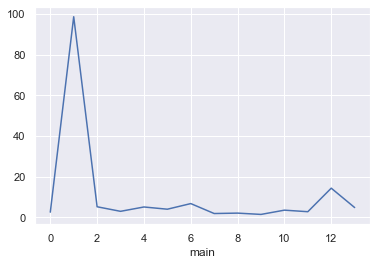

In [52]:
import seaborn as sns
sns.set()
X_train.groupby('main').target.mean().plot()

In [53]:
rf=RandomForestRegressor()

In [47]:
rf.fit(X_train,y)

RandomForestRegressor()

In [49]:
rf.feature_importances_*100

array([15.01853641, 23.64953681,  6.99609383, 40.79382768,  2.30087995,
        1.85840136,  0.7340293 ,  8.64869467])

In [51]:
from catboost import CatBoostRegressor

In [52]:
cat=CatBoostRegressor()

In [53]:
cat.fit(X_train,y)

Learning rate set to 0.12188
0:	learn: 10.7347463	total: 91.2ms	remaining: 1m 31s
1:	learn: 10.2783068	total: 114ms	remaining: 56.9s
2:	learn: 9.8759142	total: 135ms	remaining: 44.7s
3:	learn: 9.5346747	total: 156ms	remaining: 39s
4:	learn: 9.2693529	total: 177ms	remaining: 35.1s
5:	learn: 9.0520688	total: 199ms	remaining: 33s
6:	learn: 8.8751697	total: 220ms	remaining: 31.2s
7:	learn: 8.7557772	total: 244ms	remaining: 30.2s
8:	learn: 8.6635000	total: 264ms	remaining: 29s
9:	learn: 8.5665736	total: 284ms	remaining: 28.1s
10:	learn: 8.4549283	total: 303ms	remaining: 27.2s
11:	learn: 8.3427642	total: 324ms	remaining: 26.6s
12:	learn: 8.2722834	total: 342ms	remaining: 26s
13:	learn: 8.2195449	total: 360ms	remaining: 25.4s
14:	learn: 8.1648542	total: 381ms	remaining: 25s
15:	learn: 8.0976832	total: 404ms	remaining: 24.9s
16:	learn: 8.0660780	total: 425ms	remaining: 24.6s
17:	learn: 8.0237982	total: 447ms	remaining: 24.4s
18:	learn: 7.9938410	total: 466ms	remaining: 24s
19:	learn: 7.9602902

167:	learn: 6.1127419	total: 3.79s	remaining: 18.8s
168:	learn: 6.1093515	total: 3.82s	remaining: 18.8s
169:	learn: 6.0989084	total: 3.84s	remaining: 18.8s
170:	learn: 6.0945488	total: 3.87s	remaining: 18.7s
171:	learn: 6.0862245	total: 3.89s	remaining: 18.7s
172:	learn: 6.0835562	total: 3.91s	remaining: 18.7s
173:	learn: 6.0751580	total: 3.94s	remaining: 18.7s
174:	learn: 6.0688871	total: 3.96s	remaining: 18.7s
175:	learn: 6.0515706	total: 3.99s	remaining: 18.7s
176:	learn: 6.0498968	total: 4.01s	remaining: 18.6s
177:	learn: 6.0410414	total: 4.03s	remaining: 18.6s
178:	learn: 6.0271107	total: 4.05s	remaining: 18.6s
179:	learn: 6.0213706	total: 4.08s	remaining: 18.6s
180:	learn: 6.0159321	total: 4.1s	remaining: 18.5s
181:	learn: 6.0114375	total: 4.12s	remaining: 18.5s
182:	learn: 5.9983562	total: 4.14s	remaining: 18.5s
183:	learn: 5.9970631	total: 4.16s	remaining: 18.5s
184:	learn: 5.9866681	total: 4.18s	remaining: 18.4s
185:	learn: 5.9857101	total: 4.21s	remaining: 18.4s
186:	learn: 5

328:	learn: 5.4730459	total: 7.42s	remaining: 15.1s
329:	learn: 5.4725027	total: 7.44s	remaining: 15.1s
330:	learn: 5.4688232	total: 7.46s	remaining: 15.1s
331:	learn: 5.4680084	total: 7.48s	remaining: 15s
332:	learn: 5.4626618	total: 7.5s	remaining: 15s
333:	learn: 5.4502763	total: 7.52s	remaining: 15s
334:	learn: 5.4479277	total: 7.54s	remaining: 15s
335:	learn: 5.4471935	total: 7.56s	remaining: 14.9s
336:	learn: 5.4461035	total: 7.58s	remaining: 14.9s
337:	learn: 5.4451401	total: 7.6s	remaining: 14.9s
338:	learn: 5.4430711	total: 7.62s	remaining: 14.9s
339:	learn: 5.4420553	total: 7.64s	remaining: 14.8s
340:	learn: 5.4409534	total: 7.67s	remaining: 14.8s
341:	learn: 5.4364516	total: 7.69s	remaining: 14.8s
342:	learn: 5.4346777	total: 7.71s	remaining: 14.8s
343:	learn: 5.4326063	total: 7.73s	remaining: 14.7s
344:	learn: 5.4313224	total: 7.75s	remaining: 14.7s
345:	learn: 5.4287011	total: 7.77s	remaining: 14.7s
346:	learn: 5.4260282	total: 7.79s	remaining: 14.7s
347:	learn: 5.4216968	

496:	learn: 5.1640726	total: 11.2s	remaining: 11.4s
497:	learn: 5.1630961	total: 11.3s	remaining: 11.3s
498:	learn: 5.1626838	total: 11.3s	remaining: 11.3s
499:	learn: 5.1623411	total: 11.3s	remaining: 11.3s
500:	learn: 5.1617463	total: 11.3s	remaining: 11.3s
501:	learn: 5.1610822	total: 11.3s	remaining: 11.2s
502:	learn: 5.1588191	total: 11.4s	remaining: 11.2s
503:	learn: 5.1565458	total: 11.4s	remaining: 11.2s
504:	learn: 5.1562369	total: 11.4s	remaining: 11.2s
505:	learn: 5.1499695	total: 11.4s	remaining: 11.2s
506:	learn: 5.1487434	total: 11.5s	remaining: 11.1s
507:	learn: 5.1481922	total: 11.5s	remaining: 11.1s
508:	learn: 5.1474310	total: 11.5s	remaining: 11.1s
509:	learn: 5.1469806	total: 11.5s	remaining: 11.1s
510:	learn: 5.1454218	total: 11.6s	remaining: 11.1s
511:	learn: 5.1446193	total: 11.6s	remaining: 11s
512:	learn: 5.1441028	total: 11.6s	remaining: 11s
513:	learn: 5.1437823	total: 11.6s	remaining: 11s
514:	learn: 5.1404954	total: 11.6s	remaining: 11s
515:	learn: 5.139885

662:	learn: 4.9802261	total: 14.8s	remaining: 7.55s
663:	learn: 4.9740104	total: 14.9s	remaining: 7.53s
664:	learn: 4.9733780	total: 14.9s	remaining: 7.5s
665:	learn: 4.9701858	total: 14.9s	remaining: 7.48s
666:	learn: 4.9700100	total: 15s	remaining: 7.46s
667:	learn: 4.9681658	total: 15s	remaining: 7.44s
668:	learn: 4.9671749	total: 15s	remaining: 7.42s
669:	learn: 4.9665378	total: 15s	remaining: 7.4s
670:	learn: 4.9630790	total: 15.1s	remaining: 7.38s
671:	learn: 4.9613601	total: 15.1s	remaining: 7.36s
672:	learn: 4.9608413	total: 15.1s	remaining: 7.34s
673:	learn: 4.9606728	total: 15.1s	remaining: 7.32s
674:	learn: 4.9598817	total: 15.2s	remaining: 7.3s
675:	learn: 4.9596208	total: 15.2s	remaining: 7.28s
676:	learn: 4.9586806	total: 15.2s	remaining: 7.25s
677:	learn: 4.9577636	total: 15.2s	remaining: 7.23s
678:	learn: 4.9567060	total: 15.3s	remaining: 7.21s
679:	learn: 4.9542573	total: 15.3s	remaining: 7.19s
680:	learn: 4.9534011	total: 15.3s	remaining: 7.17s
681:	learn: 4.9522994	t

823:	learn: 4.8073296	total: 18.5s	remaining: 3.95s
824:	learn: 4.8071188	total: 18.5s	remaining: 3.93s
825:	learn: 4.8068076	total: 18.5s	remaining: 3.91s
826:	learn: 4.7959164	total: 18.6s	remaining: 3.88s
827:	learn: 4.7864017	total: 18.6s	remaining: 3.86s
828:	learn: 4.7861529	total: 18.6s	remaining: 3.84s
829:	learn: 4.7857198	total: 18.6s	remaining: 3.82s
830:	learn: 4.7832568	total: 18.7s	remaining: 3.79s
831:	learn: 4.7824363	total: 18.7s	remaining: 3.77s
832:	learn: 4.7806809	total: 18.7s	remaining: 3.75s
833:	learn: 4.7803866	total: 18.7s	remaining: 3.73s
834:	learn: 4.7800714	total: 18.7s	remaining: 3.7s
835:	learn: 4.7795569	total: 18.8s	remaining: 3.68s
836:	learn: 4.7792664	total: 18.8s	remaining: 3.66s
837:	learn: 4.7788221	total: 18.8s	remaining: 3.64s
838:	learn: 4.7786536	total: 18.8s	remaining: 3.61s
839:	learn: 4.7779663	total: 18.9s	remaining: 3.59s
840:	learn: 4.7681844	total: 18.9s	remaining: 3.57s
841:	learn: 4.7679130	total: 18.9s	remaining: 3.55s
842:	learn: 4

984:	learn: 4.6580211	total: 21.9s	remaining: 334ms
985:	learn: 4.6571410	total: 22s	remaining: 312ms
986:	learn: 4.6562035	total: 22s	remaining: 290ms
987:	learn: 4.6559946	total: 22s	remaining: 267ms
988:	learn: 4.6555771	total: 22s	remaining: 245ms
989:	learn: 4.6537421	total: 22s	remaining: 223ms
990:	learn: 4.6531793	total: 22.1s	remaining: 200ms
991:	learn: 4.6526852	total: 22.1s	remaining: 178ms
992:	learn: 4.6520712	total: 22.1s	remaining: 156ms
993:	learn: 4.6516413	total: 22.1s	remaining: 134ms
994:	learn: 4.6512167	total: 22.2s	remaining: 111ms
995:	learn: 4.6503609	total: 22.2s	remaining: 89.1ms
996:	learn: 4.6463568	total: 22.2s	remaining: 66.8ms
997:	learn: 4.6460094	total: 22.2s	remaining: 44.5ms
998:	learn: 4.6444269	total: 22.2s	remaining: 22.3ms
999:	learn: 4.6439987	total: 22.3s	remaining: 0us


In [55]:
cat.feature_importances_

array([ 8.71848526, 19.48396023,  8.98114287, 43.2408596 ,  1.1350962 ,
        8.04867217,  2.34426111,  8.04752255])

In [56]:
cat.score(X_train,y)

0.8307897708420489

In [50]:
from lightgbm import LGBMRegressor

In [60]:
cross_val_score(cat,X_train,y,cv=5,scoring='neg_root_mean_squared_error')

Learning rate set to 0.117134
0:	learn: 9.8243838	total: 26.6ms	remaining: 26.6s
1:	learn: 9.4337789	total: 44.2ms	remaining: 22.1s
2:	learn: 9.1249691	total: 61.3ms	remaining: 20.4s
3:	learn: 8.8531354	total: 78.5ms	remaining: 19.5s
4:	learn: 8.6420626	total: 93.7ms	remaining: 18.6s
5:	learn: 8.4479059	total: 110ms	remaining: 18.3s
6:	learn: 8.2986268	total: 127ms	remaining: 18s
7:	learn: 8.1875920	total: 143ms	remaining: 17.7s
8:	learn: 8.0826477	total: 159ms	remaining: 17.5s
9:	learn: 7.9946906	total: 174ms	remaining: 17.2s
10:	learn: 7.9390173	total: 191ms	remaining: 17.2s
11:	learn: 7.8798085	total: 211ms	remaining: 17.4s
12:	learn: 7.8175337	total: 230ms	remaining: 17.4s
13:	learn: 7.7855291	total: 248ms	remaining: 17.5s
14:	learn: 7.7360399	total: 266ms	remaining: 17.5s
15:	learn: 7.6926376	total: 283ms	remaining: 17.4s
16:	learn: 7.6702298	total: 297ms	remaining: 17.2s
17:	learn: 7.6490391	total: 313ms	remaining: 17s
18:	learn: 7.6325232	total: 327ms	remaining: 16.9s
19:	learn:

169:	learn: 5.8459322	total: 2.91s	remaining: 14.2s
170:	learn: 5.8434528	total: 2.93s	remaining: 14.2s
171:	learn: 5.8406197	total: 2.95s	remaining: 14.2s
172:	learn: 5.8376953	total: 2.97s	remaining: 14.2s
173:	learn: 5.8337412	total: 2.98s	remaining: 14.2s
174:	learn: 5.8286854	total: 3s	remaining: 14.1s
175:	learn: 5.8236002	total: 3.02s	remaining: 14.1s
176:	learn: 5.8226907	total: 3.04s	remaining: 14.1s
177:	learn: 5.8187582	total: 3.06s	remaining: 14.1s
178:	learn: 5.8160579	total: 3.07s	remaining: 14.1s
179:	learn: 5.8136064	total: 3.08s	remaining: 14.1s
180:	learn: 5.8040558	total: 3.1s	remaining: 14s
181:	learn: 5.7982231	total: 3.12s	remaining: 14s
182:	learn: 5.7961102	total: 3.14s	remaining: 14s
183:	learn: 5.7939266	total: 3.16s	remaining: 14s
184:	learn: 5.7925681	total: 3.17s	remaining: 14s
185:	learn: 5.7880768	total: 3.19s	remaining: 14s
186:	learn: 5.7684471	total: 3.21s	remaining: 13.9s
187:	learn: 5.7602936	total: 3.22s	remaining: 13.9s
188:	learn: 5.7570086	total:

328:	learn: 5.1588431	total: 5.62s	remaining: 11.5s
329:	learn: 5.1584236	total: 5.63s	remaining: 11.4s
330:	learn: 5.1552563	total: 5.65s	remaining: 11.4s
331:	learn: 5.1544422	total: 5.67s	remaining: 11.4s
332:	learn: 5.1538414	total: 5.69s	remaining: 11.4s
333:	learn: 5.1510155	total: 5.7s	remaining: 11.4s
334:	learn: 5.1499773	total: 5.72s	remaining: 11.4s
335:	learn: 5.1491225	total: 5.74s	remaining: 11.3s
336:	learn: 5.1485526	total: 5.76s	remaining: 11.3s
337:	learn: 5.1474853	total: 5.77s	remaining: 11.3s
338:	learn: 5.1466721	total: 5.79s	remaining: 11.3s
339:	learn: 5.1412104	total: 5.81s	remaining: 11.3s
340:	learn: 5.1385082	total: 5.83s	remaining: 11.3s
341:	learn: 5.1378202	total: 5.84s	remaining: 11.2s
342:	learn: 5.1361515	total: 5.86s	remaining: 11.2s
343:	learn: 5.1303755	total: 5.88s	remaining: 11.2s
344:	learn: 5.1297289	total: 5.9s	remaining: 11.2s
345:	learn: 5.1273191	total: 5.92s	remaining: 11.2s
346:	learn: 5.1267206	total: 5.93s	remaining: 11.2s
347:	learn: 5.

497:	learn: 4.7945377	total: 8.51s	remaining: 8.57s
498:	learn: 4.7942323	total: 8.52s	remaining: 8.56s
499:	learn: 4.7928810	total: 8.54s	remaining: 8.54s
500:	learn: 4.7922465	total: 8.56s	remaining: 8.52s
501:	learn: 4.7914259	total: 8.58s	remaining: 8.51s
502:	learn: 4.7908009	total: 8.59s	remaining: 8.49s
503:	learn: 4.7900405	total: 8.61s	remaining: 8.47s
504:	learn: 4.7887528	total: 8.62s	remaining: 8.45s
505:	learn: 4.7881783	total: 8.64s	remaining: 8.44s
506:	learn: 4.7871717	total: 8.66s	remaining: 8.42s
507:	learn: 4.7865415	total: 8.68s	remaining: 8.4s
508:	learn: 4.7857036	total: 8.69s	remaining: 8.38s
509:	learn: 4.7848067	total: 8.71s	remaining: 8.37s
510:	learn: 4.7837499	total: 8.73s	remaining: 8.35s
511:	learn: 4.7721298	total: 8.75s	remaining: 8.34s
512:	learn: 4.7716332	total: 8.76s	remaining: 8.32s
513:	learn: 4.7661475	total: 8.78s	remaining: 8.3s
514:	learn: 4.7646551	total: 8.8s	remaining: 8.29s
515:	learn: 4.7642490	total: 8.81s	remaining: 8.27s
516:	learn: 4.7

666:	learn: 4.5305017	total: 11.4s	remaining: 5.71s
667:	learn: 4.5285550	total: 11.5s	remaining: 5.69s
668:	learn: 4.5274393	total: 11.5s	remaining: 5.67s
669:	learn: 4.5267661	total: 11.5s	remaining: 5.66s
670:	learn: 4.5260305	total: 11.5s	remaining: 5.64s
671:	learn: 4.5254787	total: 11.5s	remaining: 5.62s
672:	learn: 4.5248857	total: 11.5s	remaining: 5.61s
673:	learn: 4.5244675	total: 11.6s	remaining: 5.59s
674:	learn: 4.5241235	total: 11.6s	remaining: 5.57s
675:	learn: 4.5231981	total: 11.6s	remaining: 5.55s
676:	learn: 4.5228572	total: 11.6s	remaining: 5.54s
677:	learn: 4.5214845	total: 11.6s	remaining: 5.52s
678:	learn: 4.5211862	total: 11.6s	remaining: 5.5s
679:	learn: 4.5203163	total: 11.7s	remaining: 5.49s
680:	learn: 4.5197449	total: 11.7s	remaining: 5.47s
681:	learn: 4.5141650	total: 11.7s	remaining: 5.45s
682:	learn: 4.5124657	total: 11.7s	remaining: 5.44s
683:	learn: 4.5120099	total: 11.7s	remaining: 5.42s
684:	learn: 4.5108024	total: 11.7s	remaining: 5.4s
685:	learn: 4.

835:	learn: 4.3738684	total: 14.3s	remaining: 2.81s
836:	learn: 4.3735687	total: 14.4s	remaining: 2.8s
837:	learn: 4.3722623	total: 14.4s	remaining: 2.78s
838:	learn: 4.3720296	total: 14.4s	remaining: 2.76s
839:	learn: 4.3649031	total: 14.4s	remaining: 2.75s
840:	learn: 4.3642839	total: 14.4s	remaining: 2.73s
841:	learn: 4.3637055	total: 14.4s	remaining: 2.71s
842:	learn: 4.3635476	total: 14.5s	remaining: 2.69s
843:	learn: 4.3621782	total: 14.5s	remaining: 2.68s
844:	learn: 4.3614282	total: 14.5s	remaining: 2.66s
845:	learn: 4.3611688	total: 14.5s	remaining: 2.64s
846:	learn: 4.3582010	total: 14.5s	remaining: 2.62s
847:	learn: 4.3577694	total: 14.5s	remaining: 2.61s
848:	learn: 4.3574844	total: 14.6s	remaining: 2.59s
849:	learn: 4.3537239	total: 14.6s	remaining: 2.57s
850:	learn: 4.3534249	total: 14.6s	remaining: 2.56s
851:	learn: 4.3476867	total: 14.6s	remaining: 2.54s
852:	learn: 4.3468715	total: 14.6s	remaining: 2.52s
853:	learn: 4.3461847	total: 14.7s	remaining: 2.5s
854:	learn: 4.

Learning rate set to 0.117134
0:	learn: 10.8862591	total: 22.7ms	remaining: 22.6s
1:	learn: 10.4363655	total: 39.7ms	remaining: 19.8s
2:	learn: 10.0932342	total: 57.5ms	remaining: 19.1s
3:	learn: 9.7817790	total: 74.2ms	remaining: 18.5s
4:	learn: 9.5316015	total: 90.7ms	remaining: 18s
5:	learn: 9.3334055	total: 107ms	remaining: 17.8s
6:	learn: 9.1557221	total: 123ms	remaining: 17.4s
7:	learn: 9.0359822	total: 139ms	remaining: 17.2s
8:	learn: 8.9126736	total: 155ms	remaining: 17.1s
9:	learn: 8.8066538	total: 171ms	remaining: 16.9s
10:	learn: 8.7138149	total: 187ms	remaining: 16.8s
11:	learn: 8.6313947	total: 204ms	remaining: 16.8s
12:	learn: 8.5624607	total: 224ms	remaining: 17s
13:	learn: 8.5143381	total: 239ms	remaining: 16.9s
14:	learn: 8.4298613	total: 257ms	remaining: 16.9s
15:	learn: 8.3923069	total: 273ms	remaining: 16.8s
16:	learn: 8.3424831	total: 289ms	remaining: 16.7s
17:	learn: 8.2928283	total: 306ms	remaining: 16.7s
18:	learn: 8.2492975	total: 321ms	remaining: 16.6s
19:	lea

168:	learn: 6.2329335	total: 2.9s	remaining: 14.3s
169:	learn: 6.2324349	total: 2.92s	remaining: 14.3s
170:	learn: 6.2233272	total: 2.94s	remaining: 14.3s
171:	learn: 6.2222092	total: 2.96s	remaining: 14.2s
172:	learn: 6.1970489	total: 2.98s	remaining: 14.2s
173:	learn: 6.1933674	total: 2.99s	remaining: 14.2s
174:	learn: 6.1905418	total: 3.01s	remaining: 14.2s
175:	learn: 6.1856639	total: 3.02s	remaining: 14.2s
176:	learn: 6.1816837	total: 3.04s	remaining: 14.1s
177:	learn: 6.1799985	total: 3.06s	remaining: 14.1s
178:	learn: 6.1711195	total: 3.07s	remaining: 14.1s
179:	learn: 6.1682829	total: 3.09s	remaining: 14.1s
180:	learn: 6.1634393	total: 3.11s	remaining: 14.1s
181:	learn: 6.1532467	total: 3.12s	remaining: 14s
182:	learn: 6.1448807	total: 3.14s	remaining: 14s
183:	learn: 6.1397942	total: 3.16s	remaining: 14s
184:	learn: 6.1374962	total: 3.18s	remaining: 14s
185:	learn: 6.1360201	total: 3.19s	remaining: 14s
186:	learn: 6.1331730	total: 3.21s	remaining: 14s
187:	learn: 6.1266503	tot

335:	learn: 5.5539335	total: 5.83s	remaining: 11.5s
336:	learn: 5.5489324	total: 5.85s	remaining: 11.5s
337:	learn: 5.5465486	total: 5.87s	remaining: 11.5s
338:	learn: 5.5454200	total: 5.89s	remaining: 11.5s
339:	learn: 5.5409372	total: 5.91s	remaining: 11.5s
340:	learn: 5.5399665	total: 5.93s	remaining: 11.5s
341:	learn: 5.5355889	total: 5.95s	remaining: 11.4s
342:	learn: 5.5349098	total: 5.96s	remaining: 11.4s
343:	learn: 5.5334231	total: 5.98s	remaining: 11.4s
344:	learn: 5.5283120	total: 6s	remaining: 11.4s
345:	learn: 5.5264489	total: 6.01s	remaining: 11.4s
346:	learn: 5.5224501	total: 6.03s	remaining: 11.3s
347:	learn: 5.5219178	total: 6.05s	remaining: 11.3s
348:	learn: 5.5214738	total: 6.07s	remaining: 11.3s
349:	learn: 5.5136467	total: 6.09s	remaining: 11.3s
350:	learn: 5.5057778	total: 6.1s	remaining: 11.3s
351:	learn: 5.5029200	total: 6.12s	remaining: 11.3s
352:	learn: 5.5023348	total: 6.14s	remaining: 11.3s
353:	learn: 5.4982639	total: 6.16s	remaining: 11.2s
354:	learn: 5.49

500:	learn: 5.2411010	total: 8.77s	remaining: 8.73s
501:	learn: 5.2401152	total: 8.79s	remaining: 8.72s
502:	learn: 5.2360691	total: 8.81s	remaining: 8.71s
503:	learn: 5.2348080	total: 8.83s	remaining: 8.69s
504:	learn: 5.2344942	total: 8.84s	remaining: 8.67s
505:	learn: 5.2340403	total: 8.86s	remaining: 8.65s
506:	learn: 5.2328152	total: 8.88s	remaining: 8.64s
507:	learn: 5.2323181	total: 8.9s	remaining: 8.62s
508:	learn: 5.2298944	total: 8.93s	remaining: 8.61s
509:	learn: 5.2274012	total: 8.95s	remaining: 8.59s
510:	learn: 5.2237762	total: 8.96s	remaining: 8.58s
511:	learn: 5.2222270	total: 8.98s	remaining: 8.56s
512:	learn: 5.2218943	total: 9.01s	remaining: 8.55s
513:	learn: 5.2211107	total: 9.03s	remaining: 8.53s
514:	learn: 5.2146254	total: 9.04s	remaining: 8.52s
515:	learn: 5.2140388	total: 9.06s	remaining: 8.5s
516:	learn: 5.2104857	total: 9.09s	remaining: 8.49s
517:	learn: 5.2098140	total: 9.1s	remaining: 8.47s
518:	learn: 5.2091335	total: 9.12s	remaining: 8.45s
519:	learn: 5.2

661:	learn: 5.0171649	total: 11.7s	remaining: 5.99s
662:	learn: 5.0158362	total: 11.8s	remaining: 5.97s
663:	learn: 5.0137393	total: 11.8s	remaining: 5.96s
664:	learn: 5.0131640	total: 11.8s	remaining: 5.94s
665:	learn: 5.0111355	total: 11.8s	remaining: 5.92s
666:	learn: 5.0102234	total: 11.8s	remaining: 5.9s
667:	learn: 5.0081994	total: 11.8s	remaining: 5.88s
668:	learn: 5.0074053	total: 11.9s	remaining: 5.87s
669:	learn: 5.0068777	total: 11.9s	remaining: 5.85s
670:	learn: 5.0066113	total: 11.9s	remaining: 5.83s
671:	learn: 5.0004430	total: 11.9s	remaining: 5.81s
672:	learn: 4.9997208	total: 11.9s	remaining: 5.79s
673:	learn: 4.9958543	total: 11.9s	remaining: 5.78s
674:	learn: 4.9950875	total: 12s	remaining: 5.76s
675:	learn: 4.9947335	total: 12s	remaining: 5.74s
676:	learn: 4.9940855	total: 12s	remaining: 5.72s
677:	learn: 4.9936323	total: 12s	remaining: 5.7s
678:	learn: 4.9917332	total: 12s	remaining: 5.69s
679:	learn: 4.9911366	total: 12s	remaining: 5.67s
680:	learn: 4.9908800	tota

823:	learn: 4.8291798	total: 14.7s	remaining: 3.13s
824:	learn: 4.8282079	total: 14.7s	remaining: 3.11s
825:	learn: 4.8275581	total: 14.7s	remaining: 3.09s
826:	learn: 4.8270012	total: 14.7s	remaining: 3.08s
827:	learn: 4.8265919	total: 14.7s	remaining: 3.06s
828:	learn: 4.8263715	total: 14.7s	remaining: 3.04s
829:	learn: 4.8250016	total: 14.8s	remaining: 3.02s
830:	learn: 4.8243316	total: 14.8s	remaining: 3s
831:	learn: 4.8216608	total: 14.8s	remaining: 2.99s
832:	learn: 4.8207255	total: 14.8s	remaining: 2.97s
833:	learn: 4.8184591	total: 14.8s	remaining: 2.95s
834:	learn: 4.8180717	total: 14.8s	remaining: 2.93s
835:	learn: 4.8150965	total: 14.9s	remaining: 2.92s
836:	learn: 4.8140107	total: 14.9s	remaining: 2.9s
837:	learn: 4.8138076	total: 14.9s	remaining: 2.88s
838:	learn: 4.8124310	total: 14.9s	remaining: 2.86s
839:	learn: 4.8118713	total: 14.9s	remaining: 2.84s
840:	learn: 4.8115950	total: 14.9s	remaining: 2.83s
841:	learn: 4.8089497	total: 15s	remaining: 2.81s
842:	learn: 4.8087

991:	learn: 4.6737201	total: 17.6s	remaining: 142ms
992:	learn: 4.6733475	total: 17.6s	remaining: 124ms
993:	learn: 4.6726890	total: 17.6s	remaining: 106ms
994:	learn: 4.6718549	total: 17.6s	remaining: 88.5ms
995:	learn: 4.6714856	total: 17.6s	remaining: 70.8ms
996:	learn: 4.6712422	total: 17.6s	remaining: 53.1ms
997:	learn: 4.6709185	total: 17.7s	remaining: 35.4ms
998:	learn: 4.6706094	total: 17.7s	remaining: 17.7ms
999:	learn: 4.6704505	total: 17.7s	remaining: 0us
Learning rate set to 0.117134
0:	learn: 10.5574190	total: 22.1ms	remaining: 22.1s
1:	learn: 10.1473134	total: 38.2ms	remaining: 19s
2:	learn: 9.8093749	total: 54.4ms	remaining: 18.1s
3:	learn: 9.5023629	total: 71.8ms	remaining: 17.9s
4:	learn: 9.2626198	total: 88.8ms	remaining: 17.7s
5:	learn: 9.0677733	total: 106ms	remaining: 17.5s
6:	learn: 8.9206219	total: 122ms	remaining: 17.3s
7:	learn: 8.7738104	total: 138ms	remaining: 17.2s
8:	learn: 8.6661305	total: 155ms	remaining: 17s
9:	learn: 8.5309219	total: 172ms	remaining: 17

158:	learn: 6.2603984	total: 2.68s	remaining: 14.2s
159:	learn: 6.2542408	total: 2.7s	remaining: 14.2s
160:	learn: 6.2497727	total: 2.72s	remaining: 14.2s
161:	learn: 6.2473543	total: 2.73s	remaining: 14.1s
162:	learn: 6.2441034	total: 2.75s	remaining: 14.1s
163:	learn: 6.2423635	total: 2.77s	remaining: 14.1s
164:	learn: 6.2383588	total: 2.79s	remaining: 14.1s
165:	learn: 6.2180349	total: 2.81s	remaining: 14.1s
166:	learn: 6.2134022	total: 2.82s	remaining: 14.1s
167:	learn: 6.2112812	total: 2.84s	remaining: 14.1s
168:	learn: 6.2095696	total: 2.86s	remaining: 14s
169:	learn: 6.1972986	total: 2.87s	remaining: 14s
170:	learn: 6.1951149	total: 2.89s	remaining: 14s
171:	learn: 6.1905616	total: 2.9s	remaining: 14s
172:	learn: 6.1785696	total: 2.92s	remaining: 14s
173:	learn: 6.1739133	total: 2.94s	remaining: 13.9s
174:	learn: 6.1715115	total: 2.95s	remaining: 13.9s
175:	learn: 6.1703819	total: 2.97s	remaining: 13.9s
176:	learn: 6.1690923	total: 2.99s	remaining: 13.9s
177:	learn: 6.1654671	to

327:	learn: 5.5536537	total: 5.57s	remaining: 11.4s
328:	learn: 5.5529679	total: 5.58s	remaining: 11.4s
329:	learn: 5.5510228	total: 5.6s	remaining: 11.4s
330:	learn: 5.5498187	total: 5.62s	remaining: 11.4s
331:	learn: 5.5488798	total: 5.63s	remaining: 11.3s
332:	learn: 5.5484024	total: 5.65s	remaining: 11.3s
333:	learn: 5.5471363	total: 5.67s	remaining: 11.3s
334:	learn: 5.5456023	total: 5.69s	remaining: 11.3s
335:	learn: 5.5392782	total: 5.7s	remaining: 11.3s
336:	learn: 5.5382361	total: 5.72s	remaining: 11.3s
337:	learn: 5.5371714	total: 5.74s	remaining: 11.2s
338:	learn: 5.5340793	total: 5.75s	remaining: 11.2s
339:	learn: 5.5328902	total: 5.77s	remaining: 11.2s
340:	learn: 5.5305329	total: 5.79s	remaining: 11.2s
341:	learn: 5.5250530	total: 5.8s	remaining: 11.2s
342:	learn: 5.5169566	total: 5.82s	remaining: 11.2s
343:	learn: 5.5151690	total: 5.84s	remaining: 11.1s
344:	learn: 5.5133992	total: 5.86s	remaining: 11.1s
345:	learn: 5.5122339	total: 5.87s	remaining: 11.1s
346:	learn: 5.5

491:	learn: 5.1941401	total: 8.32s	remaining: 8.59s
492:	learn: 5.1917009	total: 8.33s	remaining: 8.57s
493:	learn: 5.1912570	total: 8.35s	remaining: 8.55s
494:	learn: 5.1908451	total: 8.36s	remaining: 8.53s
495:	learn: 5.1897410	total: 8.38s	remaining: 8.52s
496:	learn: 5.1889560	total: 8.4s	remaining: 8.5s
497:	learn: 5.1882752	total: 8.41s	remaining: 8.48s
498:	learn: 5.1878925	total: 8.43s	remaining: 8.46s
499:	learn: 5.1874639	total: 8.45s	remaining: 8.45s
500:	learn: 5.1867110	total: 8.47s	remaining: 8.43s
501:	learn: 5.1862085	total: 8.48s	remaining: 8.42s
502:	learn: 5.1851061	total: 8.5s	remaining: 8.4s
503:	learn: 5.1845812	total: 8.52s	remaining: 8.38s
504:	learn: 5.1842994	total: 8.53s	remaining: 8.36s
505:	learn: 5.1817262	total: 8.55s	remaining: 8.35s
506:	learn: 5.1787333	total: 8.57s	remaining: 8.33s
507:	learn: 5.1782926	total: 8.58s	remaining: 8.31s
508:	learn: 5.1779213	total: 8.6s	remaining: 8.3s
509:	learn: 5.1770442	total: 8.62s	remaining: 8.28s
510:	learn: 5.1736

650:	learn: 4.9771018	total: 11s	remaining: 5.91s
651:	learn: 4.9763552	total: 11s	remaining: 5.89s
652:	learn: 4.9739252	total: 11.1s	remaining: 5.88s
653:	learn: 4.9734130	total: 11.1s	remaining: 5.86s
654:	learn: 4.9727880	total: 11.1s	remaining: 5.85s
655:	learn: 4.9696319	total: 11.1s	remaining: 5.83s
656:	learn: 4.9668789	total: 11.1s	remaining: 5.81s
657:	learn: 4.9664123	total: 11.2s	remaining: 5.8s
658:	learn: 4.9658130	total: 11.2s	remaining: 5.78s
659:	learn: 4.9653785	total: 11.2s	remaining: 5.76s
660:	learn: 4.9557853	total: 11.2s	remaining: 5.75s
661:	learn: 4.9552804	total: 11.2s	remaining: 5.73s
662:	learn: 4.9530120	total: 11.2s	remaining: 5.71s
663:	learn: 4.9509352	total: 11.3s	remaining: 5.69s
664:	learn: 4.9505225	total: 11.3s	remaining: 5.68s
665:	learn: 4.9492763	total: 11.3s	remaining: 5.66s
666:	learn: 4.9486057	total: 11.3s	remaining: 5.64s
667:	learn: 4.9483520	total: 11.3s	remaining: 5.63s
668:	learn: 4.9474169	total: 11.3s	remaining: 5.61s
669:	learn: 4.938

810:	learn: 4.7972474	total: 13.7s	remaining: 3.2s
811:	learn: 4.7931088	total: 13.8s	remaining: 3.19s
812:	learn: 4.7927329	total: 13.8s	remaining: 3.17s
813:	learn: 4.7919407	total: 13.8s	remaining: 3.15s
814:	learn: 4.7897658	total: 13.8s	remaining: 3.13s
815:	learn: 4.7889332	total: 13.8s	remaining: 3.12s
816:	learn: 4.7886353	total: 13.8s	remaining: 3.1s
817:	learn: 4.7883436	total: 13.9s	remaining: 3.08s
818:	learn: 4.7875420	total: 13.9s	remaining: 3.07s
819:	learn: 4.7872309	total: 13.9s	remaining: 3.05s
820:	learn: 4.7832753	total: 13.9s	remaining: 3.03s
821:	learn: 4.7822654	total: 13.9s	remaining: 3.01s
822:	learn: 4.7818765	total: 13.9s	remaining: 3s
823:	learn: 4.7813065	total: 14s	remaining: 2.98s
824:	learn: 4.7811121	total: 14s	remaining: 2.96s
825:	learn: 4.7792760	total: 14s	remaining: 2.95s
826:	learn: 4.7789580	total: 14s	remaining: 2.93s
827:	learn: 4.7787237	total: 14s	remaining: 2.91s
828:	learn: 4.7783240	total: 14s	remaining: 2.9s
829:	learn: 4.7771977	total: 1

973:	learn: 4.6693900	total: 16.5s	remaining: 440ms
974:	learn: 4.6653574	total: 16.5s	remaining: 423ms
975:	learn: 4.6652594	total: 16.5s	remaining: 406ms
976:	learn: 4.6650801	total: 16.5s	remaining: 389ms
977:	learn: 4.6622369	total: 16.5s	remaining: 372ms
978:	learn: 4.6606783	total: 16.6s	remaining: 355ms
979:	learn: 4.6603964	total: 16.6s	remaining: 338ms
980:	learn: 4.6600562	total: 16.6s	remaining: 321ms
981:	learn: 4.6591808	total: 16.6s	remaining: 304ms
982:	learn: 4.6585733	total: 16.6s	remaining: 287ms
983:	learn: 4.6555333	total: 16.6s	remaining: 271ms
984:	learn: 4.6524133	total: 16.7s	remaining: 254ms
985:	learn: 4.6521341	total: 16.7s	remaining: 237ms
986:	learn: 4.6518062	total: 16.7s	remaining: 220ms
987:	learn: 4.6512451	total: 16.7s	remaining: 203ms
988:	learn: 4.6506323	total: 16.7s	remaining: 186ms
989:	learn: 4.6502523	total: 16.7s	remaining: 169ms
990:	learn: 4.6498298	total: 16.8s	remaining: 152ms
991:	learn: 4.6496513	total: 16.8s	remaining: 135ms
992:	learn: 

145:	learn: 6.2272511	total: 2.4s	remaining: 14s
146:	learn: 6.2258372	total: 2.42s	remaining: 14s
147:	learn: 6.2230814	total: 2.43s	remaining: 14s
148:	learn: 6.2189601	total: 2.45s	remaining: 14s
149:	learn: 6.1974709	total: 2.47s	remaining: 14s
150:	learn: 6.1957525	total: 2.48s	remaining: 14s
151:	learn: 6.1797010	total: 2.5s	remaining: 13.9s
152:	learn: 6.1637129	total: 2.52s	remaining: 13.9s
153:	learn: 6.1414776	total: 2.53s	remaining: 13.9s
154:	learn: 6.1231684	total: 2.55s	remaining: 13.9s
155:	learn: 6.1215892	total: 2.57s	remaining: 13.9s
156:	learn: 6.1005631	total: 2.58s	remaining: 13.9s
157:	learn: 6.0926390	total: 2.6s	remaining: 13.9s
158:	learn: 6.0908301	total: 2.62s	remaining: 13.8s
159:	learn: 6.0851235	total: 2.63s	remaining: 13.8s
160:	learn: 6.0836485	total: 2.65s	remaining: 13.8s
161:	learn: 6.0712097	total: 2.67s	remaining: 13.8s
162:	learn: 6.0663171	total: 2.68s	remaining: 13.8s
163:	learn: 6.0647544	total: 2.7s	remaining: 13.8s
164:	learn: 6.0603139	total:

309:	learn: 5.4067720	total: 5.12s	remaining: 11.4s
310:	learn: 5.4032233	total: 5.13s	remaining: 11.4s
311:	learn: 5.4022514	total: 5.15s	remaining: 11.4s
312:	learn: 5.3994312	total: 5.17s	remaining: 11.3s
313:	learn: 5.3973599	total: 5.18s	remaining: 11.3s
314:	learn: 5.3948484	total: 5.2s	remaining: 11.3s
315:	learn: 5.3916827	total: 5.21s	remaining: 11.3s
316:	learn: 5.3904520	total: 5.23s	remaining: 11.3s
317:	learn: 5.3882034	total: 5.25s	remaining: 11.3s
318:	learn: 5.3868493	total: 5.26s	remaining: 11.2s
319:	learn: 5.3860004	total: 5.28s	remaining: 11.2s
320:	learn: 5.3813366	total: 5.3s	remaining: 11.2s
321:	learn: 5.3798567	total: 5.32s	remaining: 11.2s
322:	learn: 5.3791253	total: 5.33s	remaining: 11.2s
323:	learn: 5.3687221	total: 5.35s	remaining: 11.2s
324:	learn: 5.3656035	total: 5.37s	remaining: 11.1s
325:	learn: 5.3628059	total: 5.38s	remaining: 11.1s
326:	learn: 5.3597868	total: 5.4s	remaining: 11.1s
327:	learn: 5.3543615	total: 5.41s	remaining: 11.1s
328:	learn: 5.3

470:	learn: 5.0234055	total: 7.82s	remaining: 8.79s
471:	learn: 5.0216633	total: 7.84s	remaining: 8.77s
472:	learn: 5.0209836	total: 7.85s	remaining: 8.75s
473:	learn: 5.0204745	total: 7.87s	remaining: 8.73s
474:	learn: 5.0179731	total: 7.89s	remaining: 8.72s
475:	learn: 5.0176553	total: 7.91s	remaining: 8.71s
476:	learn: 5.0165028	total: 7.92s	remaining: 8.69s
477:	learn: 5.0159368	total: 7.94s	remaining: 8.67s
478:	learn: 5.0154489	total: 7.96s	remaining: 8.66s
479:	learn: 5.0147273	total: 7.98s	remaining: 8.64s
480:	learn: 5.0137864	total: 7.99s	remaining: 8.63s
481:	learn: 5.0125901	total: 8.01s	remaining: 8.61s
482:	learn: 5.0118856	total: 8.03s	remaining: 8.59s
483:	learn: 5.0108253	total: 8.04s	remaining: 8.57s
484:	learn: 5.0092734	total: 8.06s	remaining: 8.56s
485:	learn: 5.0085170	total: 8.07s	remaining: 8.54s
486:	learn: 5.0069572	total: 8.09s	remaining: 8.52s
487:	learn: 5.0063664	total: 8.1s	remaining: 8.5s
488:	learn: 5.0044429	total: 8.12s	remaining: 8.48s
489:	learn: 5.

631:	learn: 4.7897878	total: 10.5s	remaining: 6.13s
632:	learn: 4.7765494	total: 10.6s	remaining: 6.12s
633:	learn: 4.7762096	total: 10.6s	remaining: 6.1s
634:	learn: 4.7754521	total: 10.6s	remaining: 6.09s
635:	learn: 4.7738646	total: 10.6s	remaining: 6.07s
636:	learn: 4.7736269	total: 10.6s	remaining: 6.05s
637:	learn: 4.7720932	total: 10.6s	remaining: 6.04s
638:	learn: 4.7710254	total: 10.7s	remaining: 6.02s
639:	learn: 4.7702969	total: 10.7s	remaining: 6s
640:	learn: 4.7698779	total: 10.7s	remaining: 5.99s
641:	learn: 4.7696244	total: 10.7s	remaining: 5.97s
642:	learn: 4.7675754	total: 10.7s	remaining: 5.95s
643:	learn: 4.7666278	total: 10.7s	remaining: 5.94s
644:	learn: 4.7649883	total: 10.8s	remaining: 5.92s
645:	learn: 4.7646992	total: 10.8s	remaining: 5.9s
646:	learn: 4.7639130	total: 10.8s	remaining: 5.88s
647:	learn: 4.7628777	total: 10.8s	remaining: 5.87s
648:	learn: 4.7624966	total: 10.8s	remaining: 5.85s
649:	learn: 4.7620441	total: 10.8s	remaining: 5.83s
650:	learn: 4.761

791:	learn: 4.5936774	total: 13.2s	remaining: 3.48s
792:	learn: 4.5933673	total: 13.3s	remaining: 3.46s
793:	learn: 4.5923308	total: 13.3s	remaining: 3.45s
794:	learn: 4.5921174	total: 13.3s	remaining: 3.43s
795:	learn: 4.5845399	total: 13.3s	remaining: 3.41s
796:	learn: 4.5844231	total: 13.3s	remaining: 3.4s
797:	learn: 4.5827916	total: 13.3s	remaining: 3.38s
798:	learn: 4.5824942	total: 13.4s	remaining: 3.36s
799:	learn: 4.5821586	total: 13.4s	remaining: 3.35s
800:	learn: 4.5815811	total: 13.4s	remaining: 3.33s
801:	learn: 4.5769097	total: 13.4s	remaining: 3.31s
802:	learn: 4.5761953	total: 13.4s	remaining: 3.3s
803:	learn: 4.5746347	total: 13.5s	remaining: 3.28s
804:	learn: 4.5723103	total: 13.5s	remaining: 3.26s
805:	learn: 4.5693356	total: 13.5s	remaining: 3.25s
806:	learn: 4.5690056	total: 13.5s	remaining: 3.23s
807:	learn: 4.5684569	total: 13.5s	remaining: 3.21s
808:	learn: 4.5658624	total: 13.5s	remaining: 3.2s
809:	learn: 4.5656955	total: 13.6s	remaining: 3.18s
810:	learn: 4.5

955:	learn: 4.4342722	total: 16s	remaining: 735ms
956:	learn: 4.4339017	total: 16s	remaining: 719ms
957:	learn: 4.4335937	total: 16s	remaining: 702ms
958:	learn: 4.4324263	total: 16s	remaining: 685ms
959:	learn: 4.4314922	total: 16s	remaining: 668ms
960:	learn: 4.4311383	total: 16.1s	remaining: 652ms
961:	learn: 4.4304564	total: 16.1s	remaining: 635ms
962:	learn: 4.4296108	total: 16.1s	remaining: 618ms
963:	learn: 4.4291424	total: 16.1s	remaining: 601ms
964:	learn: 4.4284621	total: 16.1s	remaining: 585ms
965:	learn: 4.4276305	total: 16.1s	remaining: 568ms
966:	learn: 4.4270039	total: 16.2s	remaining: 551ms
967:	learn: 4.4263088	total: 16.2s	remaining: 535ms
968:	learn: 4.4251798	total: 16.2s	remaining: 518ms
969:	learn: 4.4249068	total: 16.2s	remaining: 501ms
970:	learn: 4.4234215	total: 16.2s	remaining: 485ms
971:	learn: 4.4231886	total: 16.2s	remaining: 468ms
972:	learn: 4.4225189	total: 16.3s	remaining: 451ms
973:	learn: 4.4221517	total: 16.3s	remaining: 435ms
974:	learn: 4.4217284	

115:	learn: 6.5700065	total: 1.91s	remaining: 14.5s
116:	learn: 6.5657476	total: 1.92s	remaining: 14.5s
117:	learn: 6.5594792	total: 1.94s	remaining: 14.5s
118:	learn: 6.5412158	total: 1.96s	remaining: 14.5s
119:	learn: 6.5323176	total: 1.98s	remaining: 14.5s
120:	learn: 6.5269206	total: 1.99s	remaining: 14.5s
121:	learn: 6.5243733	total: 2.01s	remaining: 14.5s
122:	learn: 6.5216182	total: 2.03s	remaining: 14.5s
123:	learn: 6.5142105	total: 2.04s	remaining: 14.4s
124:	learn: 6.5099969	total: 2.06s	remaining: 14.4s
125:	learn: 6.5061323	total: 2.08s	remaining: 14.4s
126:	learn: 6.4984354	total: 2.09s	remaining: 14.4s
127:	learn: 6.4949196	total: 2.1s	remaining: 14.3s
128:	learn: 6.4914559	total: 2.12s	remaining: 14.3s
129:	learn: 6.4882346	total: 2.14s	remaining: 14.3s
130:	learn: 6.4781886	total: 2.15s	remaining: 14.3s
131:	learn: 6.4766353	total: 2.17s	remaining: 14.3s
132:	learn: 6.4724700	total: 2.19s	remaining: 14.3s
133:	learn: 6.4695676	total: 2.2s	remaining: 14.2s
134:	learn: 6.

282:	learn: 5.8140495	total: 4.65s	remaining: 11.8s
283:	learn: 5.8106910	total: 4.67s	remaining: 11.8s
284:	learn: 5.8082645	total: 4.69s	remaining: 11.8s
285:	learn: 5.8074158	total: 4.7s	remaining: 11.7s
286:	learn: 5.8057201	total: 4.72s	remaining: 11.7s
287:	learn: 5.8048270	total: 4.74s	remaining: 11.7s
288:	learn: 5.8037630	total: 4.75s	remaining: 11.7s
289:	learn: 5.8008585	total: 4.77s	remaining: 11.7s
290:	learn: 5.7997753	total: 4.79s	remaining: 11.7s
291:	learn: 5.7907680	total: 4.8s	remaining: 11.6s
292:	learn: 5.7899816	total: 4.82s	remaining: 11.6s
293:	learn: 5.7887762	total: 4.84s	remaining: 11.6s
294:	learn: 5.7831507	total: 4.85s	remaining: 11.6s
295:	learn: 5.7803867	total: 4.87s	remaining: 11.6s
296:	learn: 5.7755747	total: 4.89s	remaining: 11.6s
297:	learn: 5.7738300	total: 4.9s	remaining: 11.6s
298:	learn: 5.7664813	total: 4.92s	remaining: 11.5s
299:	learn: 5.7638642	total: 4.94s	remaining: 11.5s
300:	learn: 5.7622833	total: 4.96s	remaining: 11.5s
301:	learn: 5.7

444:	learn: 5.4394790	total: 7.37s	remaining: 9.19s
445:	learn: 5.4386776	total: 7.38s	remaining: 9.17s
446:	learn: 5.4308311	total: 7.4s	remaining: 9.15s
447:	learn: 5.4257918	total: 7.42s	remaining: 9.14s
448:	learn: 5.4227932	total: 7.43s	remaining: 9.12s
449:	learn: 5.4204066	total: 7.45s	remaining: 9.1s
450:	learn: 5.4189080	total: 7.46s	remaining: 9.08s
451:	learn: 5.4178667	total: 7.48s	remaining: 9.06s
452:	learn: 5.4153251	total: 7.49s	remaining: 9.05s
453:	learn: 5.4147224	total: 7.51s	remaining: 9.03s
454:	learn: 5.4129187	total: 7.53s	remaining: 9.02s
455:	learn: 5.4124209	total: 7.54s	remaining: 9s
456:	learn: 5.4107347	total: 7.56s	remaining: 8.98s
457:	learn: 5.4096007	total: 7.58s	remaining: 8.97s
458:	learn: 5.4092060	total: 7.6s	remaining: 8.96s
459:	learn: 5.4048962	total: 7.61s	remaining: 8.94s
460:	learn: 5.4043335	total: 7.63s	remaining: 8.92s
461:	learn: 5.4033742	total: 7.65s	remaining: 8.9s
462:	learn: 5.4019530	total: 7.66s	remaining: 8.89s
463:	learn: 5.39988

606:	learn: 5.1949303	total: 10.1s	remaining: 6.53s
607:	learn: 5.1940746	total: 10.1s	remaining: 6.51s
608:	learn: 5.1927229	total: 10.1s	remaining: 6.5s
609:	learn: 5.1919213	total: 10.1s	remaining: 6.48s
610:	learn: 5.1911962	total: 10.1s	remaining: 6.46s
611:	learn: 5.1901977	total: 10.2s	remaining: 6.45s
612:	learn: 5.1888477	total: 10.2s	remaining: 6.44s
613:	learn: 5.1885327	total: 10.2s	remaining: 6.42s
614:	learn: 5.1881905	total: 10.2s	remaining: 6.41s
615:	learn: 5.1871320	total: 10.3s	remaining: 6.39s
616:	learn: 5.1866103	total: 10.3s	remaining: 6.38s
617:	learn: 5.1861290	total: 10.3s	remaining: 6.36s
618:	learn: 5.1849574	total: 10.3s	remaining: 6.35s
619:	learn: 5.1843646	total: 10.3s	remaining: 6.33s
620:	learn: 5.1838438	total: 10.3s	remaining: 6.32s
621:	learn: 5.1829229	total: 10.4s	remaining: 6.3s
622:	learn: 5.1823804	total: 10.4s	remaining: 6.29s
623:	learn: 5.1785748	total: 10.4s	remaining: 6.27s
624:	learn: 5.1778947	total: 10.4s	remaining: 6.25s
625:	learn: 5.

767:	learn: 5.0467353	total: 12.8s	remaining: 3.88s
768:	learn: 5.0450625	total: 12.8s	remaining: 3.86s
769:	learn: 5.0446036	total: 12.9s	remaining: 3.84s
770:	learn: 5.0442885	total: 12.9s	remaining: 3.83s
771:	learn: 5.0431939	total: 12.9s	remaining: 3.81s
772:	learn: 5.0425736	total: 12.9s	remaining: 3.79s
773:	learn: 5.0421754	total: 12.9s	remaining: 3.77s
774:	learn: 5.0417380	total: 12.9s	remaining: 3.76s
775:	learn: 5.0407893	total: 13s	remaining: 3.74s
776:	learn: 5.0402707	total: 13s	remaining: 3.73s
777:	learn: 5.0379583	total: 13s	remaining: 3.71s
778:	learn: 5.0360893	total: 13s	remaining: 3.69s
779:	learn: 5.0357381	total: 13s	remaining: 3.67s
780:	learn: 5.0350146	total: 13.1s	remaining: 3.66s
781:	learn: 5.0339692	total: 13.1s	remaining: 3.64s
782:	learn: 5.0335170	total: 13.1s	remaining: 3.63s
783:	learn: 5.0331068	total: 13.1s	remaining: 3.61s
784:	learn: 5.0327410	total: 13.1s	remaining: 3.59s
785:	learn: 5.0317959	total: 13.1s	remaining: 3.58s
786:	learn: 5.0314911	

929:	learn: 4.9071770	total: 15.6s	remaining: 1.17s
930:	learn: 4.9068430	total: 15.6s	remaining: 1.15s
931:	learn: 4.9057870	total: 15.6s	remaining: 1.14s
932:	learn: 4.9047273	total: 15.6s	remaining: 1.12s
933:	learn: 4.9031040	total: 15.6s	remaining: 1.1s
934:	learn: 4.9028743	total: 15.6s	remaining: 1.09s
935:	learn: 4.9020230	total: 15.7s	remaining: 1.07s
936:	learn: 4.9015804	total: 15.7s	remaining: 1.05s
937:	learn: 4.9010566	total: 15.7s	remaining: 1.04s
938:	learn: 4.8989792	total: 15.7s	remaining: 1.02s
939:	learn: 4.8985539	total: 15.7s	remaining: 1s
940:	learn: 4.8976775	total: 15.8s	remaining: 988ms
941:	learn: 4.8968549	total: 15.8s	remaining: 971ms
942:	learn: 4.8947365	total: 15.8s	remaining: 954ms
943:	learn: 4.8946053	total: 15.8s	remaining: 937ms
944:	learn: 4.8942534	total: 15.8s	remaining: 921ms
945:	learn: 4.8936678	total: 15.8s	remaining: 904ms
946:	learn: 4.8912132	total: 15.8s	remaining: 887ms
947:	learn: 4.8905369	total: 15.9s	remaining: 870ms
948:	learn: 4.88

array([-9.41706373, -6.33475313, -6.70031708, -7.08573876, -7.46431154])

In [61]:
np.array([-9.41706373, -6.33475313, -6.70031708, -7.08573876, -7.46431154]).mean()

-7.400436848

In [62]:
lm=LGBMRegressor()

In [63]:
cross_val_score(lm,X_train,y,cv=5,scoring='neg_root_mean_squared_error')

array([-9.22844735, -8.27768566, -7.48857901, -7.22210514, -7.06880492])

In [64]:
np.array([-9.22844735, -8.27768566, -7.48857901, -7.22210514, -7.06880492]).mean()

-7.857124416

In [65]:
full_df=pd.concat([X_train,X_test])

In [49]:
from sklearn.preprocessing import OneHotEncoder

In [68]:
enc=OneHotEncoder()

In [69]:
sp=enc.fit_transform(full_df[['shop_id','item_id','ny','cat','main','city']])

In [71]:
full_df.drop(['shop_id','item_id','ny','cat','main','city'],axis=1,inplace=True)

In [73]:
from scipy.sparse import hstack, csr_matrix

In [74]:
full_df=hstack([full_df,sp])

In [76]:
full_df=csr_matrix(full_df)

In [2]:
from xgboost import XGBRegressor

In [3]:
xgb1=XGBRegressor()

In [79]:
sh=X_train.shape[0]

In [81]:
np.array([-9.23543781, -5.59619229, -6.61834004, -6.76048653, -9.06048877]).mean()

-7.454189088

In [84]:
from sklearn.linear_model import Ridge

In [85]:
ridge=Ridge()

In [86]:
cross_val_score(ridge,full_df[:sh],y,cv=5,scoring='neg_root_mean_squared_error')

array([-12.44874724,  -8.17525172,  -9.60073827,  -7.78534443,
        -9.22717188])

In [ ]:
cross_val_score(rf,X_train,y,cv=5,scoring='neg_root_mean_squared_error')

In [9]:
X_train

,date_block_num,shop_id,item_id,item_price,ny,cat,main,city,target
3921,0,2,33,0.011596,0.0,37,7,0,1.0
3926,0,2,482,0.076751,0.0,73,11,0,1.0
3928,0,2,491,0.013945,0.0,73,11,0,1.0
3939,0,2,839,0.076751,0.0,73,11,0,1.0
3947,0,2,1007,0.010433,0.0,67,10,0,3.0
...,...,...,...,...,...,...,...,...,...
1609119,33,59,22087,0.002756,0.0,83,13,27,6.0
1609120,33,59,22088,0.002756,0.0,83,13,27,2.0
1609121,33,59,22091,0.004152,0.0,83,13,27,1.0
1609122,33,59,22100,0.014620,0.0,42,8,27,1.0


<AxesSubplot:xlabel='cat'>

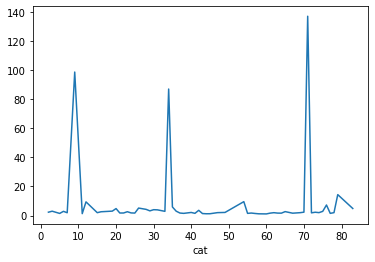

In [12]:
cross_val_score(rf,X_train,)

In [28]:
X_train.drop('target',axis=1,inplace=True)

In [30]:
y=X_train.target

AttributeError: 'DataFrame' object has no attribute 'target'

In [55]:
rf=RandomForestRegressor(n_jobs=-1,max_depth=10)

In [81]:
cat=CatBoostRegressor()

In [57]:
light=LGBMRegressor()

In [58]:
X_train

,date_block_num,shop_id,item_id,item_price,ny,cat,main,city,target
0,0,2,33,0.011596,0.0,37,7,0,1.0
1,0,2,482,0.076751,0.0,73,11,0,1.0
2,0,2,491,0.013945,0.0,73,11,0,1.0
3,0,2,839,0.076751,0.0,73,11,0,1.0
4,0,2,1007,0.010433,0.0,67,10,0,3.0
...,...,...,...,...,...,...,...,...,...
600154,33,59,22087,0.002756,0.0,83,13,27,6.0
600155,33,59,22088,0.002756,0.0,83,13,27,2.0
600156,33,59,22091,0.004152,0.0,83,13,27,1.0
600157,33,59,22100,0.014620,0.0,42,8,27,1.0


In [79]:
cross_val_score(cat,X_train.drop(['target'],axis=1),y,n_jobs=-1,scoring='neg_root_mean_squared_error',cv=5)

533:	learn: 5.2893675	total: 32.9s	remaining: 28.7s
534:	learn: 5.2868874	total: 33s	remaining: 28.7s
535:	learn: 5.2841414	total: 33.1s	remaining: 28.6s
536:	learn: 5.2832405	total: 33.2s	remaining: 28.6s
537:	learn: 5.2817694	total: 33.2s	remaining: 28.5s
538:	learn: 5.2805885	total: 33.3s	remaining: 28.5s
539:	learn: 5.2796916	total: 33.3s	remaining: 28.4s
540:	learn: 5.2793245	total: 33.4s	remaining: 28.3s
541:	learn: 5.2789324	total: 33.5s	remaining: 28.3s
542:	learn: 5.2773872	total: 33.5s	remaining: 28.2s
543:	learn: 5.2769917	total: 33.6s	remaining: 28.1s
544:	learn: 5.2747072	total: 33.6s	remaining: 28.1s
545:	learn: 5.2742586	total: 33.7s	remaining: 28s
546:	learn: 5.2737682	total: 33.8s	remaining: 28s
547:	learn: 5.2733374	total: 33.8s	remaining: 27.9s
548:	learn: 5.2709498	total: 33.9s	remaining: 27.9s
549:	learn: 5.2702794	total: 34s	remaining: 27.8s
550:	learn: 5.2695515	total: 34.1s	remaining: 27.8s
551:	learn: 5.2668453	total: 34.2s	remaining: 27.7s
552:	learn: 5.266085

534:	learn: 5.2845749	total: 33.2s	remaining: 28.9s
535:	learn: 5.2841666	total: 33.3s	remaining: 28.8s
536:	learn: 5.2834613	total: 33.4s	remaining: 28.8s
537:	learn: 5.2832745	total: 33.4s	remaining: 28.7s
538:	learn: 5.2813145	total: 33.5s	remaining: 28.6s
539:	learn: 5.2803735	total: 33.6s	remaining: 28.6s
540:	learn: 5.2795962	total: 33.6s	remaining: 28.5s
541:	learn: 5.2759771	total: 33.7s	remaining: 28.5s
542:	learn: 5.2755858	total: 33.8s	remaining: 28.4s
543:	learn: 5.2742021	total: 33.8s	remaining: 28.4s
544:	learn: 5.2728863	total: 33.9s	remaining: 28.3s
545:	learn: 5.2724182	total: 33.9s	remaining: 28.2s
546:	learn: 5.2708892	total: 34s	remaining: 28.2s
547:	learn: 5.2670199	total: 34.1s	remaining: 28.1s
548:	learn: 5.2660440	total: 34.1s	remaining: 28s
549:	learn: 5.2645205	total: 34.2s	remaining: 28s
550:	learn: 5.2638578	total: 34.2s	remaining: 27.9s
551:	learn: 5.2636000	total: 34.3s	remaining: 27.8s
552:	learn: 5.2570594	total: 34.3s	remaining: 27.8s
553:	learn: 5.2557

584:	learn: 5.0560209	total: 37.3s	remaining: 26.5s
585:	learn: 5.0555400	total: 37.4s	remaining: 26.4s
586:	learn: 5.0529989	total: 37.5s	remaining: 26.4s
587:	learn: 5.0523771	total: 37.5s	remaining: 26.3s
588:	learn: 5.0517684	total: 37.6s	remaining: 26.3s
589:	learn: 5.0506708	total: 37.7s	remaining: 26.2s
590:	learn: 5.0498906	total: 37.8s	remaining: 26.2s
591:	learn: 5.0492857	total: 37.9s	remaining: 26.1s
592:	learn: 5.0476222	total: 38s	remaining: 26.1s
593:	learn: 5.0452219	total: 38.1s	remaining: 26s
594:	learn: 5.0445853	total: 38.2s	remaining: 26s
595:	learn: 5.0442649	total: 38.3s	remaining: 25.9s
596:	learn: 5.0433508	total: 38.3s	remaining: 25.9s
597:	learn: 5.0427349	total: 38.4s	remaining: 25.8s
598:	learn: 5.0420549	total: 38.5s	remaining: 25.8s
599:	learn: 5.0413478	total: 38.6s	remaining: 25.8s
600:	learn: 5.0384405	total: 38.8s	remaining: 25.7s
601:	learn: 5.0381500	total: 38.8s	remaining: 25.7s
602:	learn: 5.0367839	total: 38.9s	remaining: 25.6s
603:	learn: 5.0362

800:	learn: 4.8489971	total: 52.3s	remaining: 13s
801:	learn: 4.8482312	total: 52.4s	remaining: 12.9s
802:	learn: 4.8479476	total: 52.4s	remaining: 12.9s
803:	learn: 4.8466814	total: 52.5s	remaining: 12.8s
804:	learn: 4.8442819	total: 52.6s	remaining: 12.7s
805:	learn: 4.8431644	total: 52.6s	remaining: 12.7s
806:	learn: 4.8419224	total: 52.7s	remaining: 12.6s
807:	learn: 4.8415896	total: 52.8s	remaining: 12.5s
808:	learn: 4.8407379	total: 52.8s	remaining: 12.5s
809:	learn: 4.8404793	total: 52.9s	remaining: 12.4s
810:	learn: 4.8401782	total: 53s	remaining: 12.3s
811:	learn: 4.8389451	total: 53s	remaining: 12.3s
812:	learn: 4.8384395	total: 53.1s	remaining: 12.2s
813:	learn: 4.8381213	total: 53.2s	remaining: 12.2s
814:	learn: 4.8378372	total: 53.2s	remaining: 12.1s
815:	learn: 4.8351799	total: 53.3s	remaining: 12s
816:	learn: 4.8338479	total: 53.4s	remaining: 12s
817:	learn: 4.8336570	total: 53.4s	remaining: 11.9s
818:	learn: 4.8333100	total: 53.5s	remaining: 11.8s
819:	learn: 4.8326586	

array([-9.63086565, -6.75662697, -6.85555685, -7.10081369, -7.36212096])

In [71]:
np.array([-9.41706373, -6.33475313, -6.70031708, -7.08573876, -7.46431154]).mean()

-7.400436848

In [86]:
cat.fit(X_train.drop(['target','main','city'],axis=1),y)

Learning rate set to 0.12188
0:	learn: 10.7328083	total: 32.4ms	remaining: 32.3s
1:	learn: 10.2490695	total: 59ms	remaining: 29.4s
2:	learn: 9.8631231	total: 81.2ms	remaining: 27s
3:	learn: 9.5260845	total: 101ms	remaining: 25.1s
4:	learn: 9.2682910	total: 119ms	remaining: 23.6s
5:	learn: 9.0549382	total: 137ms	remaining: 22.7s
6:	learn: 8.8543090	total: 155ms	remaining: 22s
7:	learn: 8.7290906	total: 172ms	remaining: 21.3s
8:	learn: 8.6158290	total: 192ms	remaining: 21.1s
9:	learn: 8.5381781	total: 212ms	remaining: 21s
10:	learn: 8.4737304	total: 234ms	remaining: 21s
11:	learn: 8.3531167	total: 254ms	remaining: 20.9s
12:	learn: 8.2702041	total: 273ms	remaining: 20.7s
13:	learn: 8.1883343	total: 291ms	remaining: 20.5s
14:	learn: 8.1450940	total: 307ms	remaining: 20.2s
15:	learn: 8.1066077	total: 324ms	remaining: 19.9s
16:	learn: 8.0317634	total: 344ms	remaining: 19.9s
17:	learn: 7.9613040	total: 362ms	remaining: 19.7s
18:	learn: 7.9134034	total: 379ms	remaining: 19.6s
19:	learn: 7.8736

170:	learn: 6.0337035	total: 3.57s	remaining: 17.3s
171:	learn: 6.0291581	total: 3.6s	remaining: 17.3s
172:	learn: 6.0247698	total: 3.62s	remaining: 17.3s
173:	learn: 6.0211974	total: 3.64s	remaining: 17.3s
174:	learn: 6.0159492	total: 3.66s	remaining: 17.3s
175:	learn: 6.0127666	total: 3.68s	remaining: 17.2s
176:	learn: 6.0103409	total: 3.7s	remaining: 17.2s
177:	learn: 6.0037299	total: 3.73s	remaining: 17.2s
178:	learn: 5.9989870	total: 3.75s	remaining: 17.2s
179:	learn: 5.9974121	total: 3.77s	remaining: 17.2s
180:	learn: 5.9934858	total: 3.79s	remaining: 17.2s
181:	learn: 5.9925025	total: 3.81s	remaining: 17.1s
182:	learn: 5.9908401	total: 3.84s	remaining: 17.1s
183:	learn: 5.9874010	total: 3.86s	remaining: 17.1s
184:	learn: 5.9835949	total: 3.88s	remaining: 17.1s
185:	learn: 5.9693313	total: 3.91s	remaining: 17.1s
186:	learn: 5.9663054	total: 3.93s	remaining: 17.1s
187:	learn: 5.9609143	total: 3.95s	remaining: 17.1s
188:	learn: 5.9570629	total: 3.97s	remaining: 17s
189:	learn: 5.94

329:	learn: 5.4359397	total: 6.95s	remaining: 14.1s
330:	learn: 5.4320609	total: 6.98s	remaining: 14.1s
331:	learn: 5.4314003	total: 7s	remaining: 14.1s
332:	learn: 5.4281445	total: 7.02s	remaining: 14.1s
333:	learn: 5.4271504	total: 7.04s	remaining: 14s
334:	learn: 5.4186848	total: 7.06s	remaining: 14s
335:	learn: 5.4167941	total: 7.08s	remaining: 14s
336:	learn: 5.4161183	total: 7.1s	remaining: 14s
337:	learn: 5.4154566	total: 7.12s	remaining: 13.9s
338:	learn: 5.4139070	total: 7.14s	remaining: 13.9s
339:	learn: 5.4116009	total: 7.16s	remaining: 13.9s
340:	learn: 5.4108670	total: 7.18s	remaining: 13.9s
341:	learn: 5.4100898	total: 7.21s	remaining: 13.9s
342:	learn: 5.4089543	total: 7.24s	remaining: 13.9s
343:	learn: 5.4072363	total: 7.26s	remaining: 13.8s
344:	learn: 5.4041927	total: 7.28s	remaining: 13.8s
345:	learn: 5.4022104	total: 7.3s	remaining: 13.8s
346:	learn: 5.4010645	total: 7.32s	remaining: 13.8s
347:	learn: 5.4000259	total: 7.34s	remaining: 13.8s
348:	learn: 5.3945091	tot

496:	learn: 5.1350672	total: 10.6s	remaining: 10.7s
497:	learn: 5.1345683	total: 10.6s	remaining: 10.7s
498:	learn: 5.1331165	total: 10.6s	remaining: 10.7s
499:	learn: 5.1324598	total: 10.7s	remaining: 10.7s
500:	learn: 5.1302474	total: 10.7s	remaining: 10.6s
501:	learn: 5.1296998	total: 10.7s	remaining: 10.6s
502:	learn: 5.1291310	total: 10.7s	remaining: 10.6s
503:	learn: 5.1284968	total: 10.7s	remaining: 10.6s
504:	learn: 5.1262358	total: 10.8s	remaining: 10.6s
505:	learn: 5.1255393	total: 10.8s	remaining: 10.5s
506:	learn: 5.1228564	total: 10.8s	remaining: 10.5s
507:	learn: 5.1189728	total: 10.8s	remaining: 10.5s
508:	learn: 5.1157264	total: 10.8s	remaining: 10.5s
509:	learn: 5.1127741	total: 10.9s	remaining: 10.4s
510:	learn: 5.1117133	total: 10.9s	remaining: 10.4s
511:	learn: 5.1107841	total: 10.9s	remaining: 10.4s
512:	learn: 5.1086833	total: 10.9s	remaining: 10.4s
513:	learn: 5.1080705	total: 10.9s	remaining: 10.3s
514:	learn: 5.1058594	total: 11s	remaining: 10.3s
515:	learn: 5.

661:	learn: 4.9352584	total: 14s	remaining: 7.14s
662:	learn: 4.9334350	total: 14s	remaining: 7.12s
663:	learn: 4.9324824	total: 14s	remaining: 7.1s
664:	learn: 4.9317374	total: 14.1s	remaining: 7.08s
665:	learn: 4.9312214	total: 14.1s	remaining: 7.06s
666:	learn: 4.9306416	total: 14.1s	remaining: 7.04s
667:	learn: 4.9278551	total: 14.1s	remaining: 7.01s
668:	learn: 4.9276071	total: 14.1s	remaining: 6.99s
669:	learn: 4.9259818	total: 14.1s	remaining: 6.97s
670:	learn: 4.9249054	total: 14.2s	remaining: 6.95s
671:	learn: 4.9246380	total: 14.2s	remaining: 6.92s
672:	learn: 4.9233911	total: 14.2s	remaining: 6.91s
673:	learn: 4.9231828	total: 14.2s	remaining: 6.89s
674:	learn: 4.9215767	total: 14.3s	remaining: 6.87s
675:	learn: 4.9211990	total: 14.3s	remaining: 6.84s
676:	learn: 4.9194390	total: 14.3s	remaining: 6.82s
677:	learn: 4.9189106	total: 14.3s	remaining: 6.8s
678:	learn: 4.9172750	total: 14.3s	remaining: 6.78s
679:	learn: 4.9166691	total: 14.4s	remaining: 6.76s
680:	learn: 4.911353

824:	learn: 4.7935216	total: 17.6s	remaining: 3.74s
825:	learn: 4.7931507	total: 17.7s	remaining: 3.72s
826:	learn: 4.7929115	total: 17.7s	remaining: 3.7s
827:	learn: 4.7926099	total: 17.7s	remaining: 3.68s
828:	learn: 4.7922840	total: 17.7s	remaining: 3.65s
829:	learn: 4.7920237	total: 17.7s	remaining: 3.63s
830:	learn: 4.7915171	total: 17.8s	remaining: 3.61s
831:	learn: 4.7914212	total: 17.8s	remaining: 3.59s
832:	learn: 4.7911634	total: 17.8s	remaining: 3.57s
833:	learn: 4.7908430	total: 17.8s	remaining: 3.55s
834:	learn: 4.7905016	total: 17.8s	remaining: 3.52s
835:	learn: 4.7900770	total: 17.9s	remaining: 3.5s
836:	learn: 4.7894113	total: 17.9s	remaining: 3.48s
837:	learn: 4.7891337	total: 17.9s	remaining: 3.46s
838:	learn: 4.7852403	total: 17.9s	remaining: 3.44s
839:	learn: 4.7845135	total: 18s	remaining: 3.42s
840:	learn: 4.7841430	total: 18s	remaining: 3.4s
841:	learn: 4.7832294	total: 18s	remaining: 3.38s
842:	learn: 4.7828072	total: 18s	remaining: 3.36s
843:	learn: 4.7819823	t

989:	learn: 4.6607871	total: 21.3s	remaining: 215ms
990:	learn: 4.6604594	total: 21.3s	remaining: 193ms
991:	learn: 4.6579866	total: 21.3s	remaining: 172ms
992:	learn: 4.6576811	total: 21.4s	remaining: 151ms
993:	learn: 4.6573124	total: 21.4s	remaining: 129ms
994:	learn: 4.6571825	total: 21.4s	remaining: 108ms
995:	learn: 4.6565894	total: 21.4s	remaining: 86ms
996:	learn: 4.6562066	total: 21.4s	remaining: 64.5ms
997:	learn: 4.6555040	total: 21.5s	remaining: 43ms
998:	learn: 4.6550282	total: 21.5s	remaining: 21.5ms
999:	learn: 4.6549121	total: 21.5s	remaining: 0us


In [88]:
pred=cat.predict(X_test.drop(['main','city'],axis=1))

In [89]:
pred[pred>20]=20

In [90]:
pd.DataFrame({'ID':X_test.index,'item_cnt_month':pred}).to_csv('answ.csv',index=False)

850:	learn: 4.9675255	total: 55.8s	remaining: 9.77s
851:	learn: 4.9670844	total: 55.9s	remaining: 9.71s
852:	learn: 4.9660818	total: 56s	remaining: 9.64s
853:	learn: 4.9650103	total: 56s	remaining: 9.58s
854:	learn: 4.9646895	total: 56.1s	remaining: 9.51s
855:	learn: 4.9643695	total: 56.2s	remaining: 9.45s
856:	learn: 4.9638366	total: 56.2s	remaining: 9.38s
857:	learn: 4.9631540	total: 56.3s	remaining: 9.32s
858:	learn: 4.9630101	total: 56.3s	remaining: 9.25s
859:	learn: 4.9623735	total: 56.4s	remaining: 9.18s
860:	learn: 4.9618988	total: 56.5s	remaining: 9.12s
861:	learn: 4.9608127	total: 56.5s	remaining: 9.05s
862:	learn: 4.9603168	total: 56.6s	remaining: 8.99s
863:	learn: 4.9600073	total: 56.7s	remaining: 8.92s
864:	learn: 4.9592424	total: 56.8s	remaining: 8.86s
865:	learn: 4.9587598	total: 56.8s	remaining: 8.79s
866:	learn: 4.9577376	total: 56.9s	remaining: 8.72s
867:	learn: 4.9574490	total: 56.9s	remaining: 8.66s
868:	learn: 4.9564222	total: 57s	remaining: 8.59s
869:	learn: 4.9523

977:	learn: 4.6622369	total: 1m 4s	remaining: 1.45s
978:	learn: 4.6606783	total: 1m 4s	remaining: 1.39s
979:	learn: 4.6603964	total: 1m 4s	remaining: 1.32s
980:	learn: 4.6600562	total: 1m 4s	remaining: 1.25s
981:	learn: 4.6591808	total: 1m 4s	remaining: 1.19s
982:	learn: 4.6585733	total: 1m 4s	remaining: 1.12s
983:	learn: 4.6555333	total: 1m 4s	remaining: 1.06s
984:	learn: 4.6524133	total: 1m 5s	remaining: 991ms
985:	learn: 4.6521341	total: 1m 5s	remaining: 924ms
986:	learn: 4.6518062	total: 1m 5s	remaining: 858ms
987:	learn: 4.6512451	total: 1m 5s	remaining: 792ms
988:	learn: 4.6506323	total: 1m 5s	remaining: 726ms
989:	learn: 4.6502523	total: 1m 5s	remaining: 660ms
990:	learn: 4.6498298	total: 1m 5s	remaining: 593ms
991:	learn: 4.6496513	total: 1m 5s	remaining: 527ms
992:	learn: 4.6493824	total: 1m 5s	remaining: 461ms
993:	learn: 4.6490654	total: 1m 5s	remaining: 395ms
994:	learn: 4.6483365	total: 1m 5s	remaining: 329ms
995:	learn: 4.6449506	total: 1m 5s	remaining: 263ms
996:	learn: 

119:	learn: 5.4110606	total: 8.34s	remaining: 12.5s
120:	learn: 5.4094844	total: 8.39s	remaining: 12.4s
121:	learn: 5.4047459	total: 8.46s	remaining: 12.3s
122:	learn: 5.3922933	total: 8.52s	remaining: 12.3s
123:	learn: 5.3872558	total: 8.59s	remaining: 12.2s
124:	learn: 5.3791856	total: 8.64s	remaining: 12.1s
125:	learn: 5.3739297	total: 8.7s	remaining: 12s
126:	learn: 5.3709236	total: 8.78s	remaining: 12s
127:	learn: 5.3672942	total: 8.85s	remaining: 11.9s
128:	learn: 5.3643502	total: 8.93s	remaining: 11.8s
129:	learn: 5.3619656	total: 8.99s	remaining: 11.8s
130:	learn: 5.2985049	total: 9.07s	remaining: 11.7s
131:	learn: 5.2857393	total: 9.14s	remaining: 11.6s
132:	learn: 5.2746611	total: 9.2s	remaining: 11.6s
133:	learn: 5.2730259	total: 9.26s	remaining: 11.5s
134:	learn: 5.2702036	total: 9.32s	remaining: 11.4s
135:	learn: 5.2679264	total: 9.41s	remaining: 11.3s
136:	learn: 5.2586703	total: 9.48s	remaining: 11.3s
137:	learn: 5.2540380	total: 9.56s	remaining: 11.2s
138:	learn: 5.2504

In [31]:
X_train

NameError: name 'X_train' is not defined

In [5]:
X=pd.read_csv('x_b.csv',index_col=0)

<AxesSubplot:xlabel='date_block_num'>

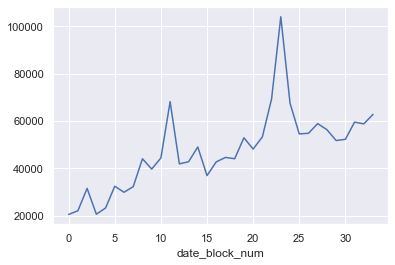

In [10]:
import seaborn as sns
sns.set()
X.groupby('date_block_num').target.sum().plot()

In [14]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [16]:
def f(line):
    return line.split(' - ')[0]

In [19]:
item_categories.item_category_name.map(f)

0                            PC
1                    Аксессуары
2                    Аксессуары
3                    Аксессуары
4                    Аксессуары
                ...            
79                    Служебные
80                    Служебные
81      Чистые носители (шпиль)
82    Чистые носители (штучные)
83             Элементы питания
Name: item_category_name, Length: 84, dtype: object

In [18]:
item_categories

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [20]:
shops

,shop_id
shop_name,
"!Якутск Орджоникидзе, 56 фран",0
"!Якутск ТЦ ""Центральный"" фран",1
"Адыгея ТЦ ""Мега""",2
"Балашиха ТРК ""Октябрь-Киномир""",3
"Волжский ТЦ ""Волга Молл""",4
"Вологда ТРЦ ""Мармелад""",5
"Воронеж (Плехановская, 13)",6
"Воронеж ТРЦ ""Максимир""",7
"Воронеж ТРЦ Сити-Парк ""Град""",8


In [32]:
X_train=pd.read_csv('x_b.csv',index_col=0)

In [29]:
X_test

,ID,date_block_num,shop_id,item_id,item_price,ny,cat,city,main
0,0,34,5,5037,0.036971,0,19,3,4
1,1,34,5,5320,0.007769,0,55,3,11
2,2,34,5,5233,0.031864,0,19,3,4
3,3,34,5,5232,0.025269,0,23,3,4
4,4,34,5,5268,0.055660,0,20,3,4
...,...,...,...,...,...,...,...,...,...
214195,214195,34,45,18454,0.005012,0,55,18,11
214196,214196,34,45,16188,0.031200,0,64,18,12
214197,214197,34,45,15757,0.007245,0,55,18,11
214198,214198,34,45,19648,0.005708,0,40,18,9


In [30]:
X_train

NameError: name 'X_train' is not defined